In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

In [4]:
#Create 3 dataframes for the 3 datasets
#Read the data from the csv files
market_df = pd.read_excel('Case2_Market data_touched.xlsx')
market_df_original = market_df.copy()

In [5]:
sales_df = pd.read_csv('Case2_Sales data.csv', sep=";")
sales_df_original = sales_df.copy()

In [6]:
test_df = pd.read_excel('Case2_Test Set Template.xlsx')
test_df_original = test_df.copy()

In [7]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Date - Index 2010=100 (if not otherwise noted)                     220 non-null    object
 1   Production Index Machinery & Electricals - China                   220 non-null    object
 2   Shipments Index Machinery & Electricals - China                    220 non-null    object
 3   Production Index Machinery & Electricals - France                  220 non-null    object
 4   Shipments Index Machinery & Electricals - France                   220 non-null    object
 5   Production Index Machinery & Electricals - Germany                 220 non-null    object
 6   Shipments Index Machinery & Electricals - Germany                  220 non-null    object
 7   Production Index Machinery & Electr

In [8]:
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
0                                     Extra Info   
1                                         2004m2   
2                                         2004m3   
3                                         2004m4   
4                                         2004m5   

  Production Index Machinery & Electricals - China  \
0                                   MAB_ELE_PRO156   
1                                        16.940704   
2                                        23.711852   
3                                        24.435235   
4                                        23.708115   

  Shipments Index Machinery & Electricals - China  \
0                                  MAB_ELE_SHP156   
1                                       16.940704   
2                                       23.711852   
3                                       24.435235   
4                                       23.708115   

  Production Index Machinery & Electricals - France  \
0                                    MAB_ELE_PRO250   
1                                        112.091273   
2                                        136.327976   
3                                        117.791806   
4                                        109.002541   

  Shipments Index Machinery & Electricals - France  \
0                                   MAB_ELE_SHP250   
1                                        83.458866   
2                                       106.168192   
3                                        92.007646   
4                                        85.696486   

  Production Index Machinery & Electricals - Germany  \
0                                     MAB_ELE_PRO276   
1                                          82.623037   
2                                         100.556582   
3                                          89.653203   
4                                          86.880571   

  Shipments Index Machinery & Electricals - Germany  \
0                                    MAB_ELE_SHP276   
1                                         79.452532   
2                                         97.012918   
3                                         84.932358   
4                                         82.372794   

  Production Index Machinery & Electricals - Italy  \
0                                   MAB_ELE_PRO380   
1                                       124.289603   
2                                       143.411662   
3                                       129.083828   
4                                       135.590391   

  Shipments Index Machinery & Electricals - Italy  \
0                                  MAB_ELE_SHP380   
1                                       86.560493   
2                                      106.344544   
3                                       95.579673   
4                                      100.087039   

  Production Index Machinery & Electricals - Japan  ...  \
0                                   MAB_ELE_PRO392  ...   
1                                        109.33401  ...   
2                                       140.884616  ...   
3                                       105.853579  ...   
4                                       101.864777  ...   

  Production Index, Machinery and equipment n.e.c. - France  \
0                                       PRO28250_org          
1                                         118.274109          
2                                         148.121841          
3                                         125.482231          
4                                          116.64975          

  Production Index, Machinery and equipment n.e.c. - Germany  \
0                                       PRO28276_org           
1                                           80.82901           
2                                         102.130104           
3                                          90.961426           
4                      

In [9]:
#create a new dataframe with the 1st row of the market_df
market_df_extra = market_df.iloc[0]
market_df_extra

Date - Index 2010=100 (if not otherwise noted)                                   Extra Info
Production Index Machinery & Electricals - China                             MAB_ELE_PRO156
Shipments Index Machinery & Electricals - China                              MAB_ELE_SHP156
Production Index Machinery & Electricals - France                            MAB_ELE_PRO250
Shipments Index Machinery & Electricals - France                             MAB_ELE_SHP250
Production Index Machinery & Electricals - Germany                           MAB_ELE_PRO276
Shipments Index Machinery & Electricals - Germany                            MAB_ELE_SHP276
Production Index Machinery & Electricals - Italy                             MAB_ELE_PRO380
Shipments Index Machinery & Electricals - Italy                              MAB_ELE_SHP380
Production Index Machinery & Electricals - Japan                             MAB_ELE_PRO392
Shipments Index Machinery & Electricals - Japan                              MAB

In [10]:
#drop the 1st row of the market_df
market_df = market_df.drop([0])
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
1                                         2004m2   
2                                         2004m3   
3                                         2004m4   
4                                         2004m5   
5                                         2004m6   

  Production Index Machinery & Electricals - China  \
1                                        16.940704   
2                                        23.711852   
3                                        24.435235   
4                                        23.708115   
5                                        27.009138   

  Shipments Index Machinery & Electricals - China  \
1                                       16.940704   
2                                       23.711852   
3                                       24.435235   
4                                       23.708115   
5                                       27.009138   

  Production Index Machinery & Electricals - France  \
1                                        112.091273   
2                                        136.327976   
3                                        117.791806   
4                                        109.002541   
5                                        133.785737   

  Shipments Index Machinery & Electricals - France  \
1                                        83.458866   
2                                       106.168192   
3                                        92.007646   
4                                        85.696486   
5                                       106.641482   

  Production Index Machinery & Electricals - Germany  \
1                                          82.623037   
2                                         100.556582   
3                                          89.653203   
4                                          86.880571   
5                                          99.010814   

  Shipments Index Machinery & Electricals - Germany  \
1                                         79.452532   
2                                         97.012918   
3                                         84.932358   
4                                         82.372794   
5                                          95.10874   

  Production Index Machinery & Electricals - Italy  \
1                                       124.289603   
2                                       143.411662   
3                                       129.083828   
4                                       135.590391   
5                                       136.424935   

  Shipments Index Machinery & Electricals - Italy  \
1                                       86.560493   
2                                      106.344544   
3                                       95.579673   
4                                      100.087039   
5                                      110.889719   

  Production Index Machinery & Electricals - Japan  ...  \
1                                        109.33401  ...   
2                                       140.884616  ...   
3                                       105.853579  ...   
4                                       101.864777  ...   
5                                        120.33292  ...   

  Production Index, Machinery and equipment n.e.c. - France  \
1                                         118.274109          
2                                         148.121841          
3                                         125.482231          
4                                          116.64975          
5                                         143.248734          

  Production Index, Machinery and equipment n.e.c. - Germany  \
1                                           80.82901           
2                                         102.130104           
3                                          90.961426           
4                                          88.082901           
5                      

In [11]:
sales_df.head()

DATE Mapped_GCK Sales_EUR
0  01.10.2018         #1         0
1  02.10.2018         #1         0
2  03.10.2018         #1         0
3  04.10.2018         #1         0
4  05.10.2018         #1         0

In [12]:
test_df.head()

Month Year Mapped_GCK  Sales_EUR
0 2022-05-01         #3        NaN
1 2022-06-01         #3        NaN
2 2022-07-01         #3        NaN
3 2022-08-01         #3        NaN
4 2022-09-01         #3        NaN

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month Year  140 non-null    datetime64[ns]
 1   Mapped_GCK  140 non-null    object        
 2   Sales_EUR   0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.4+ KB


In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [15]:
#Incoherences
#convert Sales_EUR to numeric
sales_df['Sales_EUR'] = pd.to_numeric(sales_df['Sales_EUR'].str.replace(',','.'))

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        9802 non-null   object 
 1   Mapped_GCK  9802 non-null   object 
 2   Sales_EUR   9802 non-null   float64
dtypes: float64(1), object(2)
memory usage: 229.9+ KB


In [17]:
#Incoherences
#Replace all the '.' in DATE with'/' in the sales_df
sales_df['DATE'] = sales_df['DATE'].str.replace('.', '/')

In [18]:
sales_df.head()

DATE Mapped_GCK  Sales_EUR
0  01/10/2018         #1        0.0
1  02/10/2018         #1        0.0
2  03/10/2018         #1        0.0
3  04/10/2018         #1        0.0
4  05/10/2018         #1        0.0

In [19]:
#Change the place of the day and month on the DATE column
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'], format='%d/%m/%Y')

In [20]:
#in sales_df, group by the month and year and sum the sales
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'])
sales_df['Month'] = sales_df['DATE'].dt.month
sales_df['Year'] = sales_df['DATE'].dt.year

In [21]:
sales_df.head()

DATE Mapped_GCK  Sales_EUR  Month  Year
0 2018-10-01         #1        0.0     10  2018
1 2018-10-02         #1        0.0     10  2018
2 2018-10-03         #1        0.0     10  2018
3 2018-10-04         #1        0.0     10  2018
4 2018-10-05         #1        0.0     10  2018

In [22]:
#Create NewDate that is only the month and year
sales_df['NewDate'] = sales_df['DATE'].dt.to_period('M')

In [23]:
sales_df.head()

DATE Mapped_GCK  Sales_EUR  Month  Year  NewDate
0 2018-10-01         #1        0.0     10  2018  2018-10
1 2018-10-02         #1        0.0     10  2018  2018-10
2 2018-10-03         #1        0.0     10  2018  2018-10
3 2018-10-04         #1        0.0     10  2018  2018-10
4 2018-10-05         #1        0.0     10  2018  2018-10

In [24]:
sales_df['Sales_EUR'].min(),sales_df['Sales_EUR'].max()

(-506381.17, 41127988.02)

<Axes: xlabel='NewDate'>

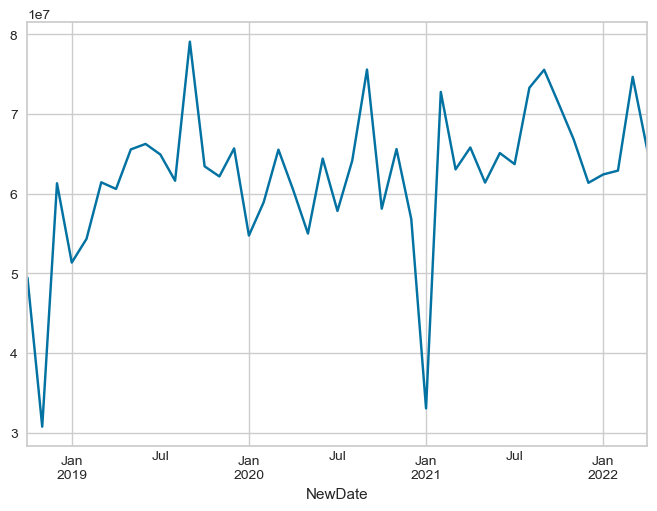

In [25]:
#What is the total Sales_EUR by newDate
sales_df.groupby('NewDate')['Sales_EUR'].sum().plot()

### Jan 2021 kinda like an outlier, that could wrongly influence our predictions

### Feature Eng

In [26]:
sales_by_month = sales_df.groupby('NewDate')['Sales_EUR'].sum()
sales_by_month


NewDate
2018-10    49471370.83
2018-11    30760578.47
2018-12    61312068.79
2019-01    51360149.23
2019-02    54336933.67
2019-03    61435886.28
2019-04    60598035.44
2019-05    65563813.36
2019-06    66251932.08
2019-07    64925427.91
2019-08    61630019.14
2019-09    79087221.00
2019-10    63440758.36
2019-11    62168871.18
2019-12    65689212.91
2020-01    54752820.51
2020-02    58926297.86
2020-03    65532628.65
2020-04    60473324.95
2020-05    55001727.63
2020-06    64410726.64
2020-07    57838604.40
2020-08    64152808.89
2020-09    75588391.22
2020-10    58121991.70
2020-11    65603872.57
2020-12    56815684.33
2021-01    33057643.26
2021-02    72781252.24
2021-03    63055558.50
2021-04    65803190.42
2021-05    61399858.98
2021-06    65103351.13
2021-07    63716228.84
2021-08    73303028.73
2021-09    75559949.83
2021-10    71231256.10
2021-11    66824106.32
2021-12    61373034.62
2022-01    62420188.07
2022-02    62901069.54
2022-03    74671315.08
2022-04    65393111.01
Fre

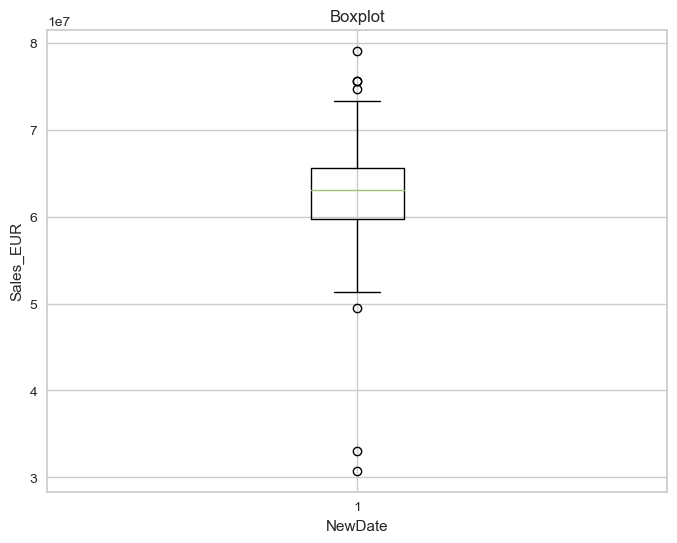

In [27]:
#Do a boxplot of the sales_by_month

plt.figure(figsize=(8, 6))
plt.boxplot(sales_by_month)
plt.title('Boxplot')
plt.xlabel('NewDate')
plt.ylabel('Sales_EUR')
plt.grid(True)
plt.show()

<Axes: xlabel='NewDate'>

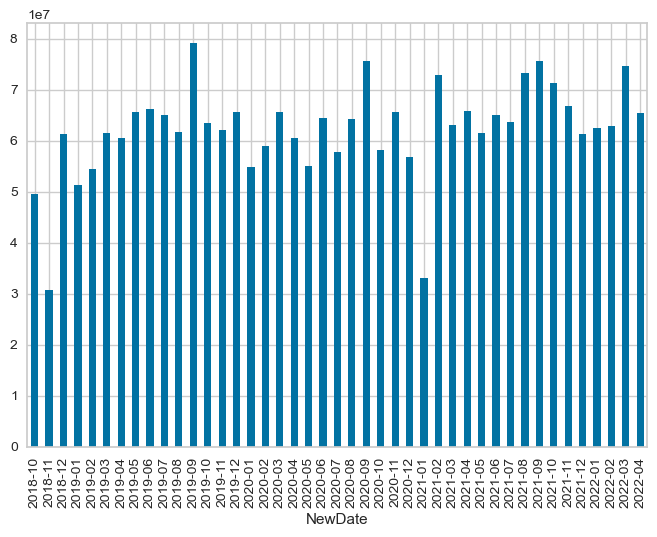

In [28]:
sales_by_month.plot(kind='bar')

In [29]:
sales_df.groupby('Year')['Sales_EUR'].sum()

Year
2018    1.415440e+08
2019    7.564883e+08
2020    7.372189e+08
2021    7.732085e+08
2022    2.653857e+08
Name: Sales_EUR, dtype: float64

<Axes: xlabel='Year'>

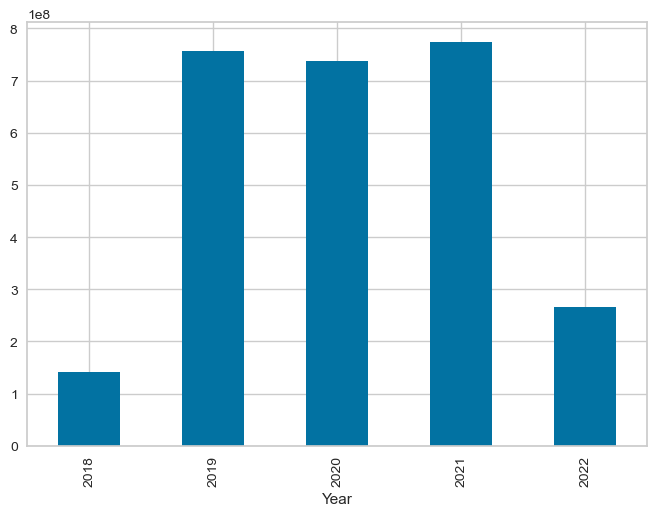

In [30]:
#put it in full numbers
sales_df.groupby('Year')['Sales_EUR'].sum().plot(kind='bar')


In [31]:
#Show only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]

Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
dtype: int64

In [32]:
sales_df.isnull().sum()[sales_df.isnull().sum() > 0]

Series([], dtype: int64)

In [33]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Sales_EUR    140
dtype: int64

In [34]:
market_df_extra.isnull().sum()[market_df_extra.isnull().sum() > 0]

array([], dtype=int64)

# What do these nans mean? Mean 0, unknown, or simply didnt happen

In [35]:
#Replace all the nans in market_df with 0
#market_df.fillna(0, inplace=True)

### Feature Eng

In [36]:
# sales by product group (Mapped_GCK)
sales_by_prodgroup = sales_df.groupby('Mapped_GCK')['Sales_EUR'].sum()
pd.options.display.float_format = '{:.2f}'.format
sales_by_prodgroup 

Mapped_GCK
#1    1544205996.76
#11     65901314.65
#12      8279486.32
#13      1009156.91
#14       493822.06
#16     18391175.71
#20        78326.86
#3     533443487.70
#36       998613.91
#4      15627204.96
#5     429595158.01
#6      20641890.49
#8      34871219.82
#9        308446.51
Name: Sales_EUR, dtype: float64

In [37]:
#How many products are in each product group
sales_df['Mapped_GCK'].value_counts()

#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: Mapped_GCK, dtype: int64

<Axes: xlabel='Mapped_GCK'>

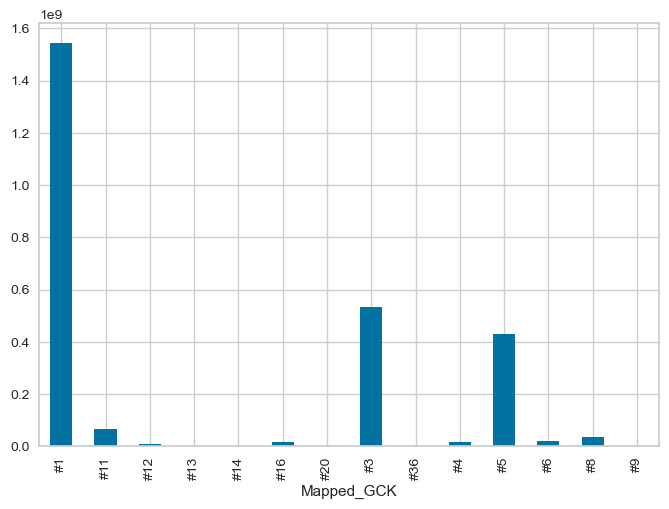

In [38]:
#plot the sales by product group
sales_by_prodgroup.plot(kind='bar')

In [39]:
# Incoherences

In [40]:
# Check which features are categorical
market_df.dtypes[market_df.dtypes == 'object']

Date - Index 2010=100 (if not otherwise noted)                       object
Production Index Machinery & Electricals - China                     object
Shipments Index Machinery & Electricals - China                      object
Production Index Machinery & Electricals - France                    object
Shipments Index Machinery & Electricals - France                     object
Production Index Machinery & Electricals - Germany                   object
Shipments Index Machinery & Electricals - Germany                    object
Production Index Machinery & Electricals - Italy                     object
Shipments Index Machinery & Electricals - Italy                      object
Production Index Machinery & Electricals - Japan                     object
Shipments Index Machinery & Electricals - Japan                      object
Production Index Machinery & Electricals - Switzerland               object
Shipments Index Machinery & Electricals - Switzerland                object
Production I

In [41]:
# Check which features are numerical
market_df.dtypes[market_df.dtypes != 'object']

Series([], dtype: object)

In [42]:
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
1                                         2004m2   
2                                         2004m3   
3                                         2004m4   
4                                         2004m5   
5                                         2004m6   

  Production Index Machinery & Electricals - China  \
1                                            16.94   
2                                            23.71   
3                                            24.44   
4                                            23.71   
5                                            27.01   

  Shipments Index Machinery & Electricals - China  \
1                                           16.94   
2                                           23.71   
3                                           24.44   
4                                           23.71   
5                                           27.01   

  Production Index Machinery & Electricals - France  \
1                                            112.09   
2                                            136.33   
3                                            117.79   
4                                            109.00   
5                                            133.79   

  Shipments Index Machinery & Electricals - France  \
1                                            83.46   
2                                           106.17   
3                                            92.01   
4                                            85.70   
5                                           106.64   

  Production Index Machinery & Electricals - Germany  \
1                                              82.62   
2                                             100.56   
3                                              89.65   
4                                              86.88   
5                                              99.01   

  Shipments Index Machinery & Electricals - Germany  \
1                                             79.45   
2                                             97.01   
3                                             84.93   
4                                             82.37   
5                                             95.11   

  Production Index Machinery & Electricals - Italy  \
1                                           124.29   
2                                           143.41   
3                                           129.08   
4                                           135.59   
5                                           136.42   

  Shipments Index Machinery & Electricals - Italy  \
1                                           86.56   
2                                          106.34   
3                                           95.58   
4                                          100.09   
5                                          110.89   

  Production Index Machinery & Electricals - Japan  ...  \
1                                           109.33  ...   
2                                           140.88  ...   
3                                           105.85  ...   
4                                           101.86  ...   
5                                           120.33  ...   

  Production Index, Machinery and equipment n.e.c. - France  \
1                                             118.27          
2                                             148.12          
3                                             125.48          
4                                             116.65          
5                                             143.25          

  Production Index, Machinery and equipment n.e.c. - Germany  \
1                                              80.83           
2                                             102.13           
3                                              90.96           
4                                              88.08           
5                      

In [43]:
#Incoherences
#On the Date column, change the 'm' to '-'
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('m', '-')
market_df.head(12)

Date - Index 2010=100 (if not otherwise noted)  \
1                                          2004-2   
2                                          2004-3   
3                                          2004-4   
4                                          2004-5   
5                                          2004-6   
6                                          2004-7   
7                                          2004-8   
8                                          2004-9   
9                                         2004-10   
10                                        2004-11   
11                                        2004-12   
12                                         2005-1   

   Production Index Machinery & Electricals - China  \
1                                             16.94   
2                                             23.71   
3                                             24.44   
4                                             23.71   
5                                             27.01   
6                                             23.59   
7                                             24.28   
8                                             25.99   
9                                             24.90   
10                                            26.77   
11                                            32.73   
12                                            21.93   

   Shipments Index Machinery & Electricals - China  \
1                                            16.94   
2                                            23.71   
3                                            24.44   
4                                            23.71   
5                                            27.01   
6                                            23.59   
7                                            24.28   
8                                            25.99   
9                                            24.90   
10                                           26.77   
11                                           32.73   
12                                           21.93   

   Production Index Machinery & Electricals - France  \
1                                             112.09   
2                                             136.33   
3                                             117.79   
4                                             109.00   
5                                             133.79   
6                                             117.41   
7                                              79.14   
8                                             130.49   
9                                             119.71   
10                                            114.51   
11                                            122.84   
12                                            109.81   

   Shipments Index Machinery & Electricals - France  \
1                                             83.46   
2                                            106.17   
3                                             92.01   
4                                             85.70   
5                                            106.64   
6                                             89.30   
7                                             71.80   
8                                             98.90   
9                                             99.60   
10                                            86.51   
11                                           104.11   
12                                            89.72   

   Production Index Machinery & Electricals - Germany  \
1                                               82.62   
2                                              100.56   
3                                               89.65   
4                                               86.88   
5                                               99.01   
6                                               94.20   
7                                               82

In [44]:
cell_content = market_df.at[1, 'Date - Index 2010=100 (if not otherwise noted)']
num_characters = len(cell_content)
print("Number of characters in the cell:", num_characters)

Number of characters in the cell: 7


In [45]:
cell_content = market_df.at[11, 'Date - Index 2010=100 (if not otherwise noted)']
num_characters = len(cell_content)
print("Number of characters in the cell:", num_characters)

Number of characters in the cell: 7


In [46]:
#Incoherences
#On the date column add a 0 to the months that have only 1 digit
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-1', '-01')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-2', '-02')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-3', '-03')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-4', '-04')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-5', '-05')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-6', '-06')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-7', '-07')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-8', '-08')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-9', '-09')
market_df['Date - Index 2010=100 (if not otherwise noted)']

1       2004-02
2       2004-03
3       2004-04
4       2004-05
5       2004-06
         ...   
215    2021-012
216     2022-01
217     2022-02
218     2022-03
219     2022-04
Name: Date - Index 2010=100 (if not otherwise noted), Length: 219, dtype: object

In [47]:
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-010', '-10')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-011', '-11')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-012', '-12')
market_df['Date - Index 2010=100 (if not otherwise noted)']

1       2004-02
2       2004-03
3       2004-04
4       2004-05
5       2004-06
         ...   
215     2021-12
216     2022-01
217     2022-02
218     2022-03
219     2022-04
Name: Date - Index 2010=100 (if not otherwise noted), Length: 219, dtype: object

In [48]:
#Convert the date column to datetime year and month
market_df['Date - Index 2010=100 (if not otherwise noted)'] = pd.to_datetime(market_df['Date - Index 2010=100 (if not otherwise noted)'], format='%Y-%m')

In [49]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   219 non-null    object        
 2   Shipments Index Machinery & Electricals - China                    219 non-null    object        
 3   Production Index Machinery & Electricals - France                  219 non-null    object        
 4   Shipments Index Machinery & Electricals - France                   219 non-null    object        
 5   Production Index Machinery & Electricals - Germany                 219 non-null    object        
 6   Shipments Index Machinery & Electricals - Germany                 

In [50]:
#Convert all the columns to numeric
market_df = market_df.apply(pd.to_numeric, errors='ignore')

In [51]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    int64  
 1   Production Index Machinery & Electricals - China                   219 non-null    float64
 2   Shipments Index Machinery & Electricals - China                    219 non-null    float64
 3   Production Index Machinery & Electricals - France                  219 non-null    float64
 4   Shipments Index Machinery & Electricals - France                   219 non-null    float64
 5   Production Index Machinery & Electricals - Germany                 219 non-null    float64
 6   Shipments Index Machinery & Electricals - Germany                  219 non-null    float64
 7   Production Index Machinery

In [52]:
#convert back the date column to datetime
market_df['Date - Index 2010=100 (if not otherwise noted)'] = pd.to_datetime(market_df['Date - Index 2010=100 (if not otherwise noted)'])
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   219 non-null    float64       
 2   Shipments Index Machinery & Electricals - China                    219 non-null    float64       
 3   Production Index Machinery & Electricals - France                  219 non-null    float64       
 4   Shipments Index Machinery & Electricals - France                   219 non-null    float64       
 5   Production Index Machinery & Electricals - Germany                 219 non-null    float64       
 6   Shipments Index Machinery & Electricals - Germany                 

In [53]:
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
1                                     2004-02-01   
2                                     2004-03-01   
3                                     2004-04-01   
4                                     2004-05-01   
5                                     2004-06-01   

   Production Index Machinery & Electricals - China  \
1                                             16.94   
2                                             23.71   
3                                             24.44   
4                                             23.71   
5                                             27.01   

   Shipments Index Machinery & Electricals - China  \
1                                            16.94   
2                                            23.71   
3                                            24.44   
4                                            23.71   
5                                            27.01   

   Production Index Machinery & Electricals - France  \
1                                             112.09   
2                                             136.33   
3                                             117.79   
4                                             109.00   
5                                             133.79   

   Shipments Index Machinery & Electricals - France  \
1                                             83.46   
2                                            106.17   
3                                             92.01   
4                                             85.70   
5                                            106.64   

   Production Index Machinery & Electricals - Germany  \
1                                              82.62    
2                                             100.56    
3                                              89.65    
4                                              86.88    
5                                              99.01    

   Shipments Index Machinery & Electricals - Germany  \
1                                              79.45   
2                                              97.01   
3                                              84.93   
4                                              82.37   
5                                              95.11   

   Production Index Machinery & Electricals - Italy  \
1                                            124.29   
2                                            143.41   
3                                            129.08   
4                                            135.59   
5                                            136.42   

   Shipments Index Machinery & Electricals - Italy  \
1                                            86.56   
2                                           106.34   
3                                            95.58   
4                                           100.09   
5                                           110.89   

   Production Index Machinery & Electricals - Japan  ...  \
1                                            109.33  ...   
2                                            140.88  ...   
3                                            105.85  ...   
4                                            101.86  ...   
5                                            120.33  ...   

   Production Index, Machinery and equipment n.e.c. - France  \
1                                             118.27           
2                                             148.12           
3                                             125.48           
4                                             116.65           
5                                             143.25           

   Production Index, Machinery and equipment n.e.c. - Germany  \
1                                              80.83            
2                                             102.13            
3                                              90.96            
4                      

In [54]:
testenan = market_df.drop('Date - Index 2010=100 (if not otherwise noted)', axis=1).sum(axis=1)
testenan

1     3795.26
2     4293.42
3     3864.20
4     3839.93
5     4158.95
        ...  
215   5596.58
216   5050.84
217   5313.63
218   6211.34
219   4910.09
Length: 219, dtype: float64

In [55]:
#market_df.fillna(0, inplace=True)

In [56]:
#Only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]

Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
dtype: int64

### Feature Eng

In [57]:
#Create a new feature that is the Balance by each country, the production - shipment - Production Index Machinery & Electricals
market_df['CHN_Balance'] = market_df['Production Index Machinery & Electricals - China'] - market_df['Shipments Index Machinery & Electricals - China']
market_df['FRA_Balance'] = market_df['Production Index Machinery & Electricals - France'] - market_df['Shipments Index Machinery & Electricals - France']
market_df['GER_Balance'] = market_df['Production Index Machinery & Electricals - Germany'] - market_df['Shipments Index Machinery & Electricals - Germany']
market_df['ITA_Balance'] = market_df['Production Index Machinery & Electricals - Italy'] - market_df['Shipments Index Machinery & Electricals - Italy']
market_df['JAP_Balance'] = market_df['Production Index Machinery & Electricals - Japan'] - market_df['Shipments Index Machinery & Electricals - Japan']
market_df['SWI_Balance'] = market_df['Production Index Machinery & Electricals - Switzerland'] - market_df['Shipments Index Machinery & Electricals - Switzerland']
market_df['UK_Balance'] = market_df['Production Index Machinery & Electricals - United Kingdom'] - market_df['Shipments Index Machinery & Electricals - United Kingdom']
market_df['US_Balance'] = market_df['Production Index Machinery & Electricals - United States'] - market_df['Shipments Index Machinery & Electricals - United States']
market_df['EUR_Balance'] = market_df['Production Index Machinery & Electricals - Europe'] - market_df['Shipments Index Machinery & Electricals - Europe']


In [58]:
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
1                                     2004-02-01   
2                                     2004-03-01   
3                                     2004-04-01   
4                                     2004-05-01   
5                                     2004-06-01   

   Production Index Machinery & Electricals - China  \
1                                             16.94   
2                                             23.71   
3                                             24.44   
4                                             23.71   
5                                             27.01   

   Shipments Index Machinery & Electricals - China  \
1                                            16.94   
2                                            23.71   
3                                            24.44   
4                                            23.71   
5                                            27.01   

   Production Index Machinery & Electricals - France  \
1                                             112.09   
2                                             136.33   
3                                             117.79   
4                                             109.00   
5                                             133.79   

   Shipments Index Machinery & Electricals - France  \
1                                             83.46   
2                                            106.17   
3                                             92.01   
4                                             85.70   
5                                            106.64   

   Production Index Machinery & Electricals - Germany  \
1                                              82.62    
2                                             100.56    
3                                              89.65    
4                                              86.88    
5                                              99.01    

   Shipments Index Machinery & Electricals - Germany  \
1                                              79.45   
2                                              97.01   
3                                              84.93   
4                                              82.37   
5                                              95.11   

   Production Index Machinery & Electricals - Italy  \
1                                            124.29   
2                                            143.41   
3                                            129.08   
4                                            135.59   
5                                            136.42   

   Shipments Index Machinery & Electricals - Italy  \
1                                            86.56   
2                                           106.34   
3                                            95.58   
4                                           100.09   
5                                           110.89   

   Production Index Machinery & Electricals - Japan  ...  \
1                                            109.33  ...   
2                                            140.88  ...   
3                                            105.85  ...   
4                                            101.86  ...   
5                                            120.33  ...   

   Production Index, Electrical equipment - Germany  CHN_Balance  FRA_Balance  \
1                                             85.91         0.00        28.63   
2                                             97.67         0.00        30.16   
3                                             87.25         0.00        25.78   
4                                             84.68         0.00        23.31   
5                                             95.40         0.00        27.14   

   GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  UK_Balance  US_Balance  \
1         3.17        37.73        -1.16         1.23       37.75       28.36   
2         3.54     

In [59]:
#Show only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]

Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
SWI_Balance                                                        1
UK_Balance                                                        18
US_Balance                                                         1
dtype: int64

In [60]:
# Sum of Productions-Shipments (Machinery & Electricals)
print("China Balance:", market_df['CHN_Balance'].sum())
print("France Balance:", market_df['FRA_Balance'].sum())
print("Germany Balance:", market_df['GER_Balance'].sum())
print("Italy Balance:", market_df['ITA_Balance'].sum())
print("Japan Balance:", market_df['JAP_Balance'].sum())
print("Switzerland Balance:", market_df['SWI_Balance'].sum())
print("UK Balance:", market_df['UK_Balance'].sum())
print("US Balance:", market_df['US_Balance'].sum())
print("Europe Balance:", market_df['EUR_Balance'].sum())

China Balance: 0.0
France Balance: -193.79227851683072
Germany Balance: -1620.43595837514
Italy Balance: -111.03629159255365
Japan Balance: -158.21789071500652
Switzerland Balance: 664.8128923607361
UK Balance: 2646.147403460982
US Balance: -1041.2493269501874
Europe Balance: -387.8799637178739


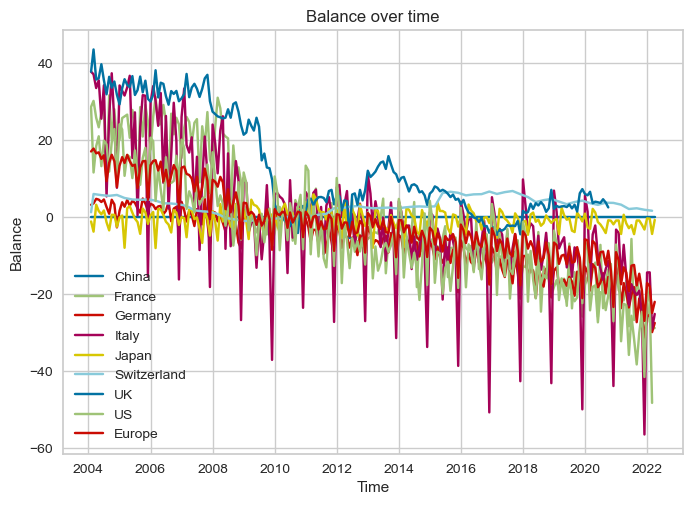

In [61]:
import matplotlib.pyplot as plt

# Assuming market_df is a DataFrame and 'China_Balance', 'France_Balance' are columns
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['CHN_Balance'], label='China')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['FRA_Balance'], label='France')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['GER_Balance'], label='Germany')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['ITA_Balance'], label='Italy')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['JAP_Balance'], label='Japan')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['SWI_Balance'], label='Switzerland')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['UK_Balance'], label='UK')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['US_Balance'], label='US')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['EUR_Balance'], label='Europe')
# Add more lines as needed

plt.title('Balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()
plt.show()


In [62]:
#Feature Eng
#Create a new feature that is the averagr of the balances
market_df['Average_Balance'] = market_df[['CHN_Balance', 'FRA_Balance','GER_Balance', 'ITA_Balance', 'JAP_Balance', 'SWI_Balance', 'UK_Balance', 'US_Balance', 'EUR_Balance']].mean(axis=1)
market_df['Average_Balance']

1      16.97
2      16.20
3      15.97
4      16.05
5      14.55
       ...  
215   -23.96
216   -12.11
217   -13.23
218   -20.49
219   -17.38
Name: Average_Balance, Length: 219, dtype: float64

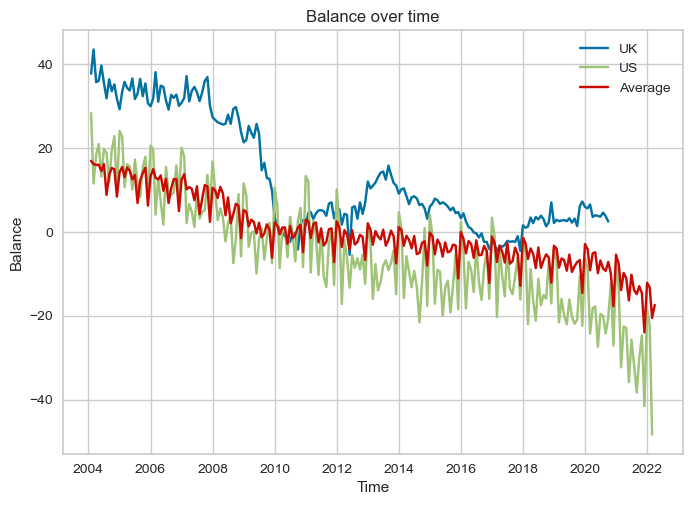

In [63]:
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['UK_Balance'], label='UK')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['US_Balance'], label='US')

plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['Average_Balance'], label='Average')

# Add more lines as needed

plt.title('Balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [64]:
#Show only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]


Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
SWI_Balance                                                        1
UK_Balance                                                        18
US_Balance                                                         1
dtype: int64

In [65]:
#market_df.fillna(0, inplace=True)

### After making visualizations to see the evolution of the Balances while considering nans as 0, it disrupted the flow of the evolution so we decided to not fill the nans yet

In [66]:
market_df.fillna(0, inplace=True)

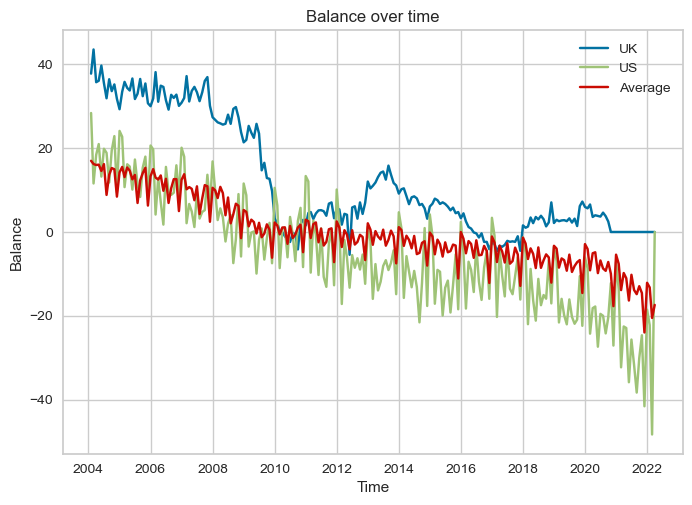

In [67]:
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['UK_Balance'], label='UK')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['US_Balance'], label='US')

plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['Average_Balance'], label='Average')

# Add more lines as needed

plt.title('Balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [68]:
#market_df_balance = market_df['CHN_Balance','FRA_Balance','GER_Balance','ITA_Balance','JAP_Balance','SWI_Balance','UK_Balance','US_Balance','EUR_Balance']

In [69]:
#create a new df with 'CHN_Balance','FRA_Balance','GER_Balance','ITA_Balance','JAP_Balance','SWI_Balance','UK_Balance','US_Balance','EUR_Balance'


# Outliers

## Visualization

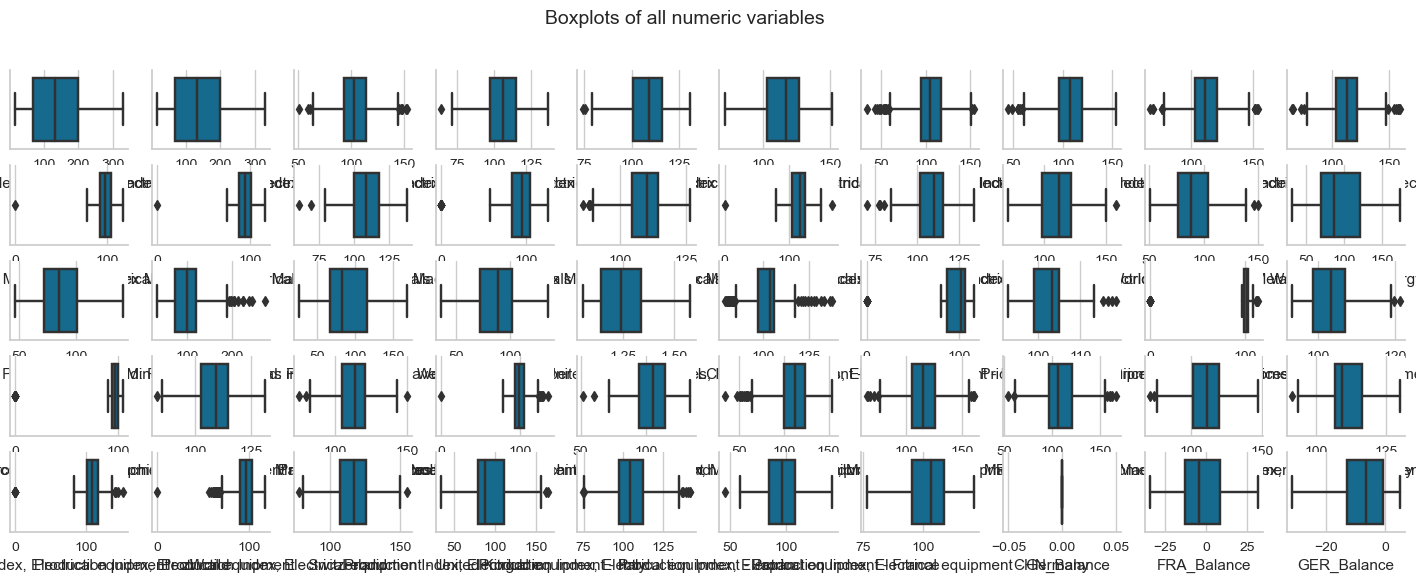

In [70]:
#Put all the numerical columns in a list
numerical_columns = market_df.select_dtypes(include=[np.number]).columns.tolist()

# Draw
fig, ax = plt.subplots(5, 10, figsize=(18,6))
for var, subplot in zip(numerical_columns, ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

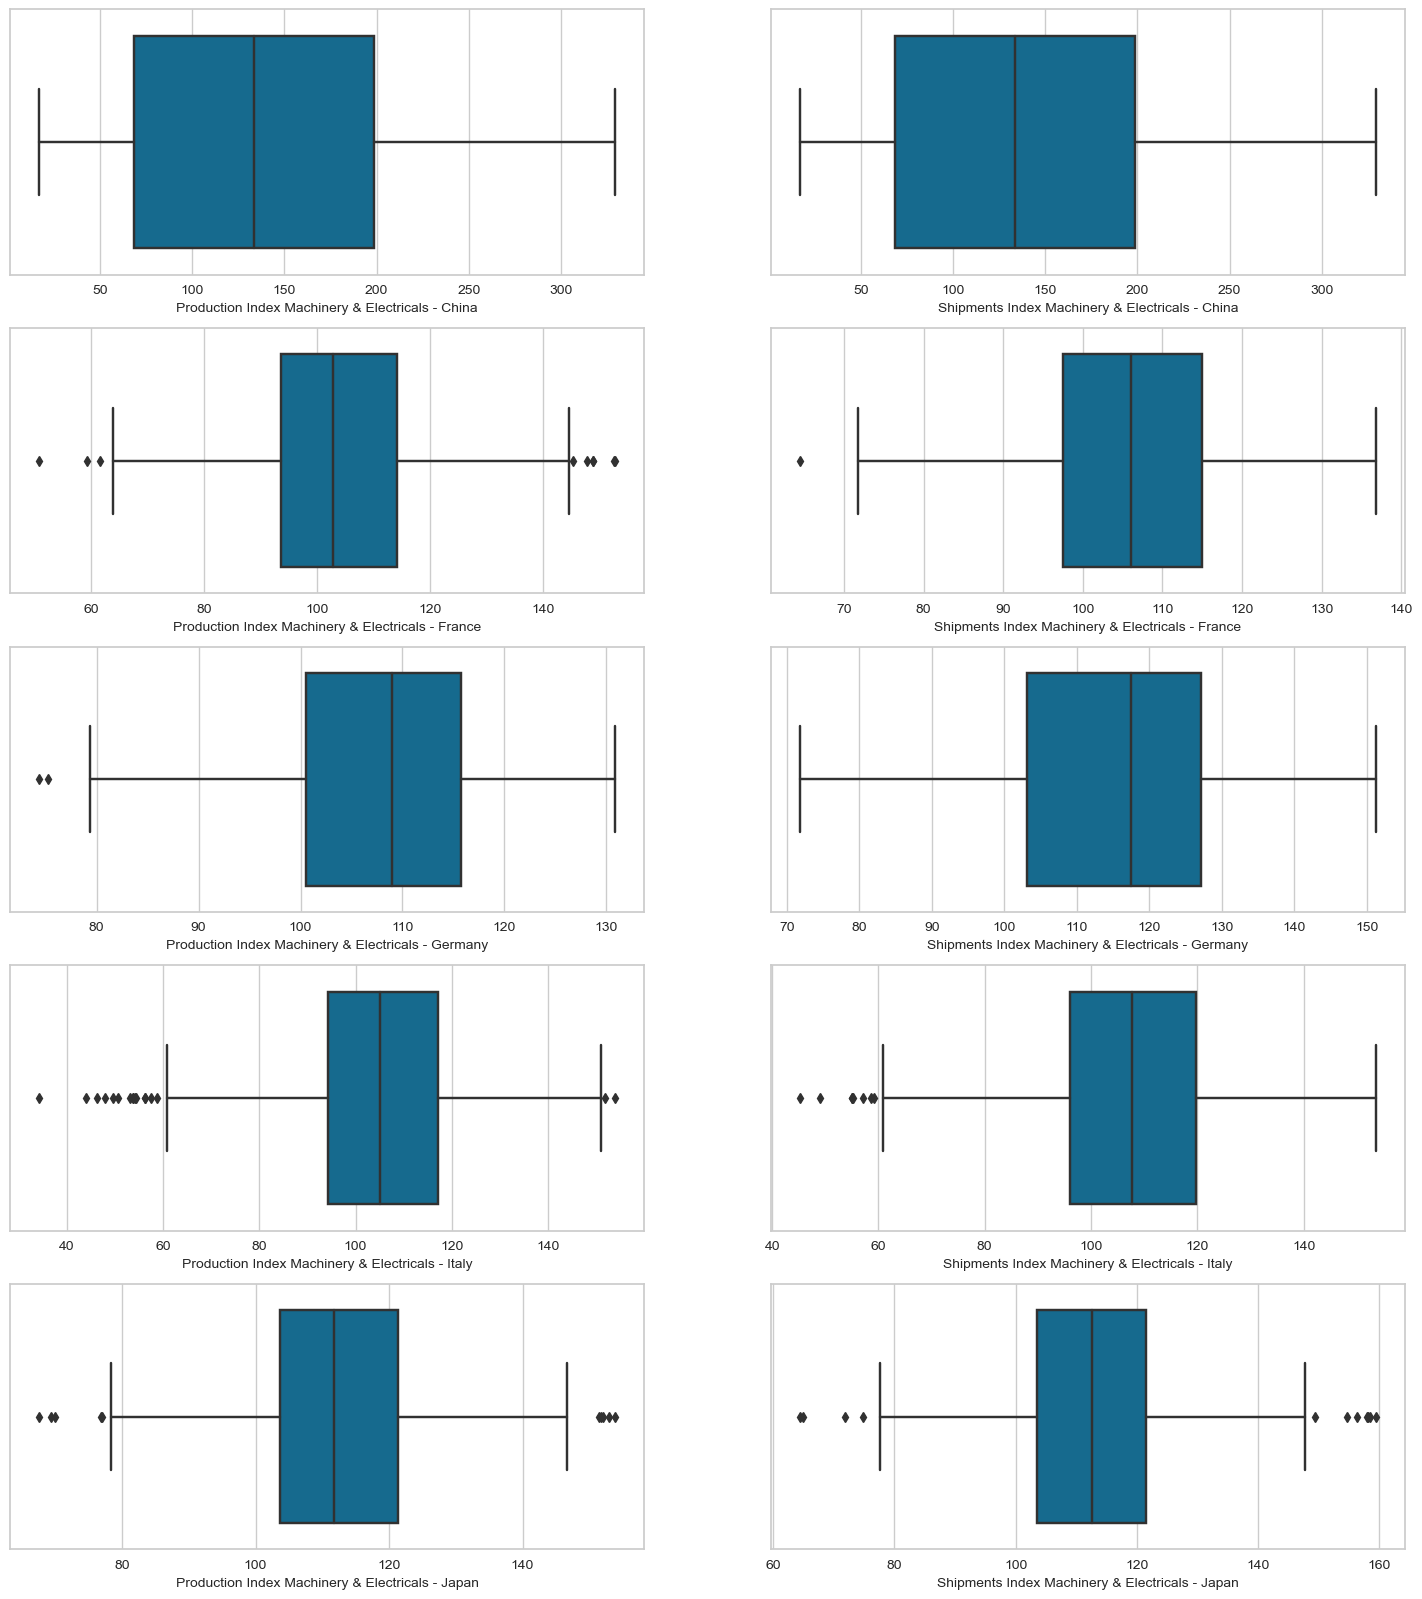

In [71]:
#Now we'll divide them to better visualize the box plots
#Do the box plot for the first 10 numerical columns
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[:10], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

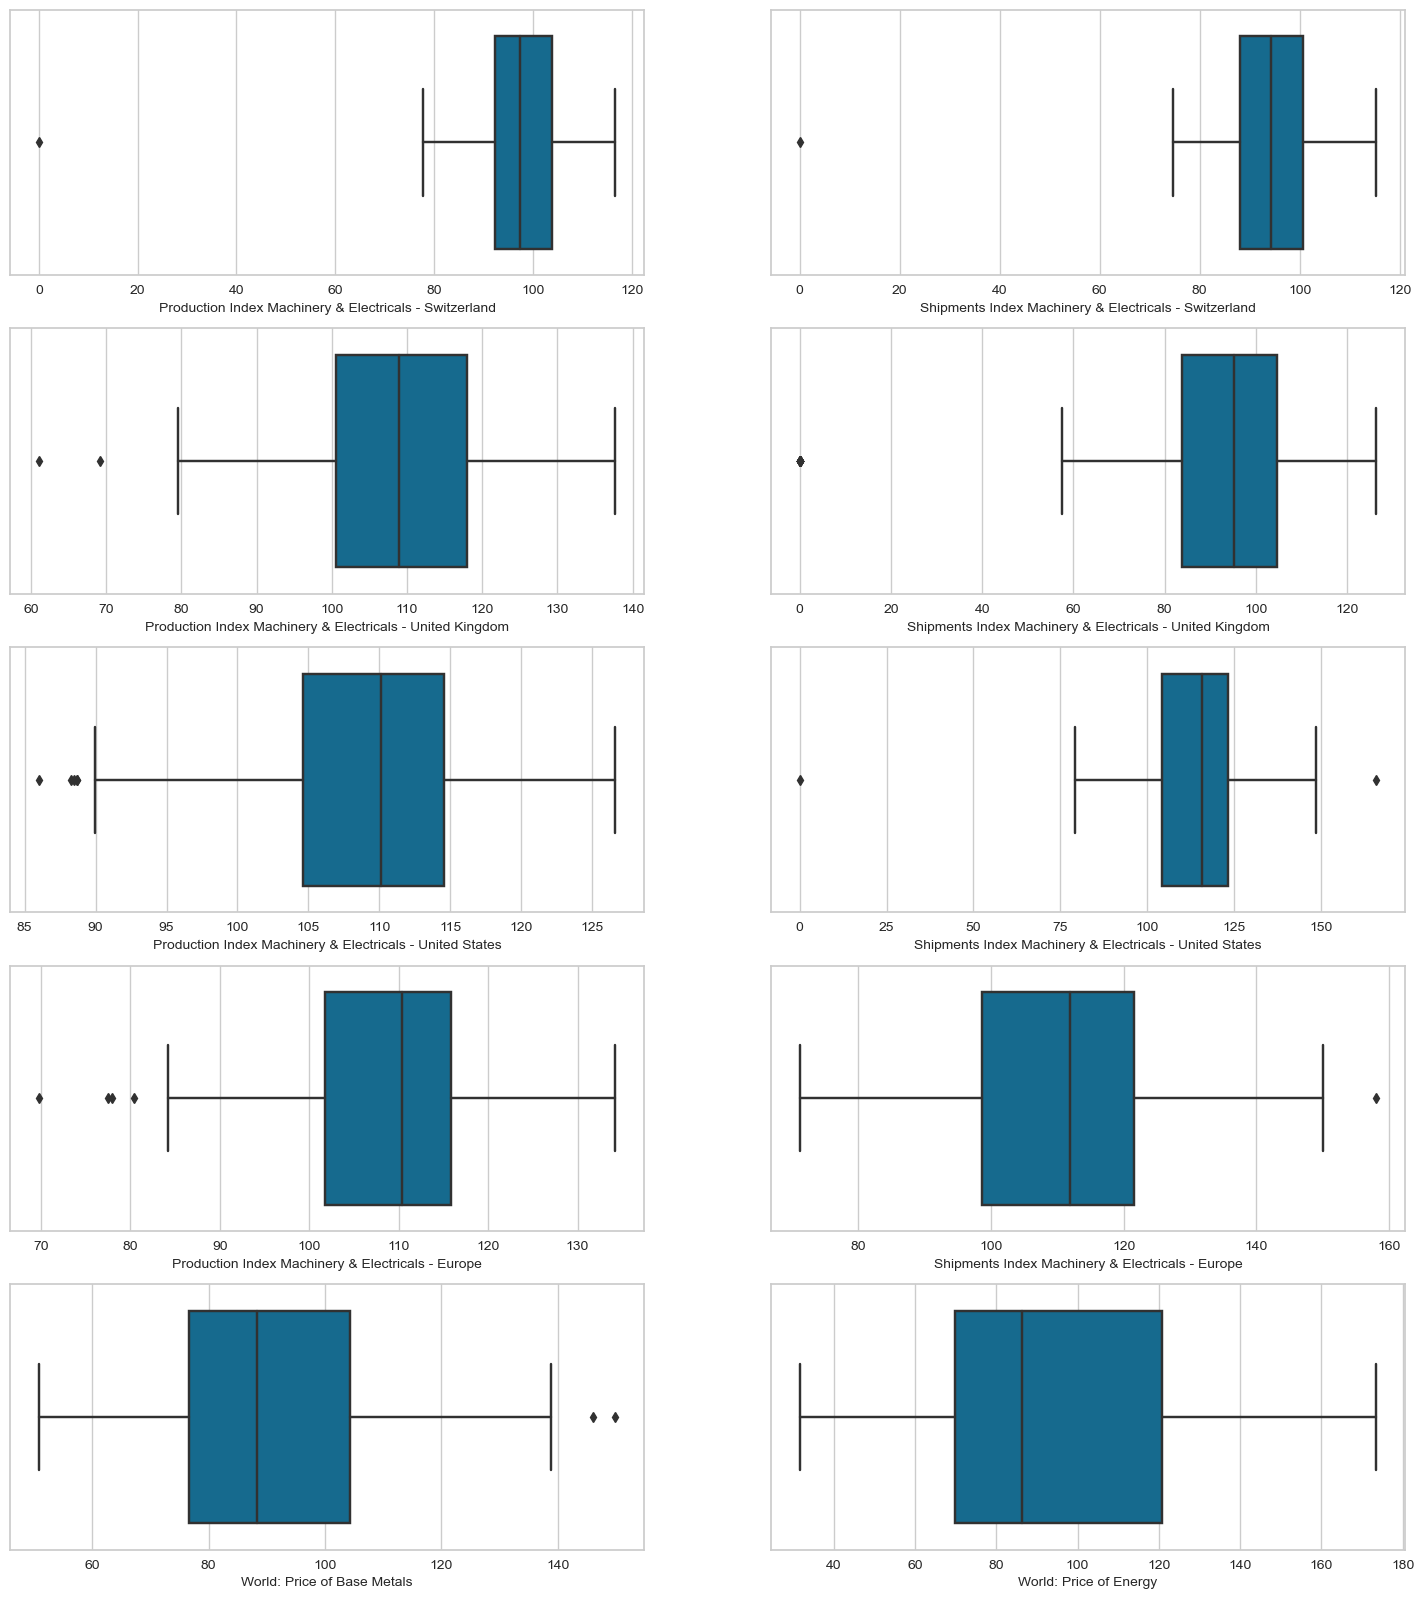

In [72]:
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[10:20], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

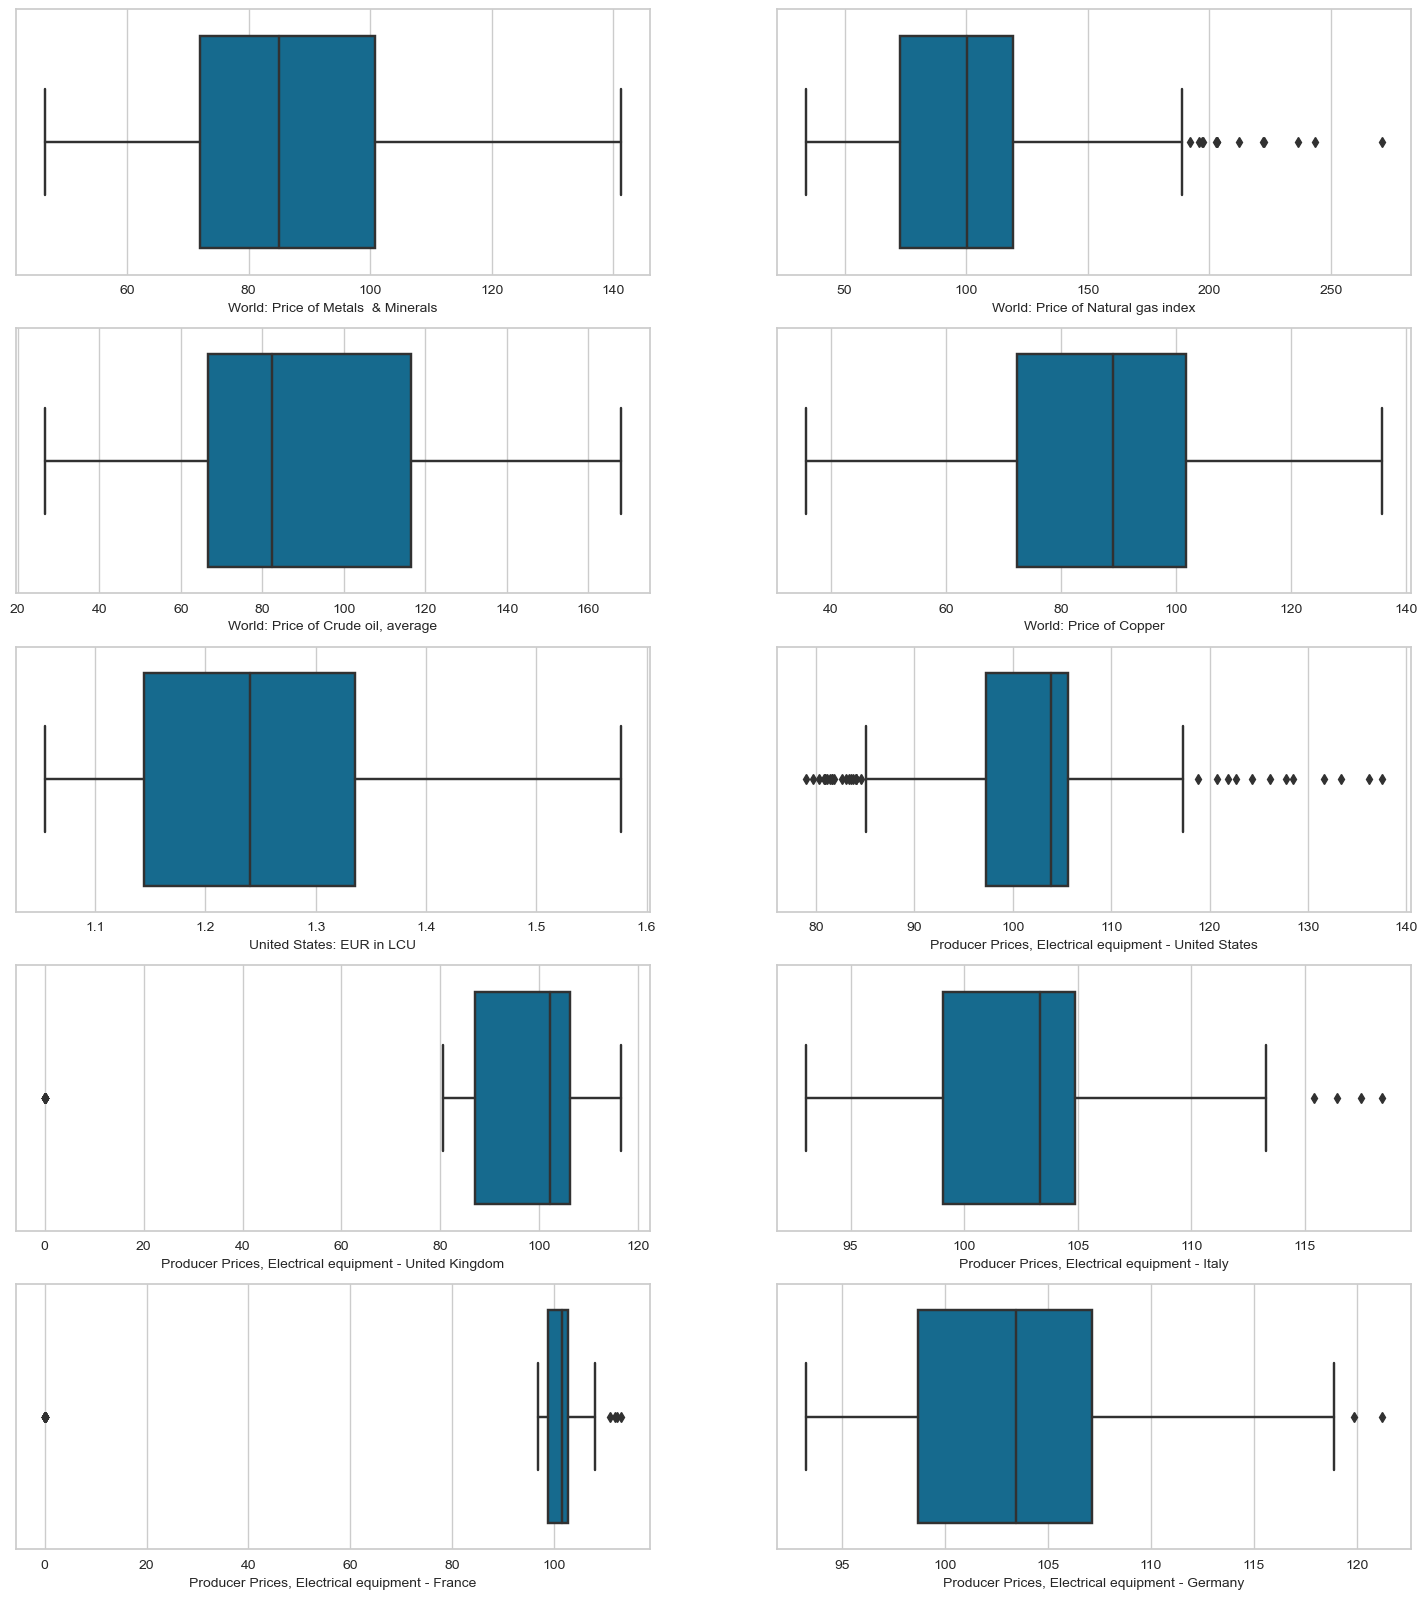

In [73]:
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[20:30], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

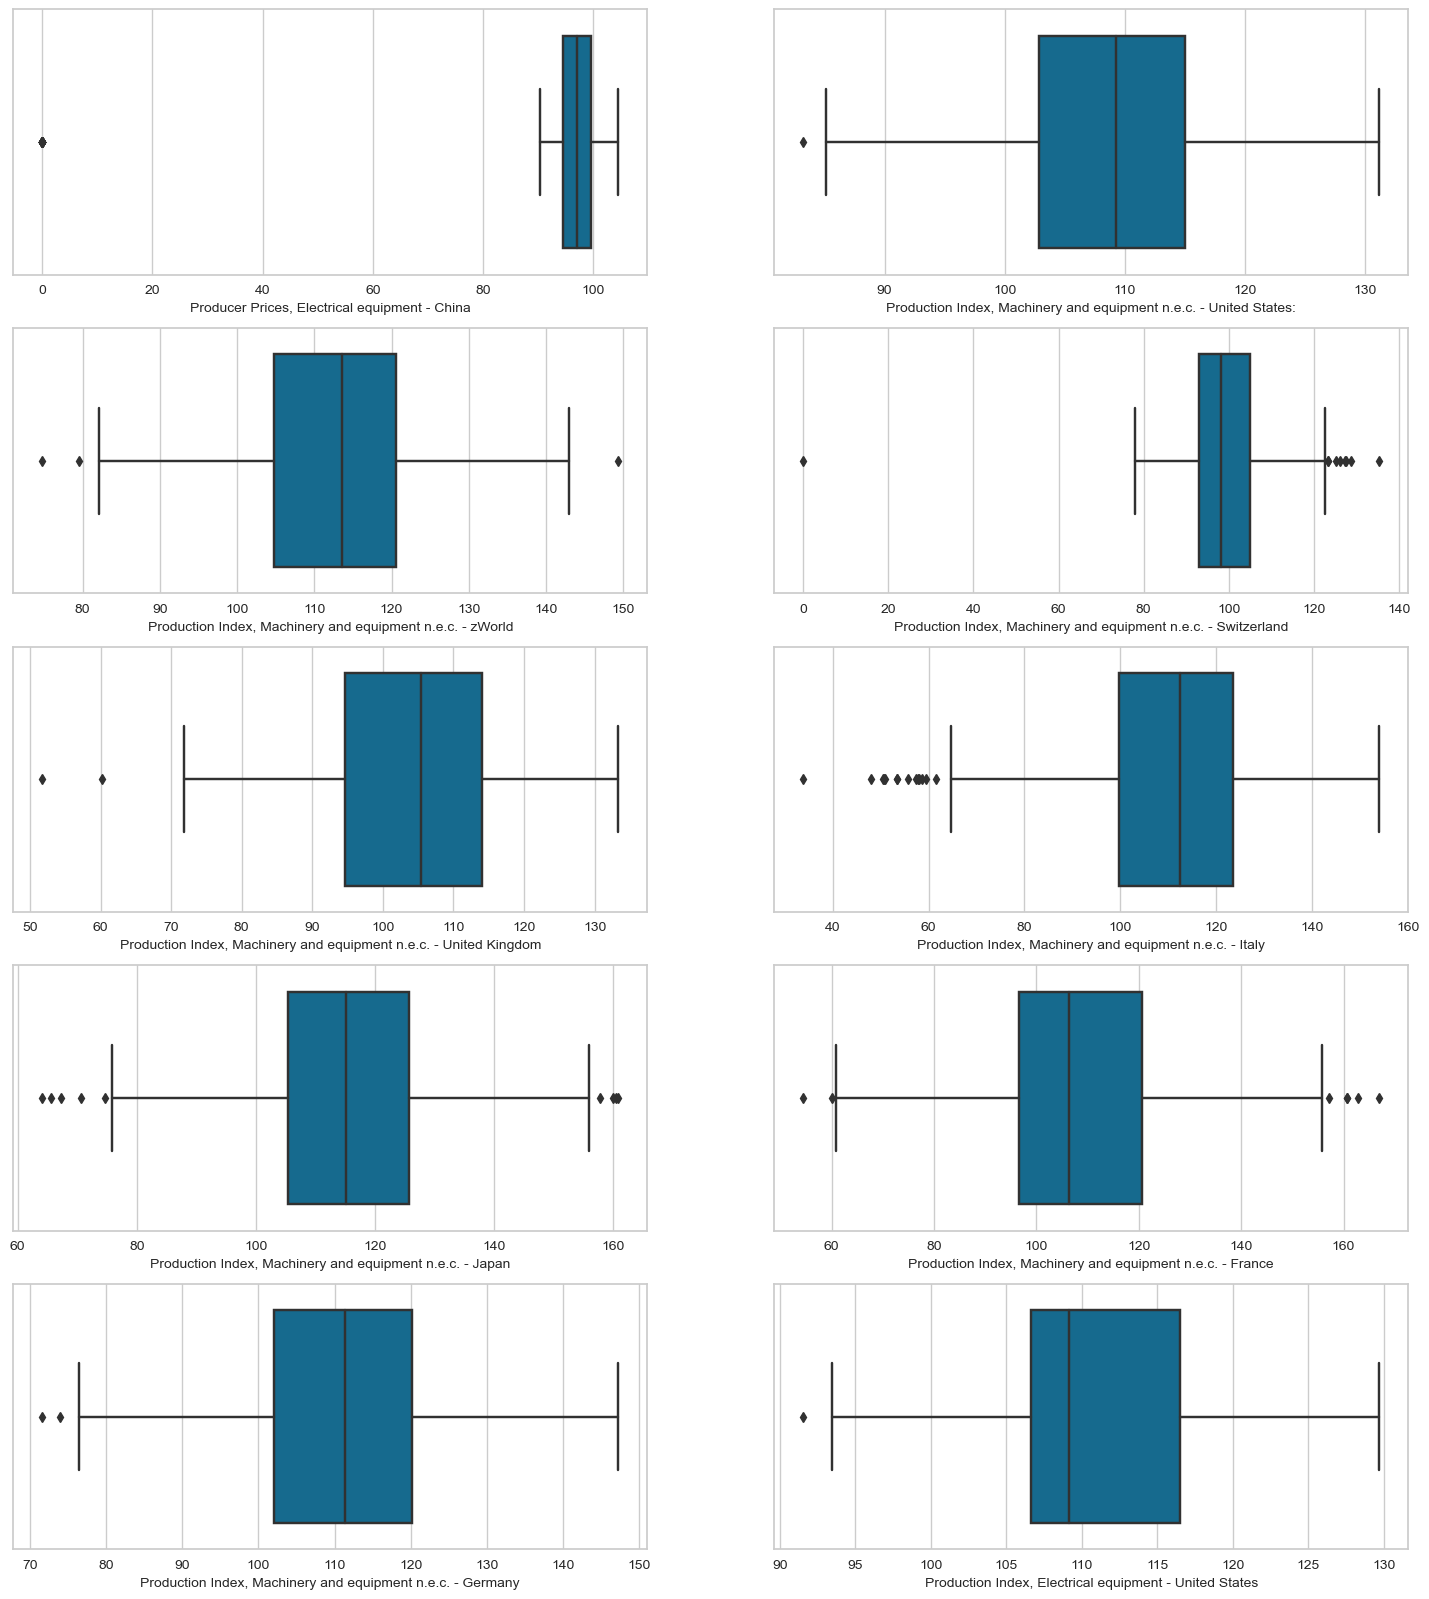

In [74]:
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[30:40], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

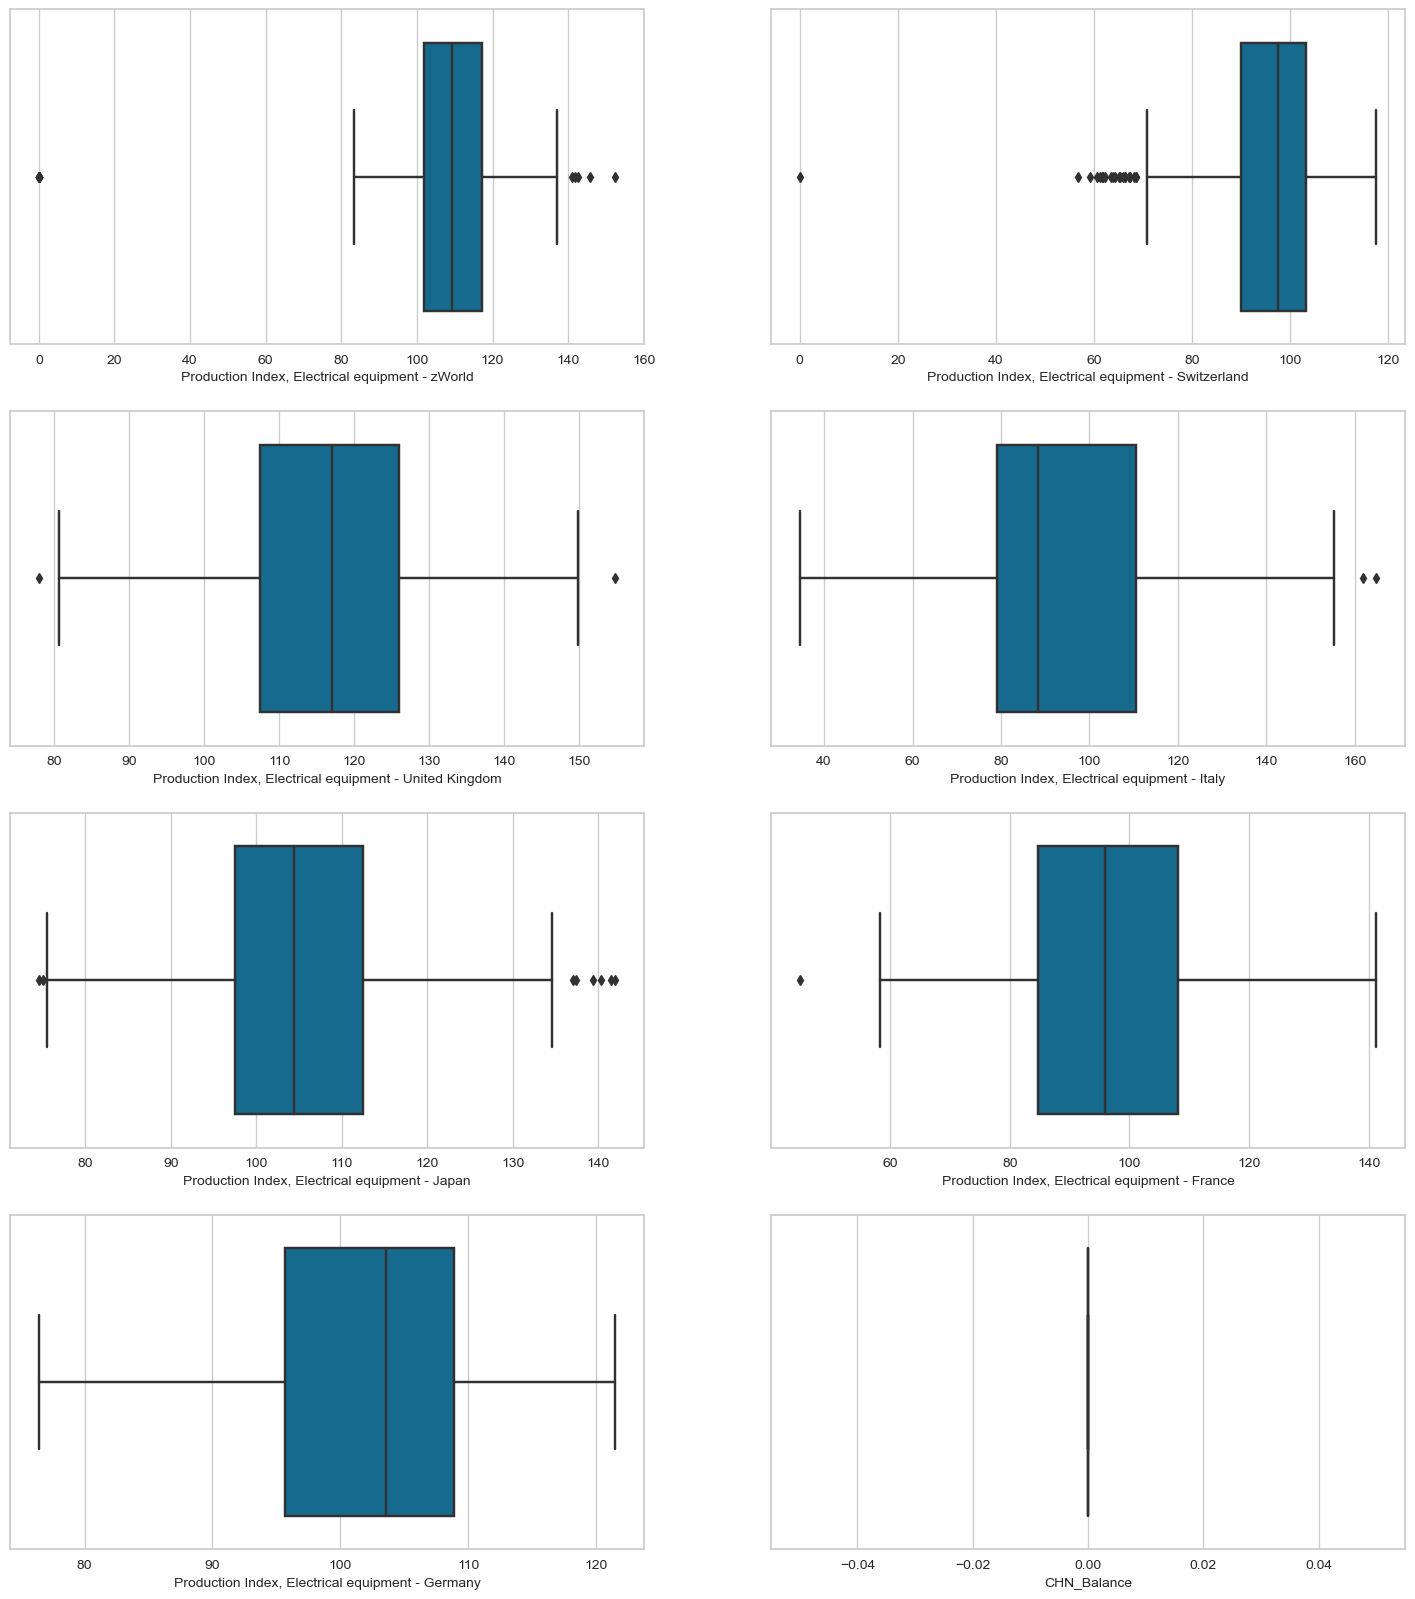

In [75]:
fig, ax = plt.subplots(4, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[40:48], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

In [76]:
market_df.shape

(219, 58)

### Not a lot of values so we should only remove the extreme outliers(and maybe not)

### And they are at constant prices of 2010, meaning it provides a more accurate comparison of prices over time, but doesnt necesserly disconsider 100% of the inflation effect

# Delete all data prior to 2010?

# 93% das sales são por 3 produtos (#1, #3, #5)

In [77]:
# 0 e nao aparecer valor é igual
# slides - enfase na data preparation

# removeram produtos dificeis de prever e faceis de prever

# year end final de setembro, incentivo de fazer melhor no final (target and bonus), september wonder

# os produtos n precisam de ser vendidos todos os dias ou até periodos

# pode haver produtos descontinuados ou produtos q so comecaram a ser vendidos a meio

# returns

# precos n mudam num tempo especifico

# varios tipos de descontos, por ex acumular e dps descontar

# small specific datasets -> outperform

# prever para cada produto num só notebook (siemens) (filip)

In [78]:
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
1                                     2004-02-01   
2                                     2004-03-01   
3                                     2004-04-01   
4                                     2004-05-01   
5                                     2004-06-01   

   Production Index Machinery & Electricals - China  \
1                                             16.94   
2                                             23.71   
3                                             24.44   
4                                             23.71   
5                                             27.01   

   Shipments Index Machinery & Electricals - China  \
1                                            16.94   
2                                            23.71   
3                                            24.44   
4                                            23.71   
5                                            27.01   

   Production Index Machinery & Electricals - France  \
1                                             112.09   
2                                             136.33   
3                                             117.79   
4                                             109.00   
5                                             133.79   

   Shipments Index Machinery & Electricals - France  \
1                                             83.46   
2                                            106.17   
3                                             92.01   
4                                             85.70   
5                                            106.64   

   Production Index Machinery & Electricals - Germany  \
1                                              82.62    
2                                             100.56    
3                                              89.65    
4                                              86.88    
5                                              99.01    

   Shipments Index Machinery & Electricals - Germany  \
1                                              79.45   
2                                              97.01   
3                                              84.93   
4                                              82.37   
5                                              95.11   

   Production Index Machinery & Electricals - Italy  \
1                                            124.29   
2                                            143.41   
3                                            129.08   
4                                            135.59   
5                                            136.42   

   Shipments Index Machinery & Electricals - Italy  \
1                                            86.56   
2                                           106.34   
3                                            95.58   
4                                           100.09   
5                                           110.89   

   Production Index Machinery & Electricals - Japan  ...  CHN_Balance  \
1                                            109.33  ...         0.00   
2                                            140.88  ...         0.00   
3                                            105.85  ...         0.00   
4                                            101.86  ...         0.00   
5                                            120.33  ...         0.00   

   FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
1        28.63         3.17        37.73        -1.16         1.23   
2        30.16         3.54        37.07        -3.80         5.98   
3        25.78         4.72        33.50         3.20         5.88   
4        23.31         4.51        35.50         1.56         5.78   
5        27.14         3.90        25.54         0.72         5.68   

   UK_Balance  US_Balance  EUR_Balance  Average_Balance  
1       37.75       28.36        17.02            16.97  
2       43.51       11.57        17.77            16.

In [79]:
market_df.tail()

Date - Index 2010=100 (if not otherwise noted)  \
215                                     2021-12-01   
216                                     2022-01-01   
217                                     2022-02-01   
218                                     2022-03-01   
219                                     2022-04-01   

     Production Index Machinery & Electricals - China  \
215                                            310.76   
216                                            235.96   
217                                            235.96   
218                                            329.41   
219                                            267.37   

     Shipments Index Machinery & Electricals - China  \
215                                           310.76   
216                                           235.96   
217                                           235.96   
218                                           329.41   
219                                           267.37   

     Production Index Machinery & Electricals - France  \
215                                             100.57   
216                                              85.74   
217                                              90.60   
218                                             107.84   
219                                              87.70   

     Shipments Index Machinery & Electricals - France  \
215                                            134.59   
216                                            108.16   
217                                            117.72   
218                                            136.86   
219                                            116.53   

     Production Index Machinery & Electricals - Germany  \
215                                             118.10    
216                                              94.55    
217                                             103.99    
218                                             121.31    
219                                              99.52    

     Shipments Index Machinery & Electricals - Germany  \
215                                             149.36   
216                                             120.35   
217                                             129.38   
218                                             151.20   
219                                             127.02   

     Production Index Machinery & Electricals - Italy  \
215                                             94.01   
216                                             86.85   
217                                            106.58   
218                                            124.64   
219                                            103.56   

     Shipments Index Machinery & Electricals - Italy  \
215                                           150.48   
216                                           101.26   
217                                           120.96   
218                                           153.65   
219                                           128.73   

     Production Index Machinery & Electricals - Japan  ...  CHN_Balance  \
215                                            127.77  ...         0.00   
216                                            110.46  ...         0.00   
217                                            117.88  ...         0.00   
218                                            152.00  ...         0.00   
219                                            114.26  ...         0.00   

     FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
215       -34.02       -31.26       -56.48        -3.26         1.88   
216       -22.41       -25.80       -14.41        -0.36         1.80   
217       -27.11       -25.40       -14.37        -0.42         1.71   
218       -29.02       -29.89       -29.01        -4.40         1.62   
219       -28.83       -27.50       -25.18        -0.75         0.00   

     UK_Balance  US_Balance  EUR_Balanc

In [80]:
sales_df.head()

DATE Mapped_GCK  Sales_EUR  Month  Year  NewDate
0 2018-10-01         #1       0.00     10  2018  2018-10
1 2018-10-02         #1       0.00     10  2018  2018-10
2 2018-10-03         #1       0.00     10  2018  2018-10
3 2018-10-04         #1       0.00     10  2018  2018-10
4 2018-10-05         #1       0.00     10  2018  2018-10

In [81]:
sales_df.tail()

DATE Mapped_GCK  Sales_EUR  Month  Year  NewDate
9797 2019-08-23        #12       0.00      8  2019  2019-08
9798 2019-08-23        #36    1015.00      8  2019  2019-08
9799 2019-08-12        #12       0.00      8  2019  2019-08
9800 2019-08-28         #8   43763.91      8  2019  2019-08
9801 2019-08-27         #8       0.00      8  2019  2019-08

In [82]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
 3   Month       9802 non-null   int64         
 4   Year        9802 non-null   int64         
 5   NewDate     9802 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 459.6+ KB


In [83]:
grouped_sales_df = sales_df.groupby(['DATE', 'Mapped_GCK']).sum()
grouped_sales_df.head()


Sales_EUR  Month  Year
DATE       Mapped_GCK                        
2018-10-01 #1               0.00     10  2018
           #11              0.00     10  2018
           #12              0.00     10  2018
           #16              0.00     10  2018
           #3               0.00     10  2018

In [84]:
grouped_sales_df = grouped_sales_df.drop(['Month', 'Year'], axis=1)


In [85]:
grouped_sales_df = grouped_sales_df.reset_index()
grouped_sales_df.head()



DATE Mapped_GCK  Sales_EUR
0 2018-10-01         #1       0.00
1 2018-10-01        #11       0.00
2 2018-10-01        #12       0.00
3 2018-10-01        #16       0.00
4 2018-10-01         #3       0.00

In [86]:
grouped_sales_df.head(15)


DATE Mapped_GCK  Sales_EUR
0  2018-10-01         #1       0.00
1  2018-10-01        #11       0.00
2  2018-10-01        #12       0.00
3  2018-10-01        #16       0.00
4  2018-10-01         #3       0.00
5  2018-10-01         #4       0.00
6  2018-10-01         #5       0.00
7  2018-10-01         #6       0.00
8  2018-10-01         #8       0.00
9  2018-10-02         #1       0.00
10 2018-10-02        #12       0.00
11 2018-10-02        #16       0.00
12 2018-10-02        #20       0.00
13 2018-10-02         #3       0.00
14 2018-10-02        #36       0.00

In [87]:
grouped_sales_df.tail()

DATE Mapped_GCK  Sales_EUR
9797 2022-04-29         #9    1653.00
9798 2022-04-30         #1       0.00
9799 2022-04-30         #3       0.00
9800 2022-04-30         #4       0.00
9801 2022-04-30         #5       0.00

In [88]:
grouped_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.9+ KB


# AQUI

In [89]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 58 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   219 non-null    float64       
 2   Shipments Index Machinery & Electricals - China                    219 non-null    float64       
 3   Production Index Machinery & Electricals - France                  219 non-null    float64       
 4   Shipments Index Machinery & Electricals - France                   219 non-null    float64       
 5   Production Index Machinery & Electricals - Germany                 219 non-null    float64       
 6   Shipments Index Machinery & Electricals - Germany                 

# Since on the sales data we only have the sales from 2018 forward we will only use the data from the corresponding Date

In [90]:
# Convert the 'Date - Index 2010=100 (if not otherwise noted)' column to datetime
market_df['Date - Index 2010=100 (if not otherwise noted)'] = pd.to_datetime(market_df['Date - Index 2010=100 (if not otherwise noted)'])

# Drop all rows prior to 2018-10-01
market_df = market_df[market_df['Date - Index 2010=100 (if not otherwise noted)'] >= '2018-10-01']


In [91]:
market_df.head()

Date - Index 2010=100 (if not otherwise noted)  \
177                                     2018-10-01   
178                                     2018-11-01   
179                                     2018-12-01   
180                                     2019-01-01   
181                                     2019-02-01   

     Production Index Machinery & Electricals - China  \
177                                            211.96   
178                                            220.52   
179                                            241.85   
180                                            175.67   
181                                            175.67   

     Shipments Index Machinery & Electricals - China  \
177                                           211.96   
178                                           220.52   
179                                           241.85   
180                                           175.67   
181                                           175.67   

     Production Index Machinery & Electricals - France  \
177                                             108.28   
178                                              99.64   
179                                              94.69   
180                                              90.14   
181                                              92.55   

     Shipments Index Machinery & Electricals - France  \
177                                            122.45   
178                                            115.96   
179                                            115.13   
180                                            108.33   
181                                            108.94   

     Production Index Machinery & Electricals - Germany  \
177                                             124.23    
178                                             127.40    
179                                             120.52    
180                                             104.78    
181                                             109.60    

     Shipments Index Machinery & Electricals - Germany  \
177                                             137.74   
178                                             142.73   
179                                             141.41   
180                                             118.70   
181                                             122.69   

     Production Index Machinery & Electricals - Italy  \
177                                            118.35   
178                                            107.72   
179                                             88.78   
180                                             99.28   
181                                            104.59   

     Shipments Index Machinery & Electricals - Italy  \
177                                           122.46   
178                                           120.13   
179                                           131.94   
180                                            92.42   
181                                           103.21   

     Production Index Machinery & Electricals - Japan  ...  CHN_Balance  \
177                                            125.21  ...         0.00   
178                                            122.62  ...         0.00   
179                                            122.99  ...         0.00   
180                                            105.51  ...         0.00   
181                                            114.47  ...         0.00   

     FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
177       -14.17       -13.51        -4.11         0.42         4.48   
178       -16.32       -15.33       -12.41        -0.67         4.59   
179       -20.44       -20.89       -43.15        -1.52         4.69   
180       -18.18       -13.93         6.86        -0.79         4.46   
181       -16.39       -13.09         1.37        -0.53         4.23   

     UK_Balance  US_Balance  EUR_Balanc

In [92]:
# Rename the column
market_df = market_df.rename(columns={"Date - Index 2010=100 (if not otherwise noted)": "DATE"})
market_df.head()


DATE  Production Index Machinery & Electricals - China  \
177 2018-10-01                                            211.96   
178 2018-11-01                                            220.52   
179 2018-12-01                                            241.85   
180 2019-01-01                                            175.67   
181 2019-02-01                                            175.67   

     Shipments Index Machinery & Electricals - China  \
177                                           211.96   
178                                           220.52   
179                                           241.85   
180                                           175.67   
181                                           175.67   

     Production Index Machinery & Electricals - France  \
177                                             108.28   
178                                              99.64   
179                                              94.69   
180                                              90.14   
181                                              92.55   

     Shipments Index Machinery & Electricals - France  \
177                                            122.45   
178                                            115.96   
179                                            115.13   
180                                            108.33   
181                                            108.94   

     Production Index Machinery & Electricals - Germany  \
177                                             124.23    
178                                             127.40    
179                                             120.52    
180                                             104.78    
181                                             109.60    

     Shipments Index Machinery & Electricals - Germany  \
177                                             137.74   
178                                             142.73   
179                                             141.41   
180                                             118.70   
181                                             122.69   

     Production Index Machinery & Electricals - Italy  \
177                                            118.35   
178                                            107.72   
179                                             88.78   
180                                             99.28   
181                                            104.59   

     Shipments Index Machinery & Electricals - Italy  \
177                                           122.46   
178                                           120.13   
179                                           131.94   
180                                            92.42   
181                                           103.21   

     Production Index Machinery & Electricals - Japan  ...  CHN_Balance  \
177                                            125.21  ...         0.00   
178                                            122.62  ...         0.00   
179                                            122.99  ...         0.00   
180                                            105.51  ...         0.00   
181                                            114.47  ...         0.00   

     FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
177       -14.17       -13.51        -4.11         0.42         4.48   
178       -16.32       -15.33       -12.41        -0.67         4.59   
179       -20.44       -20.89       -43.15        -1.52         4.69   
180       -18.18       -13.93         6.86        -0.79         4.46   
181       -16.39       -13.09         1.37        -0.53         4.23   

     UK_Balance  US_Balance  EUR_Balance  Average_Balance  
177        1.34      -15.91        -6.60            -5.34  
178        2.29       -6.80        -9.86            -6.06  
179        7.05      -17.02       -17.40           -12.08  
180        2.14       -3.53        -6.64            -3.29  
181 

In [93]:
market_df = market_df.rename(columns={"Date - Index 2010=100 (if not otherwise noted)": "DATE"})

In [94]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 177 to 219
Data columns (total 58 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   DATE                                                               43 non-null     datetime64[ns]
 1   Production Index Machinery & Electricals - China                   43 non-null     float64       
 2   Shipments Index Machinery & Electricals - China                    43 non-null     float64       
 3   Production Index Machinery & Electricals - France                  43 non-null     float64       
 4   Shipments Index Machinery & Electricals - France                   43 non-null     float64       
 5   Production Index Machinery & Electricals - Germany                 43 non-null     float64       
 6   Shipments Index Machinery & Electricals - Germany                

In [95]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
 3   Month       9802 non-null   int64         
 4   Year        9802 non-null   int64         
 5   NewDate     9802 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 459.6+ KB


# New Dataset

In [96]:
# Assuming there is a dataframe named sales_df which is not listed in the variables
# Merge the two dataframes on the common column. If there is no common column, change 'common_column' to the appropriate column name
final_dataset = pd.merge(market_df, grouped_sales_df, on='DATE')


In [97]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 278
Data columns (total 60 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   DATE                                                               279 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   279 non-null    float64       
 2   Shipments Index Machinery & Electricals - China                    279 non-null    float64       
 3   Production Index Machinery & Electricals - France                  279 non-null    float64       
 4   Shipments Index Machinery & Electricals - France                   279 non-null    float64       
 5   Production Index Machinery & Electricals - Germany                 279 non-null    float64       
 6   Shipments Index Machinery & Electricals - Germany                 

In [98]:
final_dataset.head()

DATE  Production Index Machinery & Electricals - China  \
0 2018-10-01                                            211.96   
1 2018-10-01                                            211.96   
2 2018-10-01                                            211.96   
3 2018-10-01                                            211.96   
4 2018-10-01                                            211.96   

   Shipments Index Machinery & Electricals - China  \
0                                           211.96   
1                                           211.96   
2                                           211.96   
3                                           211.96   
4                                           211.96   

   Production Index Machinery & Electricals - France  \
0                                             108.28   
1                                             108.28   
2                                             108.28   
3                                             108.28   
4                                             108.28   

   Shipments Index Machinery & Electricals - France  \
0                                            122.45   
1                                            122.45   
2                                            122.45   
3                                            122.45   
4                                            122.45   

   Production Index Machinery & Electricals - Germany  \
0                                             124.23    
1                                             124.23    
2                                             124.23    
3                                             124.23    
4                                             124.23    

   Shipments Index Machinery & Electricals - Germany  \
0                                             137.74   
1                                             137.74   
2                                             137.74   
3                                             137.74   
4                                             137.74   

   Production Index Machinery & Electricals - Italy  \
0                                            118.35   
1                                            118.35   
2                                            118.35   
3                                            118.35   
4                                            118.35   

   Shipments Index Machinery & Electricals - Italy  \
0                                           122.46   
1                                           122.46   
2                                           122.46   
3                                           122.46   
4                                           122.46   

   Production Index Machinery & Electricals - Japan  ...  GER_Balance  \
0                                            125.21  ...       -13.51   
1                                            125.21  ...       -13.51   
2                                            125.21  ...       -13.51   
3                                            125.21  ...       -13.51   
4                                            125.21  ...       -13.51   

   ITA_Balance  JAP_Balance  SWI_Balance  UK_Balance  US_Balance  EUR_Balance  \
0        -4.11         0.42         4.48        1.34      -15.91        -6.60   
1        -4.11         0.42         4.48        1.34      -15.91        -6.60   
2        -4.11         0.42         4.48        1.34      -15.91        -6.60   
3        -4.11         0.42         4.48        1.34      -15.91        -6.60   
4        -4.11         0.42         4.48        1.34      -15.91        -6.60   

   Average_Balance  Mapped_GCK  Sales_EUR  
0            -5.34          #1       0.00  
1            -5.34         #11       0.00  
2            -5.34         #12       0.00  
3            -5.34         #16       0.00  
4            -5.34          #3       0.00  

[5 rows x 60 columns]

In [99]:
final_dataset.tail()

DATE  Production Index Machinery & Electricals - China  \
274 2022-04-01                                            267.37   
275 2022-04-01                                            267.37   
276 2022-04-01                                            267.37   
277 2022-04-01                                            267.37   
278 2022-04-01                                            267.37   

     Shipments Index Machinery & Electricals - China  \
274                                           267.37   
275                                           267.37   
276                                           267.37   
277                                           267.37   
278                                           267.37   

     Production Index Machinery & Electricals - France  \
274                                              87.70   
275                                              87.70   
276                                              87.70   
277                                              87.70   
278                                              87.70   

     Shipments Index Machinery & Electricals - France  \
274                                            116.53   
275                                            116.53   
276                                            116.53   
277                                            116.53   
278                                            116.53   

     Production Index Machinery & Electricals - Germany  \
274                                              99.52    
275                                              99.52    
276                                              99.52    
277                                              99.52    
278                                              99.52    

     Shipments Index Machinery & Electricals - Germany  \
274                                             127.02   
275                                             127.02   
276                                             127.02   
277                                             127.02   
278                                             127.02   

     Production Index Machinery & Electricals - Italy  \
274                                            103.56   
275                                            103.56   
276                                            103.56   
277                                            103.56   
278                                            103.56   

     Shipments Index Machinery & Electricals - Italy  \
274                                           128.73   
275                                           128.73   
276                                           128.73   
277                                           128.73   
278                                           128.73   

     Production Index Machinery & Electricals - Japan  ...  GER_Balance  \
274                                            114.26  ...       -27.50   
275                                            114.26  ...       -27.50   
276                                            114.26  ...       -27.50   
277                                            114.26  ...       -27.50   
278                                            114.26  ...       -27.50   

     ITA_Balance  JAP_Balance  SWI_Balance  UK_Balance  US_Balance  \
274       -25.18        -0.75         0.00        0.00        0.00   
275       -25.18        -0.75         0.00        0.00        0.00   
276       -25.18        -0.75         0.00        0.00        0.00   
277       -25.18        -0.75         0.00        0.00        0.00   
278       -25.18        -0.75         0.00        0.00        0.00   

     EUR_Balance  Average_Balance  Mapped_GCK  Sales_EUR  
274       -22.03           -17.38          #4       0.00  
275       -22.03           -17.38          #5   -5000.00  
276       -22.03           -17.38          #6       0.00  
277       -22.03           -17.38          #8      41.00  
278       -22.03     

In [100]:
test_df.head()

Month Year Mapped_GCK  Sales_EUR
0 2022-05-01         #3        NaN
1 2022-06-01         #3        NaN
2 2022-07-01         #3        NaN
3 2022-08-01         #3        NaN
4 2022-09-01         #3        NaN

In [101]:
test_df.tail()

Month Year Mapped_GCK  Sales_EUR
135 2022-10-01         #1        NaN
136 2022-11-01         #1        NaN
137 2022-12-01         #1        NaN
138 2023-01-01         #1        NaN
139 2023-02-01         #1        NaN

In [102]:
grouped_sales_df.head()

DATE Mapped_GCK  Sales_EUR
0 2018-10-01         #1       0.00
1 2018-10-01        #11       0.00
2 2018-10-01        #12       0.00
3 2018-10-01        #16       0.00
4 2018-10-01         #3       0.00

In [103]:
grouped_sales_df.tail()

DATE Mapped_GCK  Sales_EUR
9797 2022-04-29         #9    1653.00
9798 2022-04-30         #1       0.00
9799 2022-04-30         #3       0.00
9800 2022-04-30         #4       0.00
9801 2022-04-30         #5       0.00

In [104]:
grouped_sales_df['DATE'] = grouped_sales_df['DATE'].dt.to_period('M')
grouped_sales = grouped_sales_df.groupby(['Mapped_GCK', 'DATE'])['Sales_EUR'].sum().reset_index()
grouped_sales.tail()


Mapped_GCK     DATE  Sales_EUR
597         #9  2021-12   14935.20
598         #9  2022-01    2064.70
599         #9  2022-02     901.50
600         #9  2022-03    4452.60
601         #9  2022-04    3285.00

In [105]:
grouped_sales.head()

Mapped_GCK     DATE   Sales_EUR
0         #1  2018-10 36098918.79
1         #1  2018-11  5140760.00
2         #1  2018-12 37889612.12
3         #1  2019-01 27728148.35
4         #1  2019-02 34793163.53

In [106]:
grouped_sales_by_Mapped_GCK = grouped_sales.groupby('Mapped_GCK').sum()
print(grouped_sales_by_Mapped_GCK)


               Sales_EUR
Mapped_GCK              
#1         1544205996.76
#11          65901314.65
#12           8279486.32
#13           1009156.91
#14            493822.06
#16          18391175.71
#20             78326.86
#3          533443487.70
#36            998613.91
#4           15627204.96
#5          429595158.01
#6           20641890.49
#8           34871219.82
#9             308446.51


In [107]:
# Calculate the total sales
total_sales = grouped_sales_by_Mapped_GCK['Sales_EUR'].sum()

# Calculate the percentage of sales by Mapped_GCK
grouped_sales_by_Mapped_GCK['Sales_EUR'] / total_sales * 100


Mapped_GCK
#1    57.75
#11    2.46
#12    0.31
#13    0.04
#14    0.02
#16    0.69
#20    0.00
#3    19.95
#36    0.04
#4     0.58
#5    16.07
#6     0.77
#8     1.30
#9     0.01
Name: Sales_EUR, dtype: float64

### SO prod 1, 3 and 5 are responsible for about 94% of the total sales

In [108]:
# Extract year and month from the 'DATE' column and create a new 'YearMonth' column
market_df['DATE'] = market_df['DATE'].dt.to_period('M')
market_df.head()


DATE  Production Index Machinery & Electricals - China  \
177  2018-10                                            211.96   
178  2018-11                                            220.52   
179  2018-12                                            241.85   
180  2019-01                                            175.67   
181  2019-02                                            175.67   

     Shipments Index Machinery & Electricals - China  \
177                                           211.96   
178                                           220.52   
179                                           241.85   
180                                           175.67   
181                                           175.67   

     Production Index Machinery & Electricals - France  \
177                                             108.28   
178                                              99.64   
179                                              94.69   
180                                              90.14   
181                                              92.55   

     Shipments Index Machinery & Electricals - France  \
177                                            122.45   
178                                            115.96   
179                                            115.13   
180                                            108.33   
181                                            108.94   

     Production Index Machinery & Electricals - Germany  \
177                                             124.23    
178                                             127.40    
179                                             120.52    
180                                             104.78    
181                                             109.60    

     Shipments Index Machinery & Electricals - Germany  \
177                                             137.74   
178                                             142.73   
179                                             141.41   
180                                             118.70   
181                                             122.69   

     Production Index Machinery & Electricals - Italy  \
177                                            118.35   
178                                            107.72   
179                                             88.78   
180                                             99.28   
181                                            104.59   

     Shipments Index Machinery & Electricals - Italy  \
177                                           122.46   
178                                           120.13   
179                                           131.94   
180                                            92.42   
181                                           103.21   

     Production Index Machinery & Electricals - Japan  ...  CHN_Balance  \
177                                            125.21  ...         0.00   
178                                            122.62  ...         0.00   
179                                            122.99  ...         0.00   
180                                            105.51  ...         0.00   
181                                            114.47  ...         0.00   

     FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
177       -14.17       -13.51        -4.11         0.42         4.48   
178       -16.32       -15.33       -12.41        -0.67         4.59   
179       -20.44       -20.89       -43.15        -1.52         4.69   
180       -18.18       -13.93         6.86        -0.79         4.46   
181       -16.39       -13.09         1.37        -0.53         4.23   

     UK_Balance  US_Balance  EUR_Balance  Average_Balance  
177        1.34      -15.91        -6.60            -5.34  
178        2.29       -6.80        -9.86            -6.06  
179        7.05      -17.02       -17.40           -12.08  
180        2.14       -3.53        -6.64            -3.29  
181        2.9

In [109]:
final_dataset = pd.merge(grouped_sales, market_df, on='DATE')
final_dataset.head()

Mapped_GCK     DATE   Sales_EUR  \
0         #1  2018-10 36098918.79   
1        #11  2018-10  1021303.50   
2        #12  2018-10    28686.33   
3        #13  2018-10    27666.10   
4        #14  2018-10     5770.00   

   Production Index Machinery & Electricals - China  \
0                                            211.96   
1                                            211.96   
2                                            211.96   
3                                            211.96   
4                                            211.96   

   Shipments Index Machinery & Electricals - China  \
0                                           211.96   
1                                           211.96   
2                                           211.96   
3                                           211.96   
4                                           211.96   

   Production Index Machinery & Electricals - France  \
0                                             108.28   
1                                             108.28   
2                                             108.28   
3                                             108.28   
4                                             108.28   

   Shipments Index Machinery & Electricals - France  \
0                                            122.45   
1                                            122.45   
2                                            122.45   
3                                            122.45   
4                                            122.45   

   Production Index Machinery & Electricals - Germany  \
0                                             124.23    
1                                             124.23    
2                                             124.23    
3                                             124.23    
4                                             124.23    

   Shipments Index Machinery & Electricals - Germany  \
0                                             137.74   
1                                             137.74   
2                                             137.74   
3                                             137.74   
4                                             137.74   

   Production Index Machinery & Electricals - Italy  ...  CHN_Balance  \
0                                            118.35  ...         0.00   
1                                            118.35  ...         0.00   
2                                            118.35  ...         0.00   
3                                            118.35  ...         0.00   
4                                            118.35  ...         0.00   

   FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
0       -14.17       -13.51        -4.11         0.42         4.48   
1       -14.17       -13.51        -4.11         0.42         4.48   
2       -14.17       -13.51        -4.11         0.42         4.48   
3       -14.17       -13.51        -4.11         0.42         4.48   
4       -14.17       -13.51        -4.11         0.42         4.48   

   UK_Balance  US_Balance  EUR_Balance  Average_Balance  
0        1.34      -15.91        -6.60            -5.34  
1        1.34      -15.91        -6.60            -5.34  
2        1.34      -15.91        -6.60            -5.34  
3        1.34      -15.91        -6.60            -5.34  
4        1.34      -15.91        -6.60            -5.34  

[5 rows x 60 columns]

In [110]:
#a new column on final_dataset that is the Month of the DATE, and put it as the third column
final_dataset.insert(2, 'Month', final_dataset['DATE'].dt.month)
final_dataset.head()

Mapped_GCK     DATE  Month   Sales_EUR  \
0         #1  2018-10     10 36098918.79   
1        #11  2018-10     10  1021303.50   
2        #12  2018-10     10    28686.33   
3        #13  2018-10     10    27666.10   
4        #14  2018-10     10     5770.00   

   Production Index Machinery & Electricals - China  \
0                                            211.96   
1                                            211.96   
2                                            211.96   
3                                            211.96   
4                                            211.96   

   Shipments Index Machinery & Electricals - China  \
0                                           211.96   
1                                           211.96   
2                                           211.96   
3                                           211.96   
4                                           211.96   

   Production Index Machinery & Electricals - France  \
0                                             108.28   
1                                             108.28   
2                                             108.28   
3                                             108.28   
4                                             108.28   

   Shipments Index Machinery & Electricals - France  \
0                                            122.45   
1                                            122.45   
2                                            122.45   
3                                            122.45   
4                                            122.45   

   Production Index Machinery & Electricals - Germany  \
0                                             124.23    
1                                             124.23    
2                                             124.23    
3                                             124.23    
4                                             124.23    

   Shipments Index Machinery & Electricals - Germany  ...  CHN_Balance  \
0                                             137.74  ...         0.00   
1                                             137.74  ...         0.00   
2                                             137.74  ...         0.00   
3                                             137.74  ...         0.00   
4                                             137.74  ...         0.00   

   FRA_Balance  GER_Balance  ITA_Balance  JAP_Balance  SWI_Balance  \
0       -14.17       -13.51        -4.11         0.42         4.48   
1       -14.17       -13.51        -4.11         0.42         4.48   
2       -14.17       -13.51        -4.11         0.42         4.48   
3       -14.17       -13.51        -4.11         0.42         4.48   
4       -14.17       -13.51        -4.11         0.42         4.48   

   UK_Balance  US_Balance  EUR_Balance  Average_Balance  
0        1.34      -15.91        -6.60            -5.34  
1        1.34      -15.91        -6.60            -5.34  
2        1.34      -15.91        -6.60            -5.34  
3        1.34      -15.91        -6.60            -5.34  
4        1.34      -15.91        -6.60            -5.34  

[5 rows x 61 columns]

In [111]:
final_dataset['Month'].unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [112]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    object   
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [113]:
# Remove the '#' from 'Mapped_GCK' and convert the column to float
final_dataset['Mapped_GCK'] = final_dataset['Mapped_GCK'].str.replace('#', '').astype(float)


# Feature Selection

In [114]:
#Correlation Matrix
correlation = final_dataset.corr()
print(correlation['Sales_EUR'])

Mapped_GCK                                                          -0.46
Month                                                                0.01
Sales_EUR                                                            1.00
Production Index Machinery & Electricals - China                     0.02
Shipments Index Machinery & Electricals - China                      0.02
Production Index Machinery & Electricals - France                    0.00
Shipments Index Machinery & Electricals - France                     0.01
Production Index Machinery & Electricals - Germany                   0.01
Shipments Index Machinery & Electricals - Germany                    0.02
Production Index Machinery & Electricals - Italy                     0.00
Shipments Index Machinery & Electricals - Italy                      0.01
Production Index Machinery & Electricals - Japan                     0.01
Shipments Index Machinery & Electricals - Japan                      0.02
Production Index Machinery & Electrica

In [115]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [116]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = final_dataset.drop(['Sales_EUR', 'DATE'], axis=1)
y = final_dataset['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False]
Feature Ranking: [56 49 48 46 45 19 16 28 13 12  4  3  8  9  5 41 25 39  1  1 34 53 36 50
 54 44 30 31 40 35 51 38 47 26 33 23  6 14 43 21 17 27 32 24  7 15 55 22
 18 57 20 29 11  2 10 37 52  1 42]


In [117]:
# Get column names
column_names = X.columns

# Get selected features
selected_features = column_names[fit.support_]

print("Selected Features: %s" % (selected_features))

Selected Features: Index(['Production Index Machinery & Electricals - Europe',
       'Shipments Index Machinery & Electricals - Europe', 'EUR_Balance'],
      dtype='object')


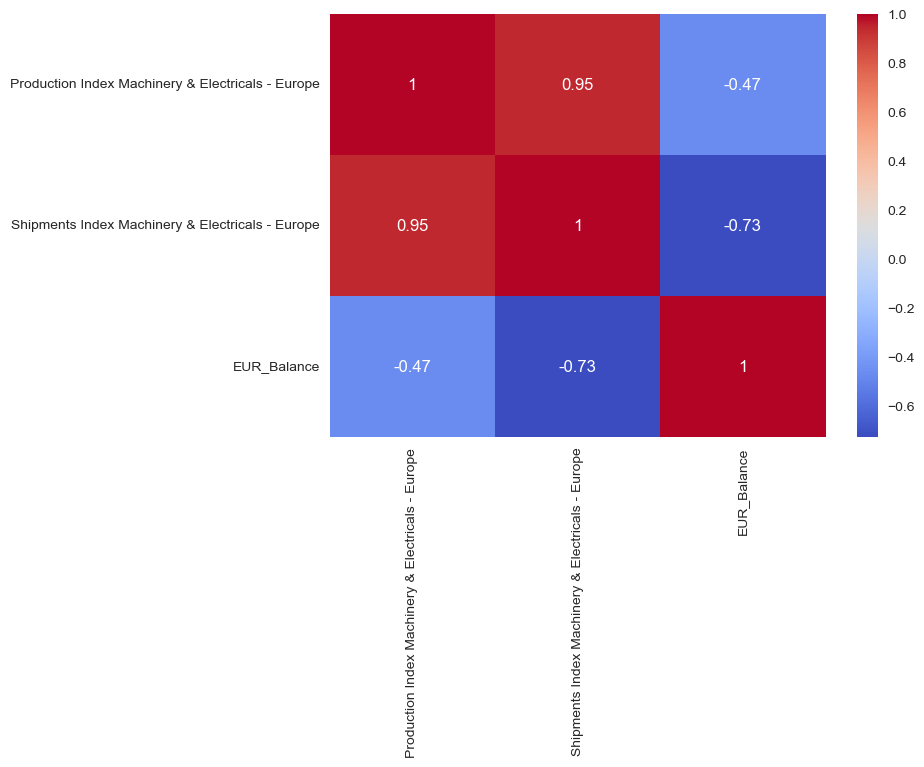

In [118]:
import seaborn as sns

# Assuming selected_features is a list of the names of the selected features
correlation = final_dataset[selected_features].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [119]:
# selected_features = selected_features.drop('Shipments Index Machinery & Electricals - France')

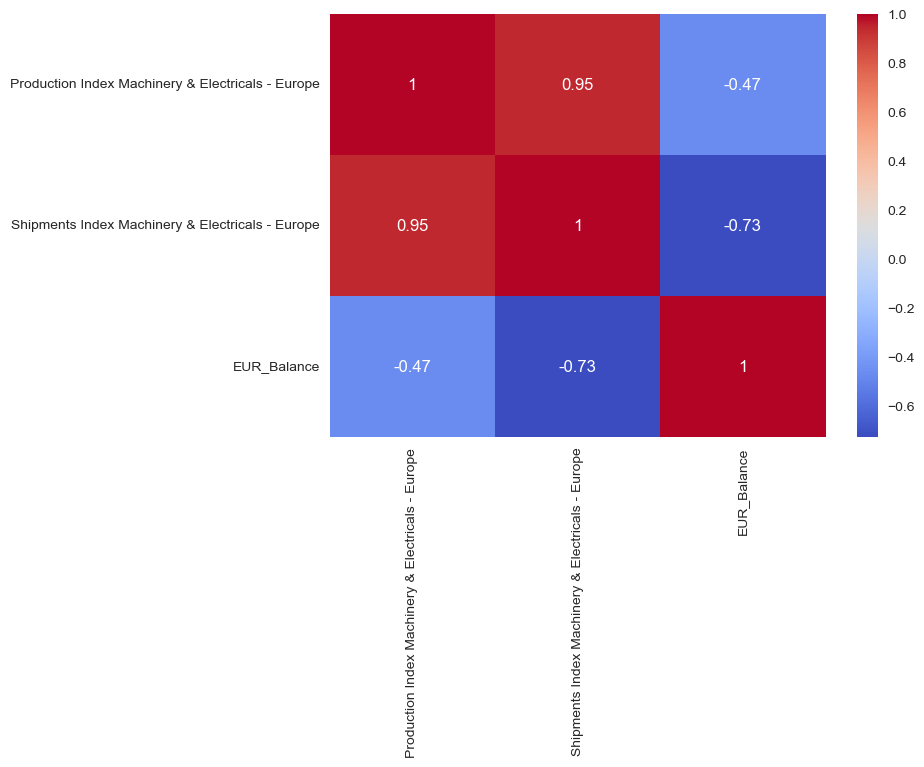

In [120]:
# Assuming selected_features is a list of the names of the selected features
correlation = final_dataset[selected_features].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [121]:
#!pip install xgboost

In [122]:
#XGBoost
from xgboost import XGBRegressor

X = final_dataset.drop(['Sales_EUR', 'DATE'], axis=1)
y = final_dataset['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)
print(model.feature_importances_)

[4.4131151e-01 6.6799985e-04 8.5768651e-04 0.0000000e+00 3.2528685e-04
 4.2335456e-03 1.8376607e-01 6.1347792e-03 8.0854766e-04 1.2479641e-03
 7.8128367e-05 1.0892253e-02 3.3965677e-03 8.6128648e-04 5.9892016e-04
 4.9393578e-03 8.1371464e-04 1.9851734e-03 1.6502725e-04 1.3031897e-02
 5.3520752e-03 6.8471059e-03 2.3923921e-03 9.8030269e-03 3.1060502e-03
 2.6663207e-02 2.1023924e-02 1.1533595e-03 1.5341306e-04 6.2828362e-03
 7.6928467e-05 3.5731588e-03 1.2474848e-04 2.0362344e-03 1.3227554e-03
 7.7473742e-05 2.2122780e-02 2.2867088e-04 2.0301737e-05 2.0525599e-04
 1.0207487e-02 5.8420952e-03 6.3422313e-03 1.5786057e-02 6.8275575e-03
 1.0753361e-02 3.6258166e-04 1.1048539e-03 6.9573970e-04 0.0000000e+00
 9.4397590e-03 5.1404559e-03 3.2232616e-02 1.5500686e-02 1.0644788e-03
 2.1952842e-04 1.6204853e-02 1.0915052e-02 6.2679164e-02]


In [123]:
# Fit the model and get feature importances
model = XGBRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                              Feature  Importance
0                                          Mapped_GCK        0.44
6   Production Index Machinery & Electricals - Ger...        0.18
58                                    Average_Balance        0.06
52                                        ITA_Balance        0.03
25                             World: Price of Copper        0.03
36  Production Index, Machinery and equipment n.e....        0.02
26                          United States: EUR in LCU        0.02
56                                         US_Balance        0.02
43  Production Index, Electrical equipment - Switz...        0.02
53                                        JAP_Balance        0.02
19   Shipments Index Machinery & Electricals - Europe        0.01
57                                        EUR_Balance        0.01
11    Shipments Index Machinery & Electricals - Japan        0.01
45     Production Index, Electrical equipment - Italy        0.01
40  Produc

In [124]:
# Select the features with importance higher than 0.01
important_features = importance_df[importance_df['Importance'] > 0.01]
important_features


Feature  Importance
0                                          Mapped_GCK        0.44
6   Production Index Machinery & Electricals - Ger...        0.18
58                                    Average_Balance        0.06
52                                        ITA_Balance        0.03
25                             World: Price of Copper        0.03
36  Production Index, Machinery and equipment n.e....        0.02
26                          United States: EUR in LCU        0.02
56                                         US_Balance        0.02
43  Production Index, Electrical equipment - Switz...        0.02
53                                        JAP_Balance        0.02
19   Shipments Index Machinery & Electricals - Europe        0.01
57                                        EUR_Balance        0.01
11    Shipments Index Machinery & Electricals - Japan        0.01
45     Production Index, Electrical equipment - Italy        0.01
40  Production Index, Machinery and equipment n.e....        0.01

In [125]:
important_list = important_features['Feature']


In [126]:
important_list

0                                            Mapped_GCK
6     Production Index Machinery & Electricals - Ger...
58                                      Average_Balance
52                                          ITA_Balance
25                               World: Price of Copper
36    Production Index, Machinery and equipment n.e....
26                            United States: EUR in LCU
56                                           US_Balance
43    Production Index, Electrical equipment - Switz...
53                                          JAP_Balance
19     Shipments Index Machinery & Electricals - Europe
57                                          EUR_Balance
11      Shipments Index Machinery & Electricals - Japan
45       Production Index, Electrical equipment - Italy
40    Production Index, Machinery and equipment n.e....
Name: Feature, dtype: object

In [127]:
# Extract the features from the importance_df DataFrame
important_features = important_list.tolist()
print(important_features)


['Mapped_GCK', 'Production Index Machinery & Electricals - Germany', 'Average_Balance', 'ITA_Balance', 'World: Price of Copper', 'Production Index, Machinery and equipment n.e.c. - United Kingdom', 'United States: EUR in LCU', 'US_Balance', 'Production Index, Electrical equipment - Switzerland', 'JAP_Balance', 'Shipments Index Machinery & Electricals - Europe', 'EUR_Balance', 'Shipments Index Machinery & Electricals - Japan', 'Production Index, Electrical equipment - Italy', 'Production Index, Machinery and equipment n.e.c. - Germany']


In [128]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

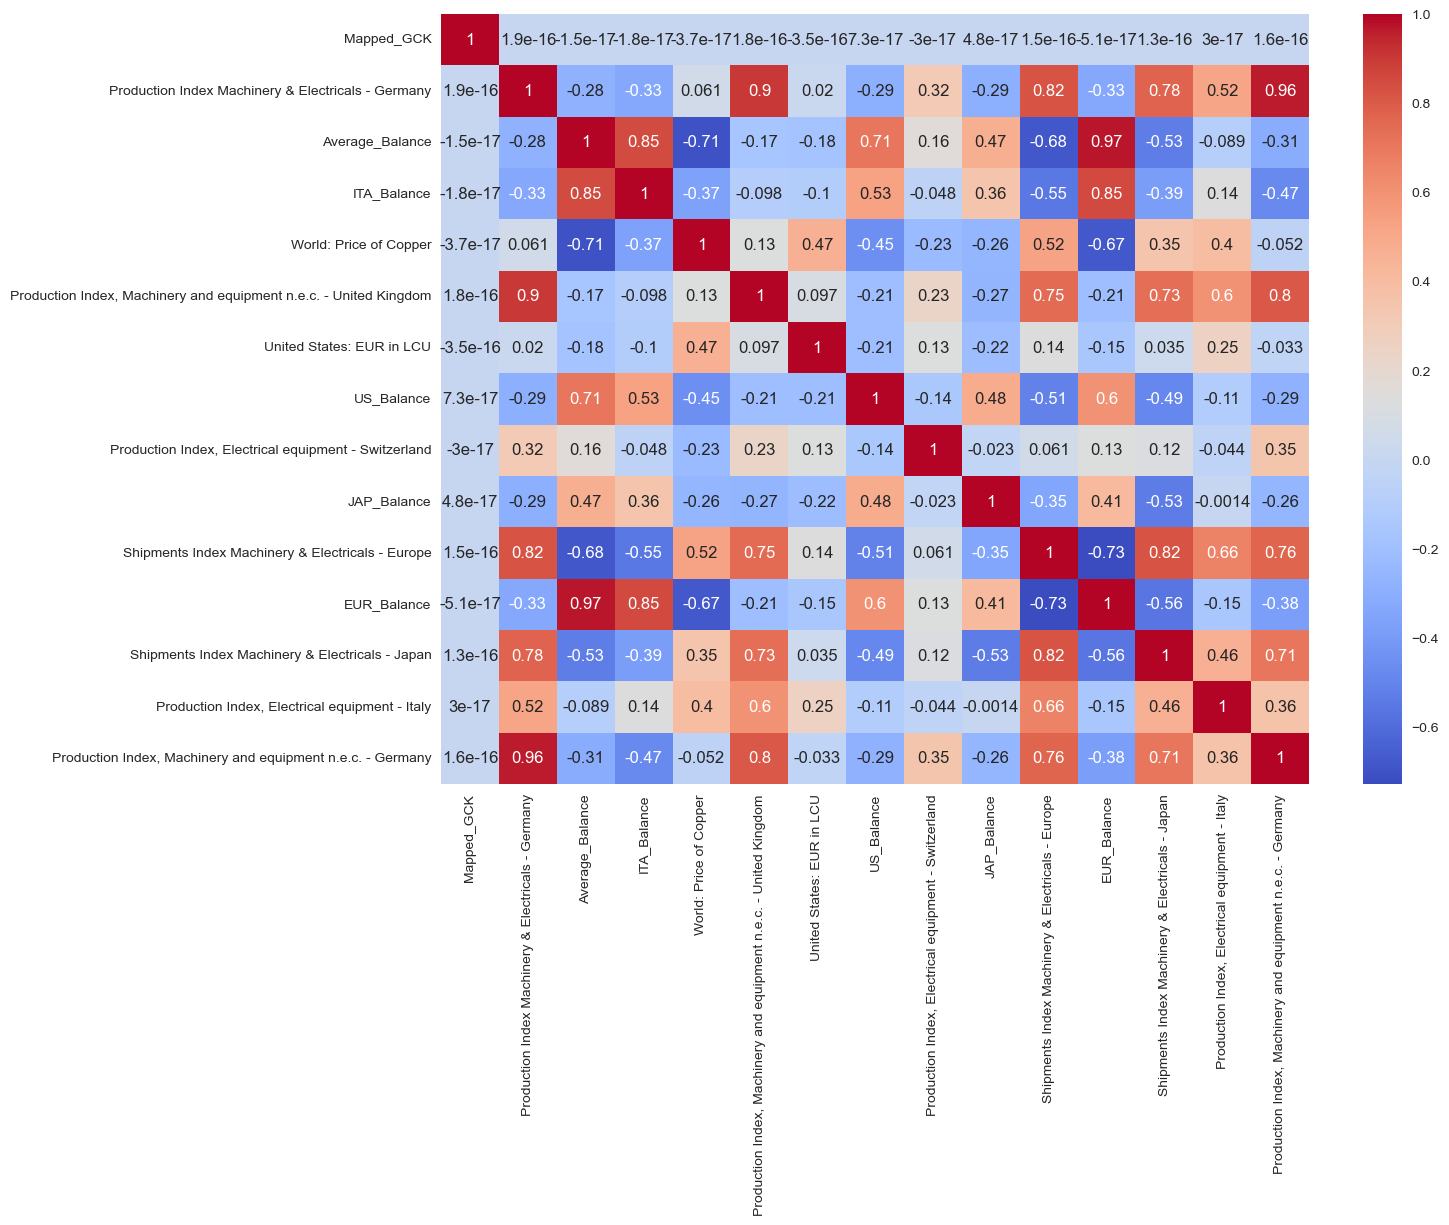

In [129]:
fig, ax = plt.subplots(figsize=(14, 10))  # You can adjust the size as needed
# Your plotting code here
correlation = final_dataset[important_features].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


Our top 5 features according to XGBoost:

Mapped_GCK, Production Index Machinery & Electricals - Ge, Average_Balance, ITA_Balance, World: Price of CopperMapped_GCK, Production Index Machinery & Electricals - Ge, Average_Balance, ITA_Balance, World: Price of Copper

So we should focus on keeping these

### we ll assume a treshold of 0.05 on the XGboost

In [130]:
important_features

['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance',
 'ITA_Balance',
 'World: Price of Copper',
 'Production Index, Machinery and equipment n.e.c. - United Kingdom',
 'United States: EUR in LCU',
 'US_Balance',
 'Production Index, Electrical equipment - Switzerland',
 'JAP_Balance',
 'Shipments Index Machinery & Electricals - Europe',
 'EUR_Balance',
 'Shipments Index Machinery & Electricals - Japan',
 'Production Index, Electrical equipment - Italy',
 'Production Index, Machinery and equipment n.e.c. - Germany']

In [131]:
important_features = ['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance']


In [132]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [133]:
#Random Forests

from sklearn.ensemble import RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = final_dataset.drop(['Sales_EUR', 'DATE'], axis=1)
y = final_dataset['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                              Feature  Importance
0                                          Mapped_GCK        0.96
6   Production Index Machinery & Electricals - Ger...        0.01
15  Shipments Index Machinery & Electricals - Unit...        0.00
40  Production Index, Machinery and equipment n.e....        0.00
56                                         US_Balance        0.00
31    Producer Prices, Electrical equipment - Germany        0.00
52                                        ITA_Balance        0.00
26                          United States: EUR in LCU        0.00
53                                        JAP_Balance        0.00
44  Production Index, Electrical equipment - Unite...        0.00
36  Production Index, Machinery and equipment n.e....        0.00
58                                    Average_Balance        0.00
30     Producer Prices, Electrical equipment - France        0.00
54                                        SWI_Balance        0.00
19   Shipm

### combination of the features selected with the different algorithms

In [134]:
Combination_features_selected = ['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance', 'Production Index Machinery & Electricals - France', 'FRA_Balance']

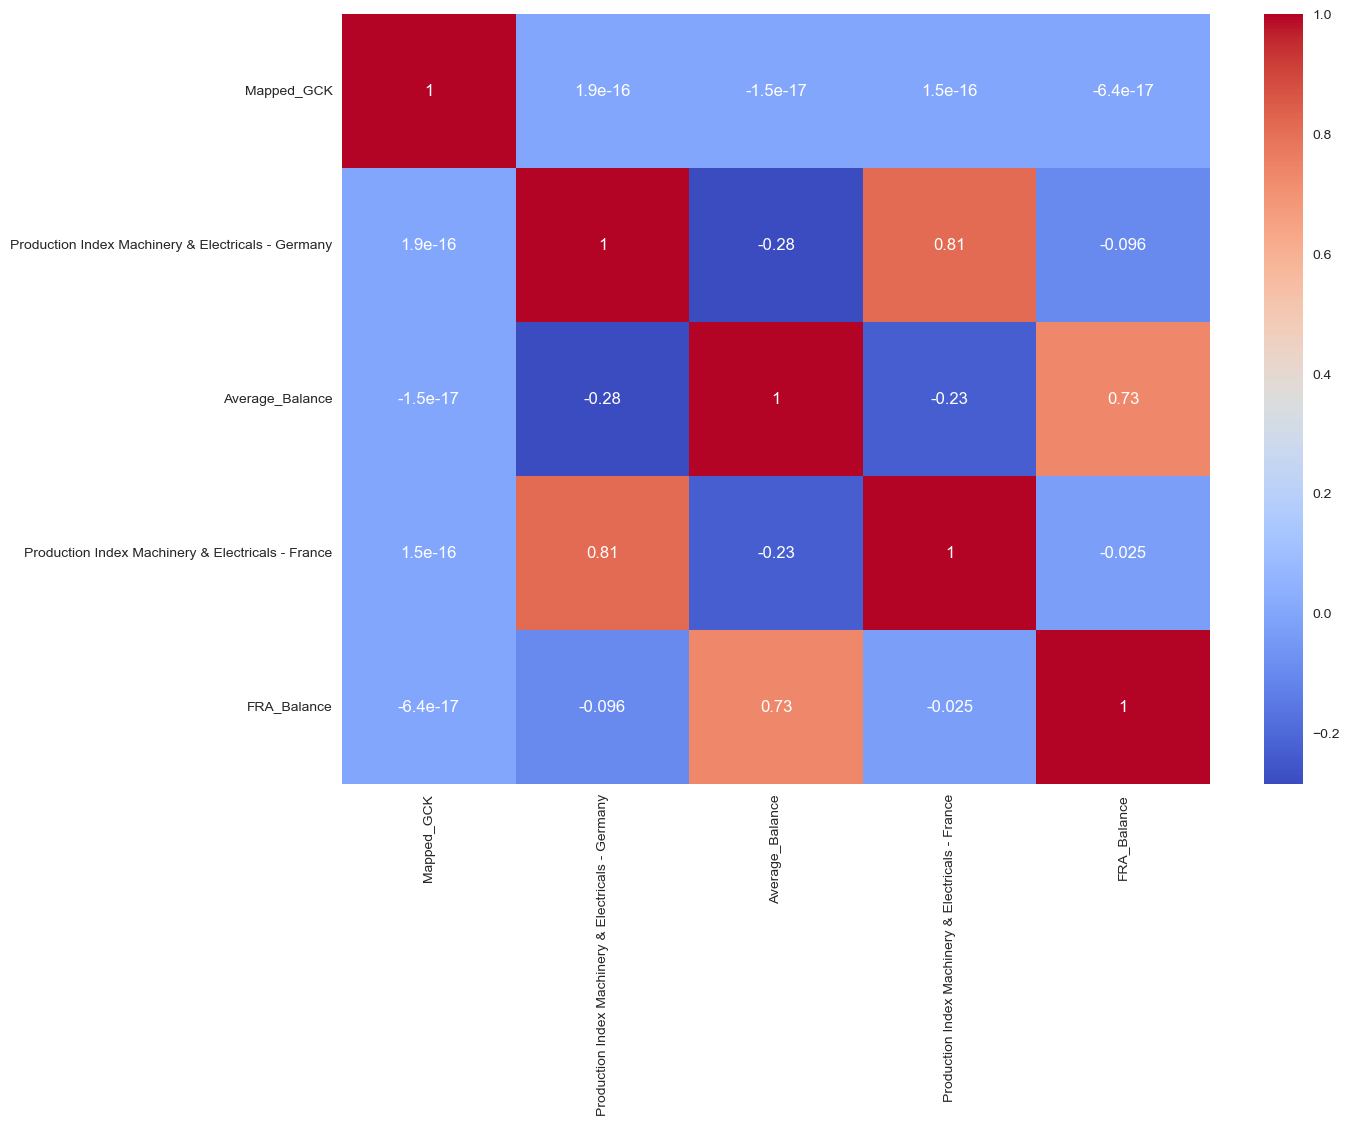

In [135]:
fig, ax = plt.subplots(figsize=(14, 10))  # You can adjust the size as needed
# Your plotting code here
correlation = final_dataset[Combination_features_selected].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [136]:
Combination_features_selected = ['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance']

In [137]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [138]:
# create a new dataframe with selected columns
predictions_df = final_dataset[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index Machinery & Electricals - Germany', 'Average_Balance']]
predictions_df.head()


DATE  Mapped_GCK   Sales_EUR  \
0  2018-10        1.00 36098918.79   
1  2018-10       11.00  1021303.50   
2  2018-10       12.00    28686.33   
3  2018-10       13.00    27666.10   
4  2018-10       14.00     5770.00   

   Production Index Machinery & Electricals - Germany  Average_Balance  
0                                             124.23             -5.34  
1                                             124.23             -5.34  
2                                             124.23             -5.34  
3                                             124.23             -5.34  
4                                             124.23             -5.34

# We can try to make predictions using all the products with predictions_df or by product

# Data sets by product

In [139]:
unique_gcks = final_dataset['Mapped_GCK'].unique()
unique_gcks

array([ 1., 11., 12., 13., 14., 16., 20.,  3., 36.,  4.,  5.,  6.,  8.,
        9.])

In [140]:
GCK1_df = final_dataset[final_dataset['Mapped_GCK'] == 1]


In [141]:
GCK1_df = final_dataset[final_dataset['Mapped_GCK'] == 1]
GCK3_df = final_dataset[final_dataset['Mapped_GCK'] == 3]
GCK4_df = final_dataset[final_dataset['Mapped_GCK'] == 4]
GCK5_df = final_dataset[final_dataset['Mapped_GCK'] == 5]
GCK6_df = final_dataset[final_dataset['Mapped_GCK'] == 6]
GCK8_df = final_dataset[final_dataset['Mapped_GCK'] == 8]
GCK9_df = final_dataset[final_dataset['Mapped_GCK'] == 9]
GCK11_df = final_dataset[final_dataset['Mapped_GCK'] == 11]
GCK12_df = final_dataset[final_dataset['Mapped_GCK'] == 12]
GCK13_df = final_dataset[final_dataset['Mapped_GCK'] == 13]
GCK14_df = final_dataset[final_dataset['Mapped_GCK'] == 14]
GCK16_df = final_dataset[final_dataset['Mapped_GCK'] == 16]
GCK20_df = final_dataset[final_dataset['Mapped_GCK'] == 20]
GCK36_df = final_dataset[final_dataset['Mapped_GCK'] == 36]


# GCK 1

In [142]:
GCK1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 588
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

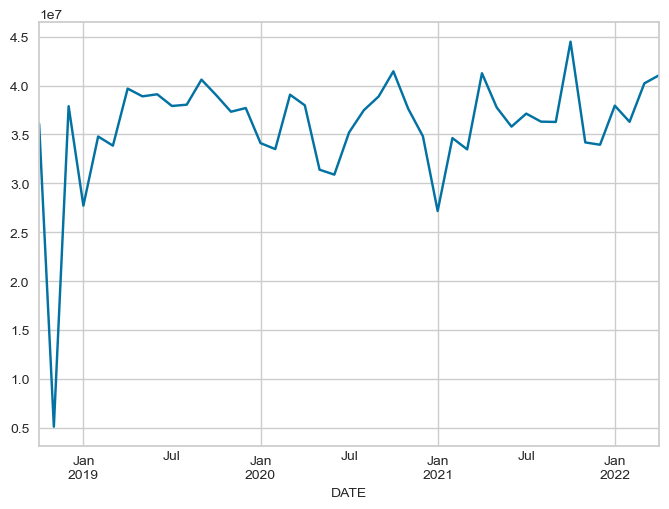

In [143]:
GCK1_df.groupby('DATE')['Sales_EUR'].sum().plot()

# Deal with the outliers, without messing with possible nans

In [144]:
GCK1_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

# Deal with nans if any

# Feature Selection

In [145]:
#Correlation Matrix
correlation = GCK1_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.25]['Sales_EUR']
print(correlation)

corr_feat_GCK1 = correlation.index.tolist()

corr_feat_GCK1

Sales_EUR      1.00
SWI_Balance   -0.30
US_Balance    -0.30
Name: Sales_EUR, dtype: float64


['Sales_EUR', 'SWI_Balance', 'US_Balance']

In [146]:
from sklearn.tree import DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK1 = importance_df['Feature'].tolist()
dt_feat_GCK1

                                              Feature  Importance
5   Production Index Machinery & Electricals - Ger...        0.67
51                                        ITA_Balance        0.13
22                  World: Price of Natural gas index        0.06
1    Production Index Machinery & Electricals - China        0.04
24                             World: Price of Copper        0.03
46    Production Index, Electrical equipment - France        0.02
38  Production Index, Machinery and equipment n.e....        0.01
26  Producer Prices, Electrical equipment - United...        0.01
44     Production Index, Electrical equipment - Italy        0.01
6   Shipments Index Machinery & Electricals - Germany        0.01
16  Shipments Index Machinery & Electricals - Unit...        0.00
10    Shipments Index Machinery & Electricals - Japan        0.00
37  Production Index, Machinery and equipment n.e....        0.00
40  Production Index, Electrical equipment - Unite...        0.00
55        

['Production Index Machinery & Electricals - Germany', 'ITA_Balance']

In [147]:
from sklearn.ensemble import RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK1 = importance_df['Feature'].tolist()
rf_feat_GCK1

                                              Feature  Importance
5   Production Index Machinery & Electricals - Ger...        0.26
51                                        ITA_Balance        0.10
14  Shipments Index Machinery & Electricals - Unit...        0.06
30    Producer Prices, Electrical equipment - Germany        0.06
39  Production Index, Machinery and equipment n.e....        0.04
43  Production Index, Electrical equipment - Unite...        0.03
35  Production Index, Machinery and equipment n.e....        0.03
25                          United States: EUR in LCU        0.03
55                                         US_Balance        0.02
41    Production Index, Electrical equipment - zWorld        0.02
0                                               Month        0.02
42  Production Index, Electrical equipment - Switz...        0.02
12  Shipments Index Machinery & Electricals - Swit...        0.02
29     Producer Prices, Electrical equipment - France        0.02
22        

['Production Index Machinery & Electricals - Germany']

In [148]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Drop the 'Date' column
X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK1 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK1))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [36 31 32  1  1 48 53 26 55  2 14  9 10 38 46 25 29  6  5 30 43 33 40 44
 37 17 34 47 18 19 20 41 51 24 11 52 49  3 15 45 50 23 12 39 27  4 16 54
 56  1 42 35 13  8 22 28  7 21]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [149]:
#XGBoost
from xgboost import XGBRegressor

X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK1 = importance_df['Feature'].tolist()
xgb_feat_GCK1

                                              Feature  Importance
5   Production Index Machinery & Electricals - Ger...        0.28
51                                        ITA_Balance        0.21
27  Producer Prices, Electrical equipment - United...        0.12
21                 World: Price of Metals  & Minerals        0.08
18   Shipments Index Machinery & Electricals - Europe        0.07
39  Production Index, Machinery and equipment n.e....        0.05
1    Production Index Machinery & Electricals - China        0.03
20                             World: Price of Energy        0.03
43  Production Index, Electrical equipment - Unite...        0.02
4    Shipments Index Machinery & Electricals - France        0.02
35  Production Index, Machinery and equipment n.e....        0.02
3   Production Index Machinery & Electricals - France        0.01
46    Production Index, Electrical equipment - France        0.01
8     Shipments Index Machinery & Electricals - Italy        0.01
23        

['Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Producer Prices, Electrical equipment - United Kingdom']

In [150]:
#Combinantion of the features selected
final_feat_GCK1 = dt_feat_GCK1
final_feat_GCK1.extend(rf_feat_GCK1)
final_feat_GCK1.extend(corr_feat_GCK1)
final_feat_GCK1.extend(rfe_feat_GCK1)
final_feat_GCK1.extend(xgb_feat_GCK1)

final_feat_GCK1

['Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Production Index Machinery & Electricals - Germany',
 'Sales_EUR',
 'SWI_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Producer Prices, Electrical equipment - United Kingdom']

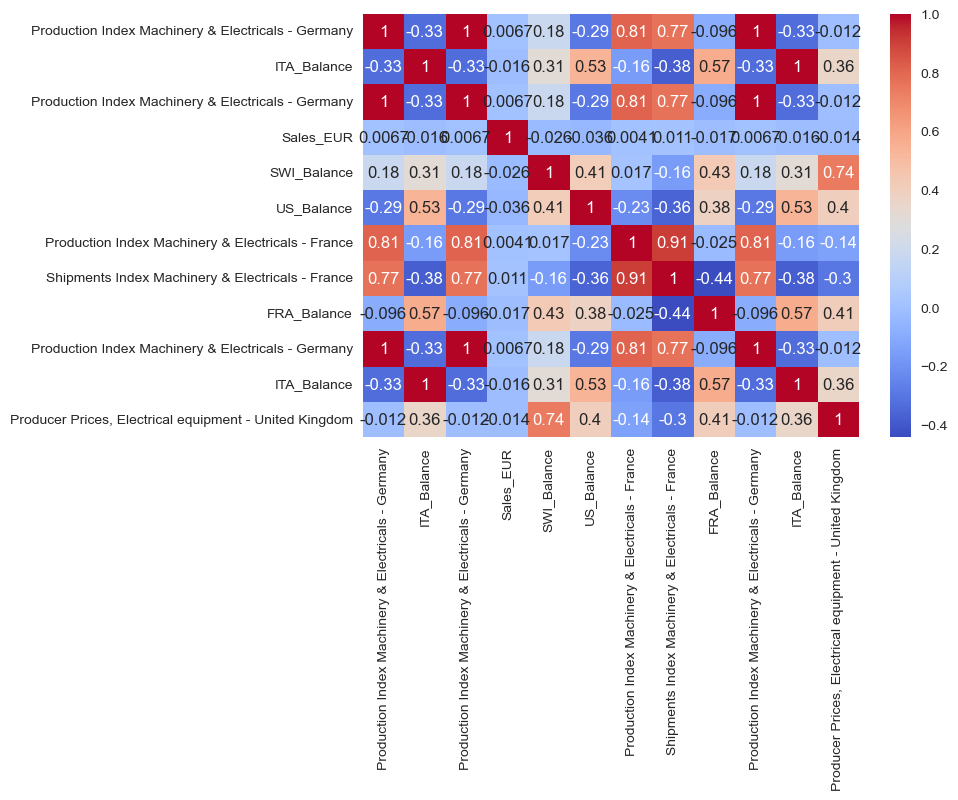

In [151]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK1].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [152]:
final_feat_GCK1.remove('Sales_EUR')
final_feat_GCK1.remove('Production Index Machinery & Electricals - Germany')
final_feat_GCK1.remove('Production Index Machinery & Electricals - Germany')
final_feat_GCK1.remove('Production Index Machinery & Electricals - France')
final_feat_GCK1.remove('SWI_Balance')
final_feat_GCK1.remove('ITA_Balance')


In [153]:
final_feat_GCK1

['US_Balance',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Producer Prices, Electrical equipment - United Kingdom']

In [154]:
# create a new dataframe with selected columns
pred_GCK1 = GCK1_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'US_Balance', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'Production Index Machinery & Electricals - Germany', 'ITA_Balance', 'Producer Prices, Electrical equipment - United Kingdom']]
pred_GCK1.head()

DATE  Mapped_GCK   Sales_EUR  US_Balance  \
0   2018-10        1.00 36098918.79      -15.91   
14  2018-11        1.00  5140760.00       -6.80   
28  2018-12        1.00 37889612.12      -17.02   
42  2019-01        1.00 27728148.35       -3.53   
56  2019-02        1.00 34793163.53       -6.92   

    Shipments Index Machinery & Electricals - France  FRA_Balance  \
0                                             122.45       -14.17   
14                                            115.96       -16.32   
28                                            115.13       -20.44   
42                                            108.33       -18.18   
56                                            108.94       -16.39   

    Production Index Machinery & Electricals - Germany  ITA_Balance  \
0                                              124.23         -4.11   
14                                             127.40        -12.41   
28                                             120.52        -43.15   
42                                             104.78          6.86   
56                                             109.60          1.37   

    Producer Prices, Electrical equipment - United Kingdom  
0                                              111.46       
14                                             111.67       
28                                             112.79       
42                                             112.08       
56                                             111.36

In [155]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [156]:
# pred_GCK1 -> train/test
train_size = int(0.8 * len(pred_GCK1))
train, test = pred_GCK1[:train_size], pred_GCK1[train_size:]

In [157]:
# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
# ARIMA parameters (p, d, q)
# p - number of lag observations included in the model
# d - number of times differencing is performed to achieve stationarity
# q - number of lagged forecast errors in the prediction equation
order = (4, 1, 2) 
model_arima_GCK1 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK1 = model_arima_GCK1.fit()

In [158]:
predictions_arima_GCK1 = model_fit_arima_GCK1.forecast(steps=len(test))
predictions_arima_GCK1

34   36464422.54
35   38578216.32
36   38184943.63
37   37769132.72
38   36588283.18
39   36839158.30
40   37553238.90
41   38258098.76
42   37927588.94
Name: predicted_mean, dtype: float64

In [159]:
from sklearn.metrics import mean_squared_error

rmse_arima_GCK1 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK1))
print('Test RMSE: %.3f' % rmse_arima_GCK1)

Test RMSE: 3003547.476


In [160]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [161]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK1 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK1 = mean_squared_error(y_test, predictions_xgb_GCK1, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK1)

Test RMSE: 3816608.908


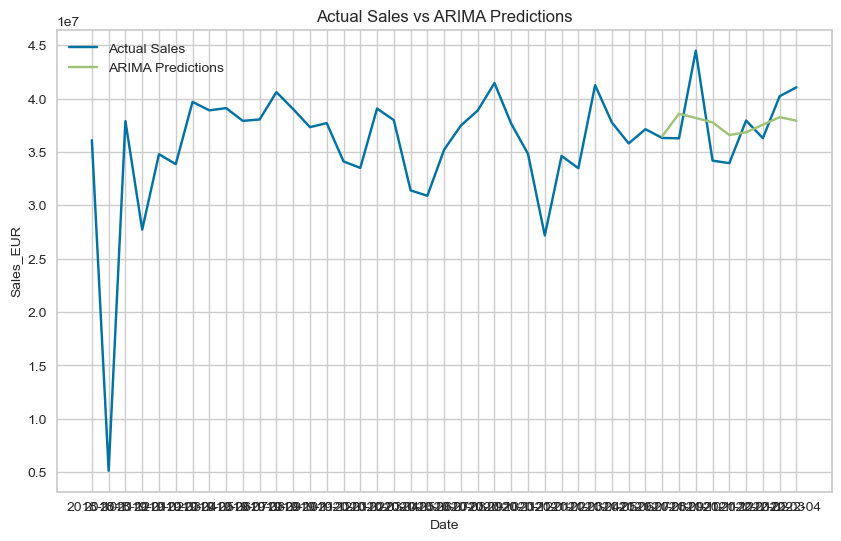

In [162]:
# GCK1

# Group your data and calculate sum of sales
sales_data = GCK1_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK1.index, predictions_arima_GCK1.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 3

In [163]:
GCK3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 7 to 595
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

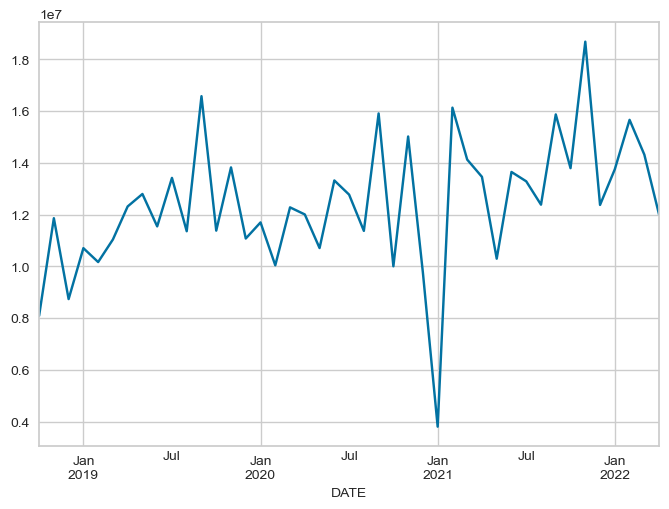

In [164]:
GCK3_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [165]:
GCK3_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [166]:
#Correlation Matrix
correlation = GCK3_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.4]['Sales_EUR']
print(correlation)

corr_feat_GCK3 = correlation.index.tolist()

corr_feat_GCK3

Sales_EUR                                                  1.00
Production Index, Electrical equipment - zWorld            0.49
Production Index, Electrical equipment - United Kingdom    0.45
GER_Balance                                               -0.46
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index, Electrical equipment - zWorld',
 'Production Index, Electrical equipment - United Kingdom',
 'GER_Balance']

In [167]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK3_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK3_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK3 = importance_df['Feature'].tolist()
dt_feat_GCK3

                                              Feature  Importance
51                                        ITA_Balance        0.29
47   Production Index, Electrical equipment - Germany        0.16
21                 World: Price of Metals  & Minerals        0.13
50                                        GER_Balance        0.11
55                                         US_Balance        0.09
46    Production Index, Electrical equipment - France        0.07
35  Production Index, Machinery and equipment n.e....        0.04
25                          United States: EUR in LCU        0.02
7    Production Index Machinery & Electricals - Italy        0.02
8     Shipments Index Machinery & Electricals - Italy        0.02
52                                        JAP_Balance        0.01
16  Shipments Index Machinery & Electricals - Unit...        0.01
44     Production Index, Electrical equipment - Italy        0.01
5   Production Index Machinery & Electricals - Ger...        0.01
40  Produc

['ITA_Balance',
 'Production Index, Electrical equipment - Germany',
 'World: Price of Metals  & Minerals',
 'GER_Balance']

In [168]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK3_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK3_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK3 = importance_df['Feature'].tolist()
rf_feat_GCK3

                                              Feature  Importance
43  Production Index, Electrical equipment - Unite...        0.15
25                          United States: EUR in LCU        0.10
41    Production Index, Electrical equipment - zWorld        0.08
53                                        SWI_Balance        0.07
22                  World: Price of Natural gas index        0.04
50                                        GER_Balance        0.04
51                                        ITA_Balance        0.03
44     Production Index, Electrical equipment - Italy        0.03
0                                               Month        0.03
47   Production Index, Electrical equipment - Germany        0.03
30    Producer Prices, Electrical equipment - Germany        0.03
46    Production Index, Electrical equipment - France        0.02
21                 World: Price of Metals  & Minerals        0.02
42  Production Index, Electrical equipment - Switz...        0.02
56        

['Production Index, Electrical equipment - United Kingdom',
 'United States: EUR in LCU']

In [169]:
#RFE

# Drop the 'Date' column
X = GCK3_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK3_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK3 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK3))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [55 39 40  1  1 50 51 14 52  3 11 17 16  5 41 19 34  8  9 29 38 30 49 35
 36 24 28 42 43 26 25 32 20 33 54  6 13  2 22 53 21 47 31  7 15  4 23 37
 56  1 45 46 12 18 44 48 10 27]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [170]:
#XGBoost

X = GCK3_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK3_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK3 = importance_df['Feature'].tolist()
xgb_feat_GCK3

                                              Feature  Importance
51                                        ITA_Balance        0.19
47   Production Index, Electrical equipment - Germany        0.14
35  Production Index, Machinery and equipment n.e....        0.08
50                                        GER_Balance        0.08
43  Production Index, Electrical equipment - Unite...        0.07
42  Production Index, Electrical equipment - Switz...        0.06
19                        World: Price of Base Metals        0.05
46    Production Index, Electrical equipment - France        0.04
56                                        EUR_Balance        0.04
22                  World: Price of Natural gas index        0.04
14  Shipments Index Machinery & Electricals - Unit...        0.03
38  Production Index, Machinery and equipment n.e....        0.03
41    Production Index, Electrical equipment - zWorld        0.03
21                 World: Price of Metals  & Minerals        0.02
45     Pro

['ITA_Balance', 'Production Index, Electrical equipment - Germany']

In [171]:
#Combinantion of the features selected
final_feat_GCK3 = dt_feat_GCK3
final_feat_GCK3.extend(rf_feat_GCK3)
final_feat_GCK3.extend(corr_feat_GCK3)
final_feat_GCK3.extend(rfe_feat_GCK3)
final_feat_GCK3.extend(xgb_feat_GCK3)

final_feat_GCK3

['ITA_Balance',
 'Production Index, Electrical equipment - Germany',
 'World: Price of Metals  & Minerals',
 'GER_Balance',
 'Production Index, Electrical equipment - United Kingdom',
 'United States: EUR in LCU',
 'Sales_EUR',
 'Production Index, Electrical equipment - zWorld',
 'Production Index, Electrical equipment - United Kingdom',
 'GER_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'ITA_Balance',
 'Production Index, Electrical equipment - Germany']

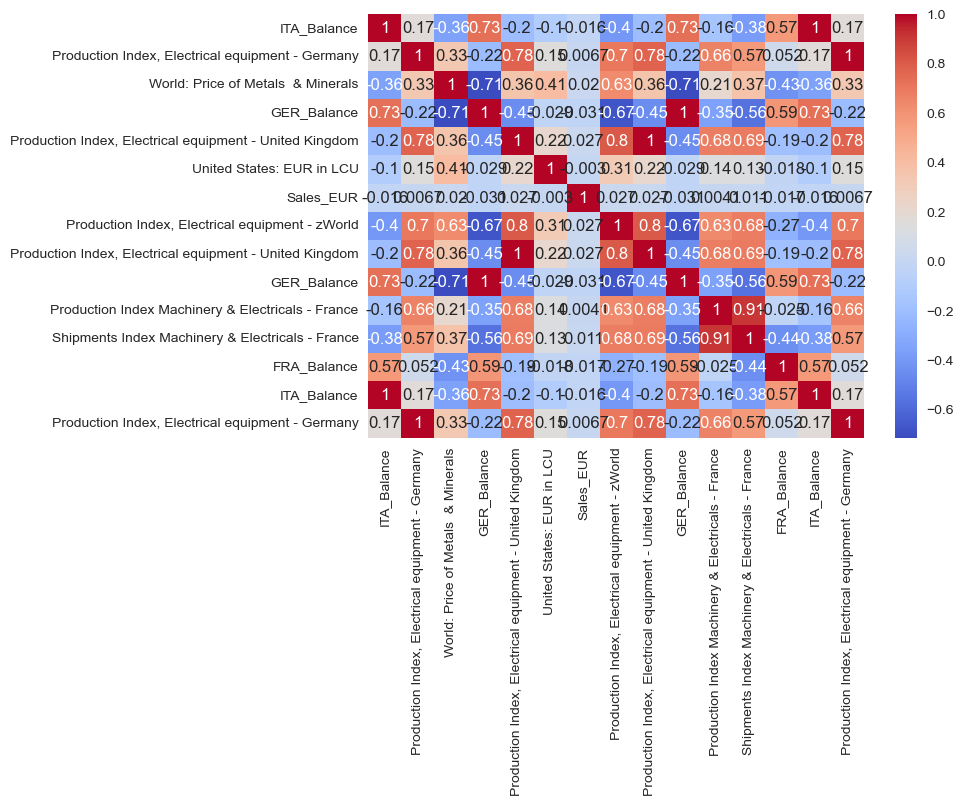

In [172]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK3].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [173]:
final_feat_GCK3.remove('Sales_EUR')
final_feat_GCK3.remove('ITA_Balance')
final_feat_GCK3.remove('GER_Balance')
final_feat_GCK3.remove('Production Index, Electrical equipment - United Kingdom')
final_feat_GCK3.remove('Production Index, Electrical equipment - United Kingdom')
final_feat_GCK3.remove('Production Index, Electrical equipment - Germany')
final_feat_GCK3.remove('Production Index Machinery & Electricals - France')
final_feat_GCK3.remove('United States: EUR in LCU')
final_feat_GCK3

['World: Price of Metals  & Minerals',
 'Production Index, Electrical equipment - zWorld',
 'GER_Balance',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'ITA_Balance',
 'Production Index, Electrical equipment - Germany']

In [174]:
# create a new dataframe with selected columns
pred_GCK3 = GCK3_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index, Electrical equipment - zWorld', 'GER_Balance', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'ITA_Balance', 'Production Index, Electrical equipment - Germany']]
pred_GCK3.head()

DATE  Mapped_GCK   Sales_EUR  \
7   2018-10        3.00  8089465.96   
21  2018-11        3.00 11863001.51   
35  2018-12        3.00  8736859.39   
49  2019-01        3.00 10705300.63   
63  2019-02        3.00 10167796.86   

    Production Index, Electrical equipment - zWorld  GER_Balance  \
7                                            129.33       -13.51   
21                                           128.24       -15.33   
35                                           117.04       -20.89   
49                                           111.52       -13.93   
63                                           112.67       -13.09   

    Shipments Index Machinery & Electricals - France  FRA_Balance  \
7                                             122.45       -14.17   
21                                            115.96       -16.32   
35                                            115.13       -20.44   
49                                            108.33       -18.18   
63                                            108.94       -16.39   

    ITA_Balance  Production Index, Electrical equipment - Germany  
7         -4.11                                            118.30  
21       -12.41                                            117.16  
35       -43.15                                             89.63  
49         6.86                                            105.41  
63         1.37                                            103.65

In [175]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK3))
train, test = pred_GCK3[:train_size], pred_GCK3[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (4, 2, 1)  # ARIMA parameters (p, d, q)
model_arima_GCK3 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK3 = model_arima_GCK3.fit()

predictions_arima_GCK3 = model_fit_arima_GCK3.forecast(steps=len(test))
predictions_arima_GCK3

rmse_arima_GCK3 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK3))
print('Test RMSE: %.3f' % rmse_arima_GCK3)

Test RMSE: 2159330.431


In [176]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [177]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK3 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK3 = mean_squared_error(y_test, predictions_xgb_GCK3, squared=False) 
print('Test RMSE: %.3f' % rmse_xgb_GCK3)

Test RMSE: 2728683.974


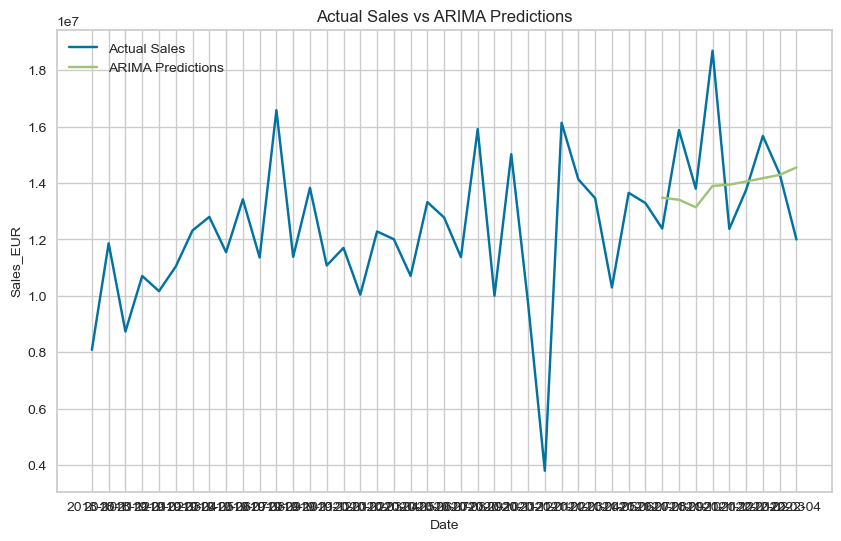

In [178]:
# GCK3

# Group your data and calculate sum of sales
sales_data = GCK3_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK3.index, predictions_arima_GCK3.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 4

In [179]:
GCK4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 9 to 597
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

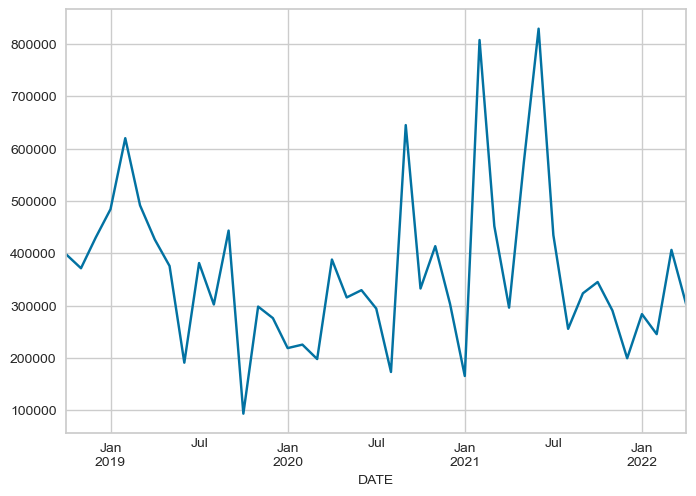

In [180]:
GCK4_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [181]:
GCK4_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [182]:
#Correlation Matrix
correlation = GCK4_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.3]['Sales_EUR']
print(correlation)

corr_feat_GCK4 = correlation.index.tolist()

corr_feat_GCK4

Sales_EUR                                          1.00
Production Index Machinery & Electricals - Italy   0.30
United States: EUR in LCU                          0.36
Production Index, Electrical equipment - Italy     0.34
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index Machinery & Electricals - Italy',
 'United States: EUR in LCU',
 'Production Index, Electrical equipment - Italy']

In [183]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK4_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK4_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK4 = importance_df['Feature'].tolist()
dt_feat_GCK4

                                              Feature  Importance
25                          United States: EUR in LCU        0.34
44     Production Index, Electrical equipment - Italy        0.19
8     Shipments Index Machinery & Electricals - Italy        0.15
19                        World: Price of Base Metals        0.09
38  Production Index, Machinery and equipment n.e....        0.04
26  Producer Prices, Electrical equipment - United...        0.04
40  Production Index, Electrical equipment - Unite...        0.04
43  Production Index, Electrical equipment - Unite...        0.03
52                                        JAP_Balance        0.02
17  Production Index Machinery & Electricals - Europe        0.01
0                                               Month        0.01
34  Production Index, Machinery and equipment n.e....        0.01
18   Shipments Index Machinery & Electricals - Europe        0.01
7    Production Index Machinery & Electricals - Italy        0.01
21        

['United States: EUR in LCU',
 'Production Index, Electrical equipment - Italy',
 'Shipments Index Machinery & Electricals - Italy']

In [184]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK4_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK4_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK4 = importance_df['Feature'].tolist()
rf_feat_GCK4

                                              Feature  Importance
25                          United States: EUR in LCU        0.16
44     Production Index, Electrical equipment - Italy        0.06
49                                        FRA_Balance        0.06
38  Production Index, Machinery and equipment n.e....        0.06
30    Producer Prices, Electrical equipment - Germany        0.05
43  Production Index, Electrical equipment - Unite...        0.04
47   Production Index, Electrical equipment - Germany        0.04
52                                        JAP_Balance        0.03
19                        World: Price of Base Metals        0.03
40  Production Index, Electrical equipment - Unite...        0.02
8     Shipments Index Machinery & Electricals - Italy        0.02
13  Production Index Machinery & Electricals - Uni...        0.02
12  Shipments Index Machinery & Electricals - Swit...        0.02
0                                               Month        0.02
11  Produc

['United States: EUR in LCU']

In [185]:
#RFE

# Drop the 'Date' column
X = GCK4_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK4_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK4 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK4))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [37 52 42  1  1 51 44 18 54  2 17 11 12  5 45 21 36 10  9 30 43 32 48 41
 34 50 28 47 27 25 24 33 22 29 14  6 19  3 55 53 23 38 15  7 20  4 46 49
 56  1 31 39 16 13 40 35  8 26]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [186]:
#XGBoost

X = GCK4_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK4_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK4 = importance_df['Feature'].tolist()
xgb_feat_GCK4

                                              Feature  Importance
44     Production Index, Electrical equipment - Italy        0.21
30    Producer Prices, Electrical equipment - Germany        0.11
6   Shipments Index Machinery & Electricals - Germany        0.10
8     Shipments Index Machinery & Electricals - Italy        0.09
29     Producer Prices, Electrical equipment - France        0.08
57                                    Average_Balance        0.06
38  Production Index, Machinery and equipment n.e....        0.06
32  Production Index, Machinery and equipment n.e....        0.06
49                                        FRA_Balance        0.05
25                          United States: EUR in LCU        0.04
11  Production Index Machinery & Electricals - Swi...        0.03
22                  World: Price of Natural gas index        0.01
19                        World: Price of Base Metals        0.01
35  Production Index, Machinery and equipment n.e....        0.01
14  Shipme

['Production Index, Electrical equipment - Italy',
 'Producer Prices, Electrical equipment - Germany']

In [187]:
#Combinantion of the features selected
final_feat_GCK4 = dt_feat_GCK4
final_feat_GCK4.extend(rf_feat_GCK4)
final_feat_GCK4.extend(corr_feat_GCK4)
final_feat_GCK4.extend(rfe_feat_GCK4)
final_feat_GCK4.extend(xgb_feat_GCK4)

final_feat_GCK4

['United States: EUR in LCU',
 'Production Index, Electrical equipment - Italy',
 'Shipments Index Machinery & Electricals - Italy',
 'United States: EUR in LCU',
 'Sales_EUR',
 'Production Index Machinery & Electricals - Italy',
 'United States: EUR in LCU',
 'Production Index, Electrical equipment - Italy',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index, Electrical equipment - Italy',
 'Producer Prices, Electrical equipment - Germany']

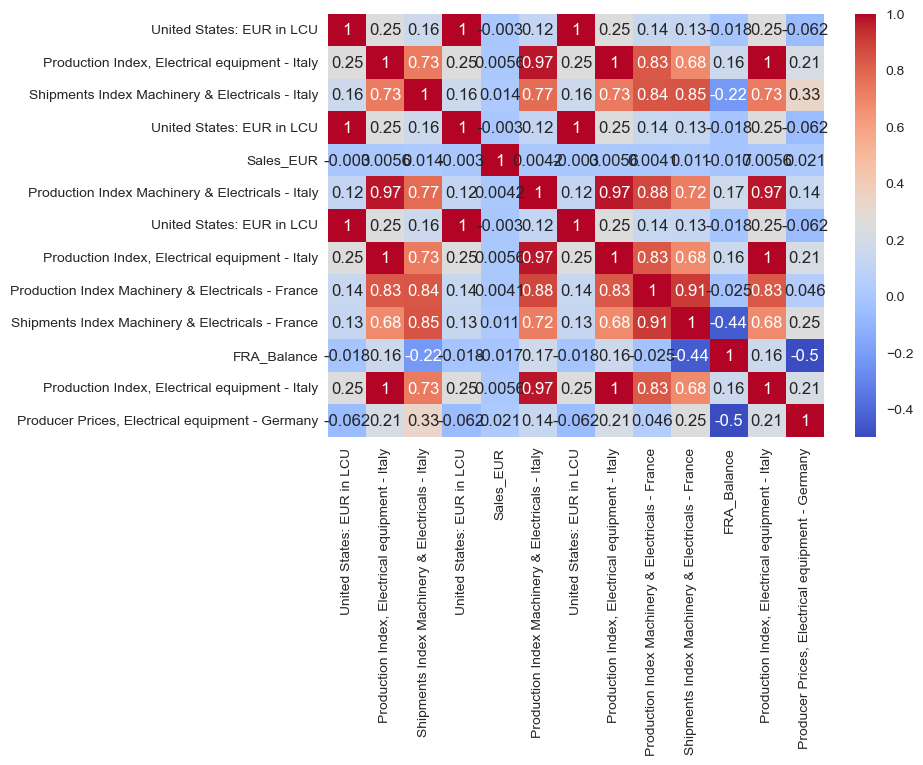

In [188]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK4].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [189]:
final_feat_GCK4.remove('Sales_EUR')
final_feat_GCK4.remove('United States: EUR in LCU')
final_feat_GCK4.remove('United States: EUR in LCU')
final_feat_GCK4.remove('Production Index, Electrical equipment - Italy')
final_feat_GCK4.remove('Production Index, Electrical equipment - Italy')
final_feat_GCK4.remove('Shipments Index Machinery & Electricals - Italy')
final_feat_GCK4.remove('Production Index Machinery & Electricals - France')
final_feat_GCK4

['Production Index Machinery & Electricals - Italy',
 'United States: EUR in LCU',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index, Electrical equipment - Italy',
 'Producer Prices, Electrical equipment - Germany']

In [190]:
# create a new dataframe with selected columns
pred_GCK4 = GCK4_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index Machinery & Electricals - Italy', 'United States: EUR in LCU', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'Production Index, Electrical equipment - Italy', 'Producer Prices, Electrical equipment - Germany']]
pred_GCK4.head()

DATE  Mapped_GCK  Sales_EUR  \
9   2018-10        4.00  397760.69   
23  2018-11        4.00  371322.42   
37  2018-12        4.00  430100.96   
51  2019-01        4.00  484173.88   
65  2019-02        4.00  620031.80   

    Production Index Machinery & Electricals - Italy  \
9                                             118.35   
23                                            107.72   
37                                             88.78   
51                                             99.28   
65                                            104.59   

    United States: EUR in LCU  \
9                        1.15   
23                       1.14   
37                       1.14   
51                       1.14   
65                       1.14   

    Shipments Index Machinery & Electricals - France  FRA_Balance  \
9                                             122.45       -14.17   
23                                            115.96       -16.32   
37                                            115.13       -20.44   
51                                            108.33       -18.18   
65                                            108.94       -16.39   

    Production Index, Electrical equipment - Italy  \
9                                            93.00   
23                                           84.13   
37                                           64.88   
51                                           81.56   
65                                           83.45   

    Producer Prices, Electrical equipment - Germany  
9                                            109.12  
23                                           109.22  
37                                           109.33  
51                                           109.75  
65                                           109.86

In [191]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK4))
train, test = pred_GCK4[:train_size], pred_GCK4[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (0, 0, 1)  # ARIMA parameters (p, d, q)
model_arima_GCK4 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK4 = model_arima_GCK4.fit()

predictions_arima_GCK4 = model_fit_arima_GCK4.forecast(steps=len(test))
predictions_arima_GCK4

rmse_arima_GCK4 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK4))
print('Test RMSE: %.3f' % rmse_arima_GCK4)

Test RMSE: 103975.450


In [192]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [193]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK4 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK4 = mean_squared_error(y_test, predictions_xgb_GCK4, squared=False) 
print('Test RMSE: %.3f' % rmse_xgb_GCK4)

Test RMSE: 169644.029


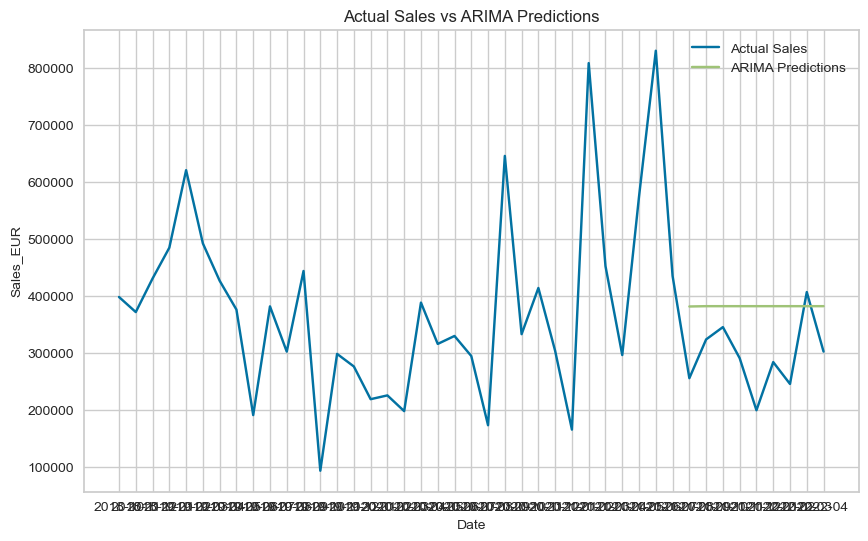

In [194]:
# GCK4

# Group your data and calculate sum of sales
sales_data = GCK4_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK4.index, predictions_arima_GCK4.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 5

In [195]:
GCK5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 10 to 598
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipment

<Axes: xlabel='DATE'>

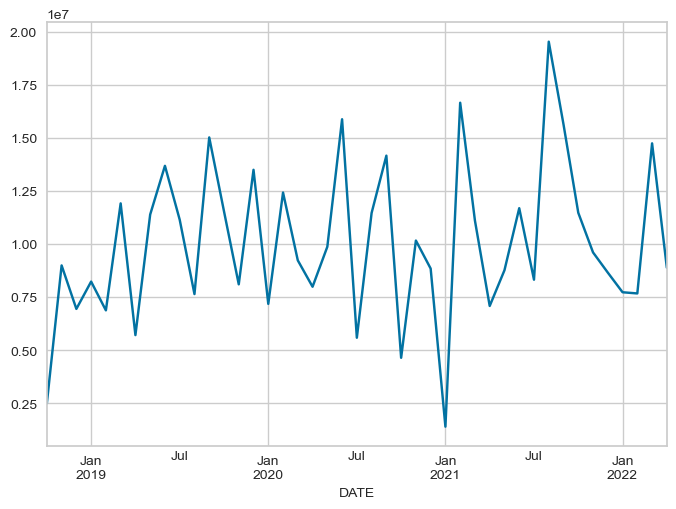

In [196]:
GCK5_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [197]:
GCK5_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [198]:
#Correlation Matrix
correlation = GCK5_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.4]['Sales_EUR']
print(correlation)

corr_feat_GCK5 = correlation.index.tolist()

corr_feat_GCK5

Sales_EUR      1.00
JAP_Balance   -0.43
US_Balance    -0.44
Name: Sales_EUR, dtype: float64


['Sales_EUR', 'JAP_Balance', 'US_Balance']

In [199]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK5_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK5_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK5 = importance_df['Feature'].tolist()
dt_feat_GCK5

                                              Feature  Importance
57                                    Average_Balance        0.25
40  Production Index, Electrical equipment - Unite...        0.22
24                             World: Price of Copper        0.16
46    Production Index, Electrical equipment - France        0.10
33  Production Index, Machinery and equipment n.e....        0.09
54                                         UK_Balance        0.03
25                          United States: EUR in LCU        0.03
16  Shipments Index Machinery & Electricals - Unit...        0.03
51                                        ITA_Balance        0.02
37  Production Index, Machinery and equipment n.e....        0.02
38  Production Index, Machinery and equipment n.e....        0.01
29     Producer Prices, Electrical equipment - France        0.01
30    Producer Prices, Electrical equipment - Germany        0.01
2     Shipments Index Machinery & Electricals - China        0.01
31      Pr

['Average_Balance',
 'Production Index, Electrical equipment - United States',
 'World: Price of Copper',
 'Production Index, Electrical equipment - France']

In [200]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK5_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK5_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK5 = importance_df['Feature'].tolist()
rf_feat_GCK5

                                              Feature  Importance
52                                        JAP_Balance        0.11
55                                         US_Balance        0.08
57                                    Average_Balance        0.06
49                                        FRA_Balance        0.06
43  Production Index, Electrical equipment - Unite...        0.06
25                          United States: EUR in LCU        0.05
46    Production Index, Electrical equipment - France        0.04
51                                        ITA_Balance        0.03
50                                        GER_Balance        0.03
4    Shipments Index Machinery & Electricals - France        0.03
42  Production Index, Electrical equipment - Switz...        0.03
22                  World: Price of Natural gas index        0.02
40  Production Index, Electrical equipment - Unite...        0.02
24                             World: Price of Copper        0.02
38  Produc

['JAP_Balance']

In [201]:
#RFE

# Drop the 'Date' column
X = GCK5_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK5_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK5 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK5))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [51 54 53  1  1  9  8  5  6  3 17 23 20 11 48 26 45 14 16 55 40 52 50 42
 47 33 35 49 38 36 34 37 27 39 21 12 24  2 31 29 28 43 22 13 25  4 32 30
 56  1 10  7 18 19 41 44 15 46]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [202]:
#XGBoost

X = GCK5_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK5_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK5 = importance_df['Feature'].tolist()
xgb_feat_GCK5

                                              Feature  Importance
57                                    Average_Balance        0.55
33  Production Index, Machinery and equipment n.e....        0.11
40  Production Index, Electrical equipment - Unite...        0.09
24                             World: Price of Copper        0.04
46    Production Index, Electrical equipment - France        0.04
19                        World: Price of Base Metals        0.03
50                                        GER_Balance        0.03
55                                         US_Balance        0.02
10    Shipments Index Machinery & Electricals - Japan        0.01
14  Shipments Index Machinery & Electricals - Unit...        0.01
39  Production Index, Machinery and equipment n.e....        0.01
6   Shipments Index Machinery & Electricals - Germany        0.01
3   Production Index Machinery & Electricals - France        0.01
42  Production Index, Electrical equipment - Switz...        0.01
8     Ship

['Average_Balance',
 'Production Index, Machinery and equipment n.e.c. - zWorld']

In [203]:
#Combinantion of the features selected
final_feat_GCK5 = dt_feat_GCK5
final_feat_GCK5.extend(rf_feat_GCK5)
final_feat_GCK5.extend(corr_feat_GCK5)
final_feat_GCK5.extend(rfe_feat_GCK5)
final_feat_GCK5.extend(xgb_feat_GCK5)

final_feat_GCK5

['Average_Balance',
 'Production Index, Electrical equipment - United States',
 'World: Price of Copper',
 'Production Index, Electrical equipment - France',
 'JAP_Balance',
 'Sales_EUR',
 'JAP_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Average_Balance',
 'Production Index, Machinery and equipment n.e.c. - zWorld']

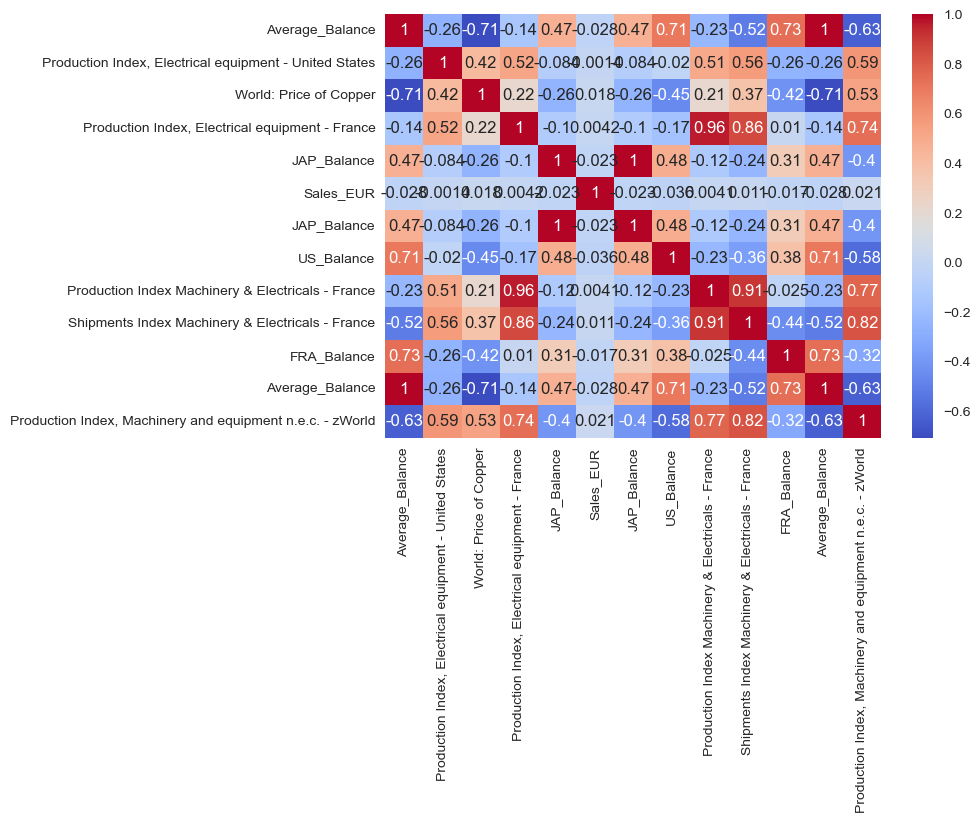

In [204]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK5].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [205]:
final_feat_GCK5.remove('Sales_EUR')
final_feat_GCK5.remove('Average_Balance')
final_feat_GCK5.remove('Production Index Machinery & Electricals - France')
final_feat_GCK5.remove('Production Index, Electrical equipment - France')
final_feat_GCK5.remove('Production Index, Machinery and equipment n.e.c. - zWorld')
final_feat_GCK5

['Production Index, Electrical equipment - United States',
 'World: Price of Copper',
 'JAP_Balance',
 'JAP_Balance',
 'US_Balance',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Average_Balance']

In [206]:
# create a new dataframe with selected columns
pred_GCK5 = GCK5_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'JAP_Balance', 'Production Index, Electrical equipment - United States', 'World: Price of Copper', 'JAP_Balance', 'US_Balance', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'Average_Balance']]
pred_GCK5.head()

DATE  Mapped_GCK  Sales_EUR  JAP_Balance  \
10  2018-10        5.00 2499061.19         0.42   
24  2018-11        5.00 8993944.04        -0.67   
38  2018-12        5.00 6947507.31        -1.52   
52  2019-01        5.00 8233205.07        -0.79   
66  2019-02        5.00 6879250.99        -0.53   

    Production Index, Electrical equipment - United States  \
10                                             112.85        
24                                             113.15        
38                                             111.82        
52                                             109.50        
66                                             110.84        

    World: Price of Copper  JAP_Balance  US_Balance  \
10                   82.55         0.42      -15.91   
24                   82.23        -0.67       -6.80   
38                   80.63        -1.52      -17.02   
52                   78.82        -0.79       -3.53   
66                   83.62        -0.53       -6.92   

    Shipments Index Machinery & Electricals - France  FRA_Balance  \
10                                            122.45       -14.17   
24                                            115.96       -16.32   
38                                            115.13       -20.44   
52                                            108.33       -18.18   
66                                            108.94       -16.39   

    Average_Balance  
10            -5.34  
24            -6.06  
38           -12.08  
52            -3.29  
66            -3.97

In [207]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK5))
train, test = pred_GCK5[:train_size], pred_GCK5[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (7, 2, 2)  # ARIMA parameters (p, d, q)
model_arima_GCK5 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK5 = model_arima_GCK5.fit()

predictions_arima_GCK5 = model_fit_arima_GCK5.forecast(steps=len(test))
predictions_arima_GCK5

rmse_arima_GCK5 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK5))
print('Test RMSE: %.3f' % rmse_arima_GCK5)

Test RMSE: 3817647.285


In [208]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [209]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK5 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK5 = mean_squared_error(y_test, predictions_xgb_GCK5, squared=False) 
print('Test RMSE: %.3f' % rmse_xgb_GCK5)

Test RMSE: 5363801.212


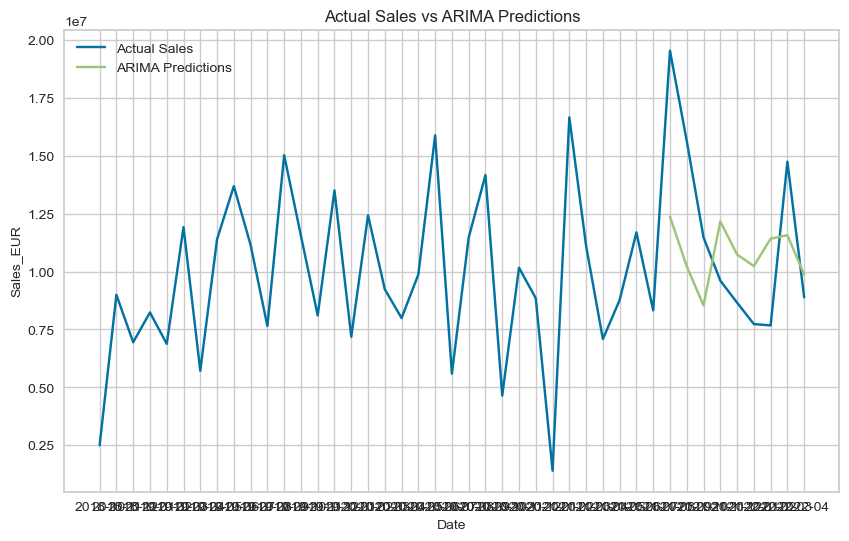

In [210]:
# GCK5

# Group your data and calculate sum of sales
sales_data = GCK5_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK5.index, predictions_arima_GCK5.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 6

In [211]:
GCK6_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 11 to 599
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipment

<Axes: xlabel='DATE'>

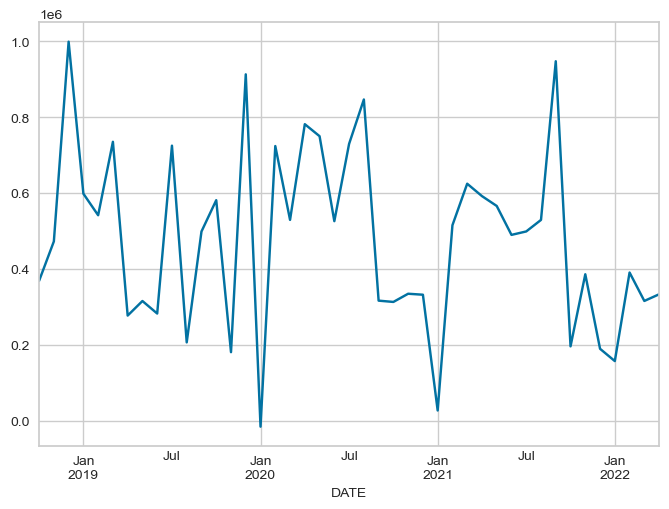

In [212]:
GCK6_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [213]:
GCK6_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [214]:
#Correlation Matrix
correlation = GCK6_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.3]['Sales_EUR']
print(correlation)

corr_feat_GCK6 = correlation.index.tolist()

corr_feat_GCK6

Sales_EUR                                                 1.00
World: Price of Crude oil, average                       -0.30
Production Index, Electrical equipment - United States   -0.32
UK_Balance                                                0.32
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'World: Price of Crude oil, average',
 'Production Index, Electrical equipment - United States',
 'UK_Balance']

In [215]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK6_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK6_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK6 = importance_df['Feature'].tolist()
dt_feat_GCK6

                                              Feature  Importance
47   Production Index, Electrical equipment - Germany        0.33
5   Production Index Machinery & Electricals - Ger...        0.18
40  Production Index, Electrical equipment - Unite...        0.15
0                                               Month        0.13
19                        World: Price of Base Metals        0.06
37  Production Index, Machinery and equipment n.e....        0.03
28      Producer Prices, Electrical equipment - Italy        0.03
31      Producer Prices, Electrical equipment - China        0.02
45     Production Index, Electrical equipment - Japan        0.02
25                          United States: EUR in LCU        0.02
39  Production Index, Machinery and equipment n.e....        0.01
34  Production Index, Machinery and equipment n.e....        0.01
29     Producer Prices, Electrical equipment - France        0.01
54                                         UK_Balance        0.00
46    Prod

['Production Index, Electrical equipment - Germany',
 'Production Index Machinery & Electricals - Germany',
 'Production Index, Electrical equipment - United States',
 'Month']

In [216]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK6_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK6_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK6 = importance_df['Feature'].tolist()
rf_feat_GCK6

                                              Feature  Importance
47   Production Index, Electrical equipment - Germany        0.24
40  Production Index, Electrical equipment - Unite...        0.05
54                                         UK_Balance        0.04
0                                               Month        0.04
50                                        GER_Balance        0.04
42  Production Index, Electrical equipment - Switz...        0.03
22                  World: Price of Natural gas index        0.03
7    Production Index Machinery & Electricals - Italy        0.03
35  Production Index, Machinery and equipment n.e....        0.02
49                                        FRA_Balance        0.02
15  Production Index Machinery & Electricals - Uni...        0.02
18   Shipments Index Machinery & Electricals - Europe        0.02
16  Shipments Index Machinery & Electricals - Unit...        0.02
41    Production Index, Electrical equipment - zWorld        0.02
32  Produc

['Production Index, Electrical equipment - Germany']

In [217]:
#RFE

# Drop the 'Date' column
X = GCK6_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK6_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK6 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK6))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [43 48 49  1  1 50  7 16 30 35 36  3  4 52 21 34 33 26 37 41 19 47 54 17
 44  9 23 22 27 12 11 24 39 38 20 14 18 40 55  6 13 28 53 42 51 32 29  8
 56  1  5 31 15  2 45 46 10 25]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [218]:
#XGBoost

X = GCK6_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK6_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK6 = importance_df['Feature'].tolist()
xgb_feat_GCK6

                                              Feature  Importance
47   Production Index, Electrical equipment - Germany        0.30
36  Production Index, Machinery and equipment n.e....        0.24
18   Shipments Index Machinery & Electricals - Europe        0.15
40  Production Index, Electrical equipment - Unite...        0.09
5   Production Index Machinery & Electricals - Ger...        0.07
8     Shipments Index Machinery & Electricals - Italy        0.03
21                 World: Price of Metals  & Minerals        0.02
6   Shipments Index Machinery & Electricals - Germany        0.01
0                                               Month        0.01
3   Production Index Machinery & Electricals - France        0.01
13  Production Index Machinery & Electricals - Uni...        0.01
7    Production Index Machinery & Electricals - Italy        0.01
4    Shipments Index Machinery & Electricals - France        0.01
38  Production Index, Machinery and equipment n.e....        0.01
45     Pro

['Production Index, Electrical equipment - Germany',
 'Production Index, Machinery and equipment n.e.c. - Italy',
 'Shipments Index Machinery & Electricals - Europe']

In [219]:
#Combinantion of the features selected
final_feat_GCK6 = dt_feat_GCK6
final_feat_GCK6.extend(rf_feat_GCK6)
final_feat_GCK6.extend(corr_feat_GCK6)
final_feat_GCK6.extend(rfe_feat_GCK6)
final_feat_GCK6.extend(xgb_feat_GCK6)

final_feat_GCK6

['Production Index, Electrical equipment - Germany',
 'Production Index Machinery & Electricals - Germany',
 'Production Index, Electrical equipment - United States',
 'Month',
 'Production Index, Electrical equipment - Germany',
 'Sales_EUR',
 'World: Price of Crude oil, average',
 'Production Index, Electrical equipment - United States',
 'UK_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index, Electrical equipment - Germany',
 'Production Index, Machinery and equipment n.e.c. - Italy',
 'Shipments Index Machinery & Electricals - Europe']

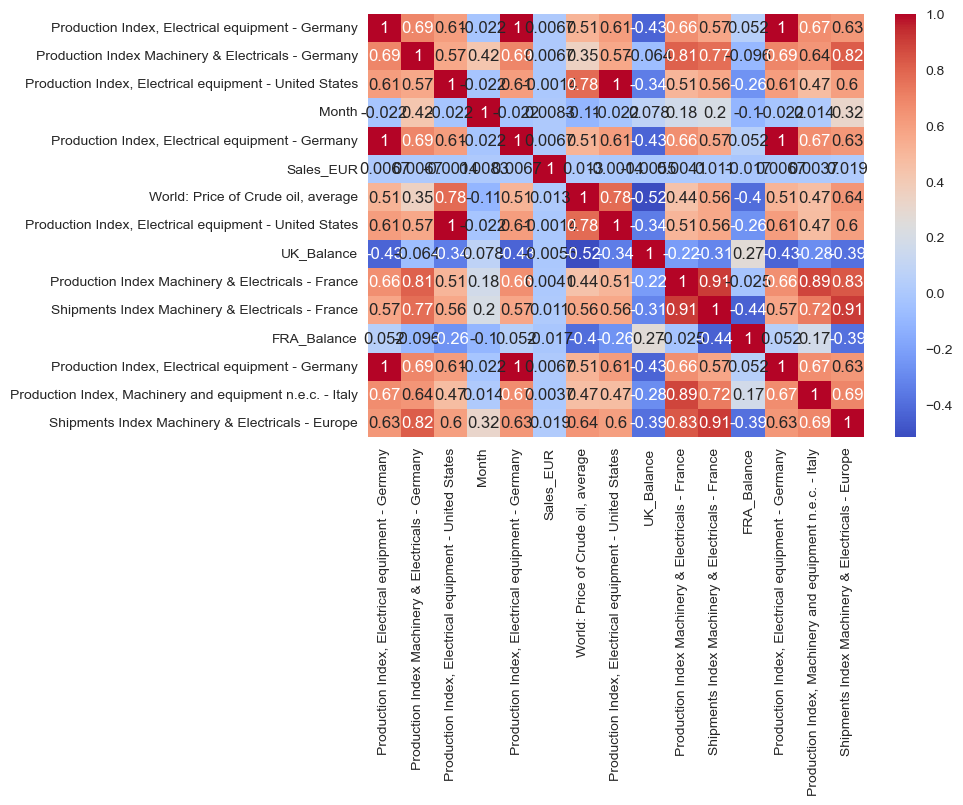

In [220]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK6].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [221]:
final_feat_GCK6.remove('Sales_EUR')
final_feat_GCK6.remove('Production Index, Electrical equipment - Germany')
final_feat_GCK6.remove('Production Index, Electrical equipment - Germany')
final_feat_GCK6.remove('Production Index, Electrical equipment - United States')
final_feat_GCK6.remove('Shipments Index Machinery & Electricals - France')
final_feat_GCK6.remove('Production Index, Machinery and equipment n.e.c. - Italy')
final_feat_GCK6.remove('Shipments Index Machinery & Electricals - Europe')
final_feat_GCK6

['Production Index Machinery & Electricals - Germany',
 'Month',
 'World: Price of Crude oil, average',
 'Production Index, Electrical equipment - United States',
 'UK_Balance',
 'Production Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index, Electrical equipment - Germany']

In [222]:
# create a new dataframe with selected columns
pred_GCK6 = GCK6_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index, Machinery and equipment n.e.c. - Germany', 'Month', 'World: Price of Crude oil, average', 'Production Index, Electrical equipment - United States', 'UK_Balance', 'Production Index Machinery & Electricals - France', 'FRA_Balance', 'Production Index, Electrical equipment - Germany']]
pred_GCK6.head()

DATE  Mapped_GCK  Sales_EUR  \
11  2018-10        6.00  369231.60   
25  2018-11        6.00  473046.96   
39  2018-12        6.00  999472.69   
53  2019-01        6.00  598874.10   
67  2019-02        6.00  542037.52   

    Production Index, Machinery and equipment n.e.c. - Germany  Month  \
11                                             127.46              10   
25                                             132.99              11   
39                                             137.36              12   
53                                             104.43               1   
67                                             112.84               2   

    World: Price of Crude oil, average  \
11                               97.07   
25                               78.84   
39                               68.27   
53                               71.59   
67                               77.34   

    Production Index, Electrical equipment - United States  UK_Balance  \
11                                             112.85             1.34   
25                                             113.15             2.29   
39                                             111.82             7.05   
53                                             109.50             2.14   
67                                             110.84             2.91   

    Production Index Machinery & Electricals - France  FRA_Balance  \
11                                             108.28       -14.17   
25                                              99.64       -16.32   
39                                              94.69       -20.44   
53                                              90.14       -18.18   
67                                              92.55       -16.39   

    Production Index, Electrical equipment - Germany  
11                                            118.30  
25                                            117.16  
39                                             89.63  
53                                            105.41  
67                                            103.65

In [223]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK6))
train, test = pred_GCK6[:train_size], pred_GCK6[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (1, 2, 0)  # ARIMA parameters (p, d, q)
model_arima_GCK6 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK6 = model_arima_GCK6.fit()

predictions_arima_GCK6 = model_fit_arima_GCK6.forecast(steps=len(test))
predictions_arima_GCK6

rmse_arima_GCK6 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK6))
print('Test RMSE: %.3f' % rmse_arima_GCK6)

Test RMSE: 205615.078


In [224]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [225]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse' 
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK6 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK6 = mean_squared_error(y_test, predictions_xgb_GCK6, squared=False) 
print('Test RMSE: %.3f' % rmse_xgb_GCK6)

Test RMSE: 185195.455


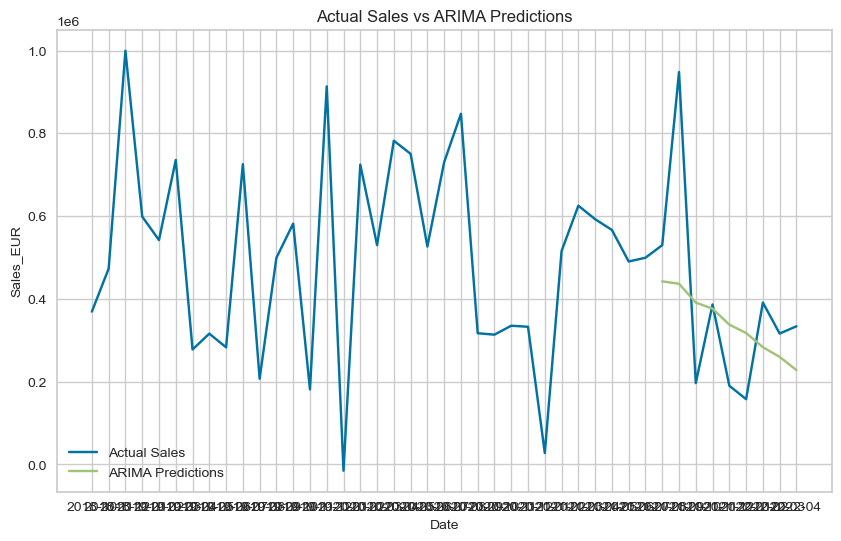

In [226]:
# GCK6

# Group your data and calculate sum of sales
sales_data = GCK6_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK6.index, predictions_arima_GCK6.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 8

In [227]:
GCK8_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 12 to 600
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipment

<Axes: xlabel='DATE'>

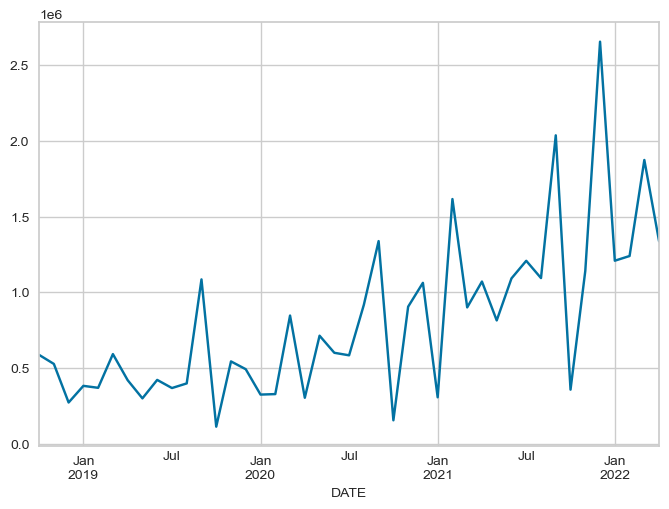

In [228]:
GCK8_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [229]:
GCK8_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [230]:
#Correlation Matrix
correlation = GCK8_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.7]['Sales_EUR']
print(correlation)

corr_feat_GCK8 = correlation.index.tolist()

corr_feat_GCK8

Sales_EUR          1.00
GER_Balance       -0.75
Average_Balance   -0.73
Name: Sales_EUR, dtype: float64


['Sales_EUR', 'GER_Balance', 'Average_Balance']

In [231]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK8_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK8_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK8 = importance_df['Feature'].tolist()
dt_feat_GCK8

                                              Feature  Importance
55                                         US_Balance        0.50
26  Producer Prices, Electrical equipment - United...        0.22
43  Production Index, Electrical equipment - Unite...        0.09
1    Production Index Machinery & Electricals - China        0.03
35  Production Index, Machinery and equipment n.e....        0.03
40  Production Index, Electrical equipment - Unite...        0.03
36  Production Index, Machinery and equipment n.e....        0.03
54                                         UK_Balance        0.02
20                             World: Price of Energy        0.01
23                 World: Price of Crude oil, average        0.01
18   Shipments Index Machinery & Electricals - Europe        0.01
7    Production Index Machinery & Electricals - Italy        0.01
9    Production Index Machinery & Electricals - Japan        0.00
50                                        GER_Balance        0.00
45     Pro

['US_Balance', 'Producer Prices, Electrical equipment - United States']

In [232]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK8_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK8_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK8 = importance_df['Feature'].tolist()
rf_feat_GCK8

                                              Feature  Importance
55                                         US_Balance        0.14
26  Producer Prices, Electrical equipment - United...        0.11
50                                        GER_Balance        0.09
22                  World: Price of Natural gas index        0.09
57                                    Average_Balance        0.07
6   Shipments Index Machinery & Electricals - Germany        0.04
43  Production Index, Electrical equipment - Unite...        0.04
16  Shipments Index Machinery & Electricals - Unit...        0.03
21                 World: Price of Metals  & Minerals        0.03
29     Producer Prices, Electrical equipment - France        0.03
24                             World: Price of Copper        0.02
53                                        SWI_Balance        0.02
30    Producer Prices, Electrical equipment - Germany        0.02
25                          United States: EUR in LCU        0.02
56        

['US_Balance', 'Producer Prices, Electrical equipment - United States']

In [233]:
#RFE

# Drop the 'Date' column
X = GCK8_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK8_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK8 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK8))

Num Features: 3
Selected Features: [False False False False False False False False False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False]
Feature Ranking: [42 46 54 55 33 50 13 16 38 36 37  1  1 21 32 40 17 18 14  8 28 49 44 29
 10 20  7 30  5 11  4  9 12 26  2 43 51 41 24 45  6 48  3 52 47 27 23 53
 56 35 25 39 22  1 34 19 31 15]
Selected Features: Index(['Production Index Machinery & Electricals - Switzerland',
       'Shipments Index Machinery & Electricals - Switzerland', 'SWI_Balance'],
      dtype='object')


In [234]:
#XGBoost

X = GCK8_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK8_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK8 = importance_df['Feature'].tolist()
xgb_feat_GCK8

                                              Feature  Importance
26  Producer Prices, Electrical equipment - United...        0.43
55                                         US_Balance        0.27
57                                    Average_Balance        0.08
50                                        GER_Balance        0.08
43  Production Index, Electrical equipment - Unite...        0.05
9    Production Index Machinery & Electricals - Japan        0.02
21                 World: Price of Metals  & Minerals        0.01
11  Production Index Machinery & Electricals - Swi...        0.01
51                                        ITA_Balance        0.00
49                                        FRA_Balance        0.00
1    Production Index Machinery & Electricals - China        0.00
25                          United States: EUR in LCU        0.00
5   Production Index Machinery & Electricals - Ger...        0.00
3   Production Index Machinery & Electricals - France        0.00
40  Produc

['Producer Prices, Electrical equipment - United States', 'US_Balance']

In [235]:
#Combinantion of the features selected
final_feat_GCK8 = dt_feat_GCK8
final_feat_GCK8.extend(rf_feat_GCK8)
final_feat_GCK8.extend(corr_feat_GCK8)
final_feat_GCK8.extend(rfe_feat_GCK8)
final_feat_GCK8.extend(xgb_feat_GCK8)

final_feat_GCK8

['US_Balance',
 'Producer Prices, Electrical equipment - United States',
 'US_Balance',
 'Producer Prices, Electrical equipment - United States',
 'Sales_EUR',
 'GER_Balance',
 'Average_Balance',
 'Production Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - Switzerland',
 'SWI_Balance',
 'Producer Prices, Electrical equipment - United States',
 'US_Balance']

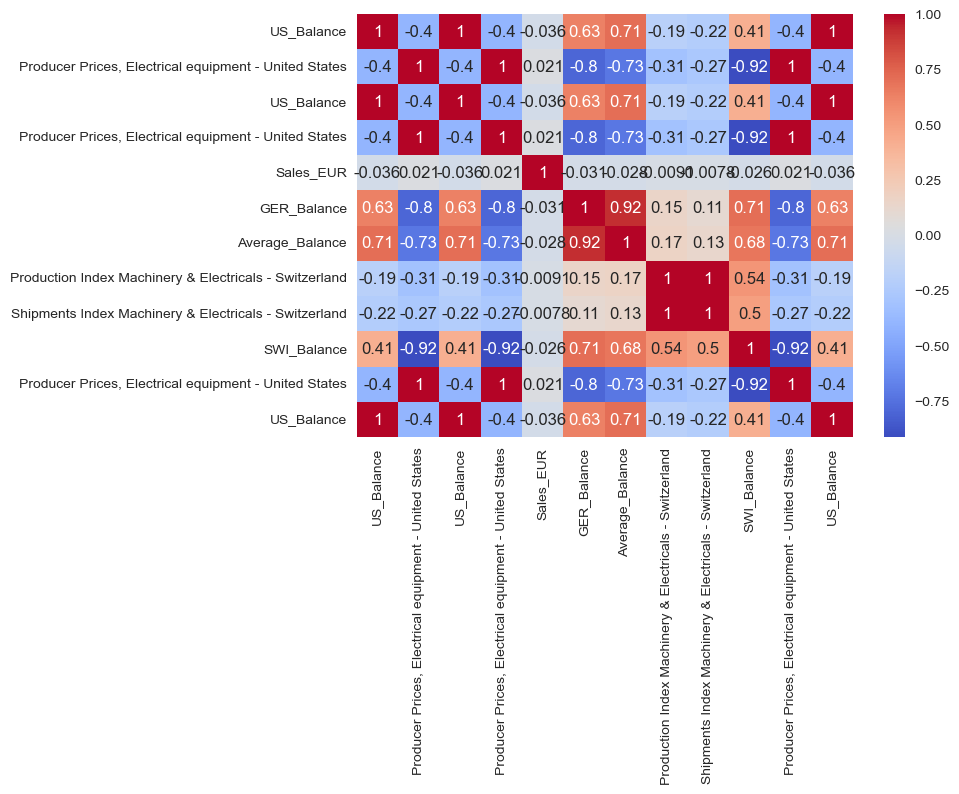

In [236]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK8].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [237]:
final_feat_GCK8.remove('Sales_EUR')
final_feat_GCK8.remove('US_Balance')
final_feat_GCK8.remove('US_Balance')
final_feat_GCK8.remove('Production Index Machinery & Electricals - Switzerland')
final_feat_GCK8.remove('Producer Prices, Electrical equipment - United States')
final_feat_GCK8.remove('Producer Prices, Electrical equipment - United States')
final_feat_GCK8.remove('GER_Balance')
final_feat_GCK8.remove('Average_Balance')
final_feat_GCK8

['Shipments Index Machinery & Electricals - Switzerland',
 'SWI_Balance',
 'Producer Prices, Electrical equipment - United States',
 'US_Balance']

In [238]:
# create a new dataframe with selected columns
pred_GCK8 = GCK8_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'GER_Balance', 'Shipments Index Machinery & Electricals - Switzerland', 'SWI_Balance', 'Producer Prices, Electrical equipment - United States', 'US_Balance']]
pred_GCK8.head()

DATE  Mapped_GCK  Sales_EUR  GER_Balance  \
12  2018-10        8.00  586052.74       -13.51   
26  2018-11        8.00  526292.77       -15.33   
40  2018-12        8.00  271490.71       -20.89   
54  2019-01        8.00  381400.15       -13.93   
68  2019-02        8.00  368475.57       -13.09   

    Shipments Index Machinery & Electricals - Switzerland  SWI_Balance  \
12                                             104.59             4.48   
26                                             107.66             4.59   
40                                             110.72             4.69   
54                                             105.16             4.46   
68                                              99.61             4.23   

    Producer Prices, Electrical equipment - United States  US_Balance  
12                                             110.70          -15.91  
26                                             110.99           -6.80  
40                                             111.16          -17.02  
54                                             111.39           -3.53  
68                                             111.56           -6.92

In [239]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK8))
train, test = pred_GCK8[:train_size], pred_GCK8[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (7, 2, 0)  # ARIMA parameters (p, d, q)
model_arima_GCK8 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK8 = model_arima_GCK8.fit()

predictions_arima_GCK8 = model_fit_arima_GCK8.forecast(steps=len(test))
predictions_arima_GCK8

rmse_arima_GCK8 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK8))
print('Test RMSE: %.3f' % rmse_arima_GCK8)

Test RMSE: 578862.090


In [240]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [241]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK8 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK8 = mean_squared_error(y_test, predictions_xgb_GCK8, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK8)

Test RMSE: 524167.091


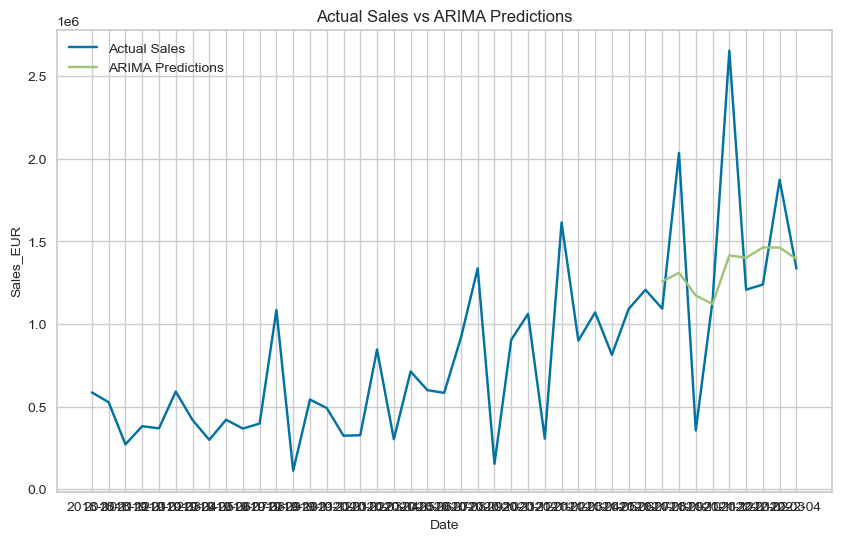

In [242]:
# GCK8

# Group your data and calculate sum of sales
sales_data = GCK8_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK8.index, predictions_arima_GCK8.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 9

In [243]:
GCK9_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 13 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipment

<Axes: xlabel='DATE'>

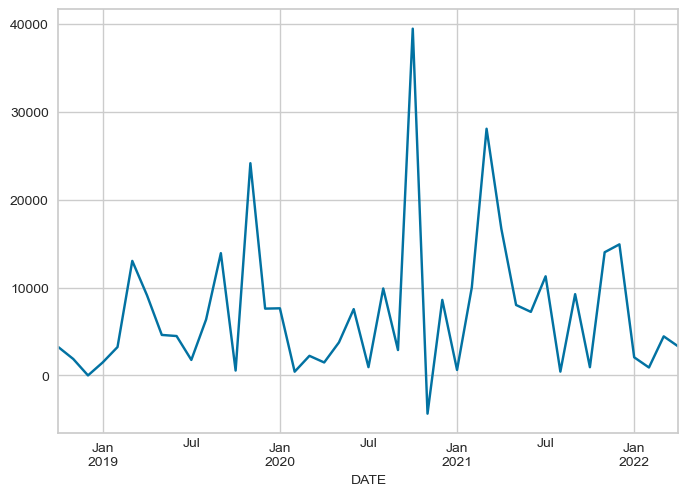

In [244]:
GCK9_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [245]:
GCK9_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [246]:
#Correlation Matrix
correlation = GCK9_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.3]['Sales_EUR']
print(correlation)

corr_feat_GCK9 = correlation.index.tolist()

corr_feat_GCK9

Sales_EUR                                                 1.00
Production Index, Electrical equipment - zWorld           0.34
Production Index, Electrical equipment - United Kingdom   0.32
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index, Electrical equipment - zWorld',
 'Production Index, Electrical equipment - United Kingdom']

In [247]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK9_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK9_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK9 = importance_df['Feature'].tolist()
dt_feat_GCK9

                                              Feature  Importance
9    Production Index Machinery & Electricals - Japan        0.35
43  Production Index, Electrical equipment - Unite...        0.17
11  Production Index Machinery & Electricals - Swi...        0.15
15  Production Index Machinery & Electricals - Uni...        0.08
57                                    Average_Balance        0.04
41    Production Index, Electrical equipment - zWorld        0.04
49                                        FRA_Balance        0.04
17  Production Index Machinery & Electricals - Europe        0.03
22                  World: Price of Natural gas index        0.02
47   Production Index, Electrical equipment - Germany        0.02
35  Production Index, Machinery and equipment n.e....        0.01
44     Production Index, Electrical equipment - Italy        0.01
56                                        EUR_Balance        0.01
52                                        JAP_Balance        0.01
1    Produ

['Production Index Machinery & Electricals - Japan',
 'Production Index, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Switzerland']

In [248]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK9_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK9_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK9 = importance_df['Feature'].tolist()
rf_feat_GCK9

                                              Feature  Importance
38  Production Index, Machinery and equipment n.e....        0.06
43  Production Index, Electrical equipment - Unite...        0.05
31      Producer Prices, Electrical equipment - China        0.05
27  Producer Prices, Electrical equipment - United...        0.04
41    Production Index, Electrical equipment - zWorld        0.04
45     Production Index, Electrical equipment - Japan        0.04
25                          United States: EUR in LCU        0.03
10    Shipments Index Machinery & Electricals - Japan        0.03
2     Shipments Index Machinery & Electricals - China        0.03
33  Production Index, Machinery and equipment n.e....        0.03
17  Production Index Machinery & Electricals - Europe        0.03
44     Production Index, Electrical equipment - Italy        0.02
23                 World: Price of Crude oil, average        0.02
56                                        EUR_Balance        0.02
5   Produc

[]

In [249]:
#RFE

# Drop the 'Date' column
X = GCK9_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK9_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK9 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK9))

Num Features: 3
Selected Features: [False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False]
Feature Ranking: [39 23 22 55 48  6  7  3  2  1 15 53 18  8 52 24 37 11 12 45 41 44 50 40
 47 29 34 51 31 42 30 32 25 35 17  9 20  1 54 27 26 43 19 10 21  1 46 28
 56 49  5  4 14 16 38 36 13 33]
Selected Features: Index(['Production Index Machinery & Electricals - Japan',
       'Production Index, Machinery and equipment n.e.c. - Japan',
       'Production Index, Electrical equipment - Japan'],
      dtype='object')


In [250]:
#XGBoost

X = GCK9_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK9_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK9 = importance_df['Feature'].tolist()
xgb_feat_GCK9

                                              Feature  Importance
38  Production Index, Machinery and equipment n.e....        0.23
43  Production Index, Electrical equipment - Unite...        0.17
9    Production Index Machinery & Electricals - Japan        0.15
23                 World: Price of Crude oil, average        0.10
22                  World: Price of Natural gas index        0.06
31      Producer Prices, Electrical equipment - China        0.05
26  Producer Prices, Electrical equipment - United...        0.04
54                                         UK_Balance        0.03
21                 World: Price of Metals  & Minerals        0.03
49                                        FRA_Balance        0.02
7    Production Index Machinery & Electricals - Italy        0.02
5   Production Index Machinery & Electricals - Ger...        0.02
13  Production Index Machinery & Electricals - Uni...        0.01
25                          United States: EUR in LCU        0.01
30    Prod

['Production Index, Machinery and equipment n.e.c. - France',
 'Production Index, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Japan']

In [251]:
#Combinantion of the features selected
final_feat_GCK9 = dt_feat_GCK9
final_feat_GCK9.extend(rf_feat_GCK9)
final_feat_GCK9.extend(corr_feat_GCK9)
final_feat_GCK9.extend(rfe_feat_GCK9)
final_feat_GCK9.extend(xgb_feat_GCK9)

final_feat_GCK9

['Production Index Machinery & Electricals - Japan',
 'Production Index, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Switzerland',
 'Sales_EUR',
 'Production Index, Electrical equipment - zWorld',
 'Production Index, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Japan',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'Production Index, Electrical equipment - Japan',
 'Production Index, Machinery and equipment n.e.c. - France',
 'Production Index, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Japan']

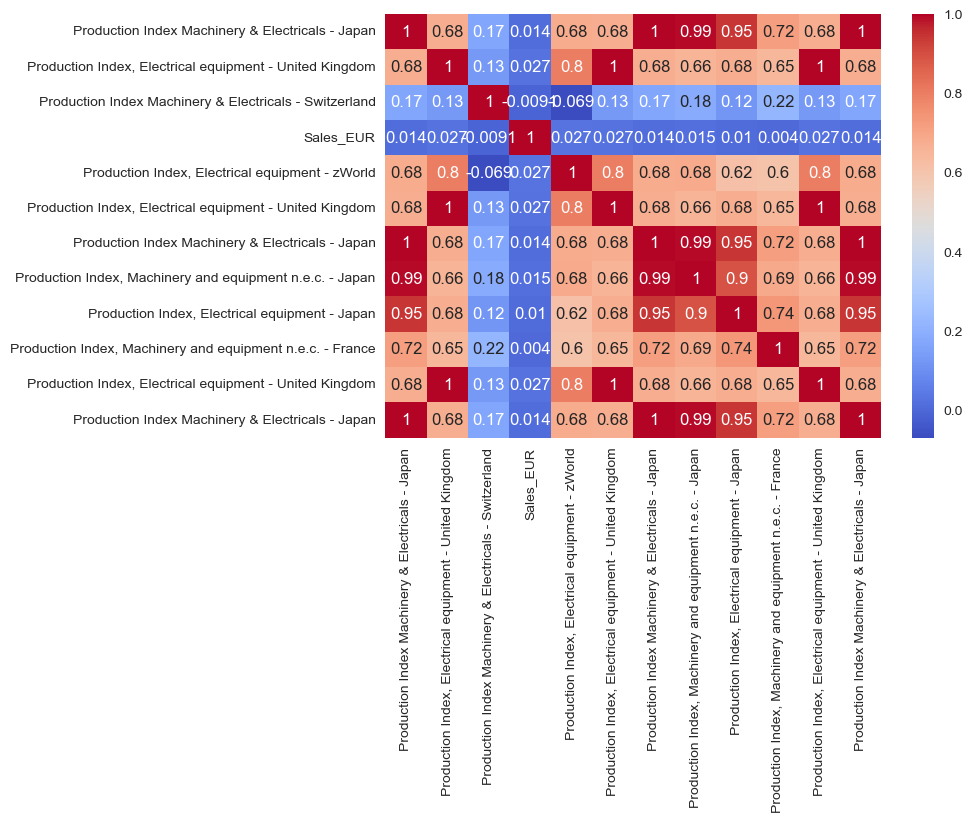

In [252]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK9].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [253]:
final_feat_GCK9.remove('Sales_EUR')
final_feat_GCK9.remove('Production Index, Electrical equipment - Japan')
final_feat_GCK9.remove('Production Index, Machinery and equipment n.e.c. - Japan')
final_feat_GCK9.remove('Production Index Machinery & Electricals - Japan')
final_feat_GCK9.remove('Production Index, Electrical equipment - United Kingdom')
final_feat_GCK9.remove('Production Index, Electrical equipment - United Kingdom')
final_feat_GCK9.remove('Production Index, Electrical equipment - zWorld')
final_feat_GCK9

['Production Index Machinery & Electricals - Switzerland',
 'Production Index Machinery & Electricals - Japan',
 'Production Index, Machinery and equipment n.e.c. - France',
 'Production Index, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Japan']

In [254]:
# create a new dataframe with selected columns
pred_GCK9 = GCK9_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Shipments Index Machinery & Electricals - Japan', 'Production Index Machinery & Electricals - Switzerland', 'Production Index, Machinery and equipment n.e.c. - France', 'Production Index, Electrical equipment - United Kingdom', 'Production Index Machinery & Electricals - Japan']]
pred_GCK9.head()

DATE  Mapped_GCK  Sales_EUR  \
13  2018-10        9.00    3219.32   
27  2018-11        9.00    1875.90   
41  2018-12        9.00       0.00   
55  2019-01        9.00    1487.00   
69  2019-02        9.00    3234.28   

    Shipments Index Machinery & Electricals - Japan  \
13                                           124.79   
27                                           123.29   
41                                           124.51   
55                                           106.30   
69                                           115.00   

    Production Index Machinery & Electricals - Switzerland  \
13                                             109.08        
27                                             112.24        
41                                             115.41        
55                                             109.62        
69                                             103.84        

    Production Index, Machinery and equipment n.e.c. - France  \
13                                             114.72           
27                                             104.87           
41                                             104.97           
55                                              95.23           
69                                             100.10           

    Production Index, Electrical equipment - United Kingdom  \
13                                             118.67         
27                                             120.47         
41                                             105.38         
55                                             107.17         
69                                             110.65         

    Production Index Machinery & Electricals - Japan  
13                                            125.21  
27                                            122.62  
41                                            122.99  
55                                            105.51  
69                                            114.47

In [255]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK9))
train, test = pred_GCK9[:train_size], pred_GCK9[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (4, 0, 1)  # ARIMA parameters (p, d, q)
model_arima_GCK9 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK9 = model_arima_GCK9.fit()

predictions_arima_GCK9 = model_fit_arima_GCK9.forecast(steps=len(test))
predictions_arima_GCK9

rmse_arima_GCK9 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK9))
print('Test RMSE: %.3f' % rmse_arima_GCK9)

Test RMSE: 5340.171


In [256]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [257]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK9 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK9 = mean_squared_error(y_test, predictions_xgb_GCK9, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK9)

Test RMSE: 13245.294


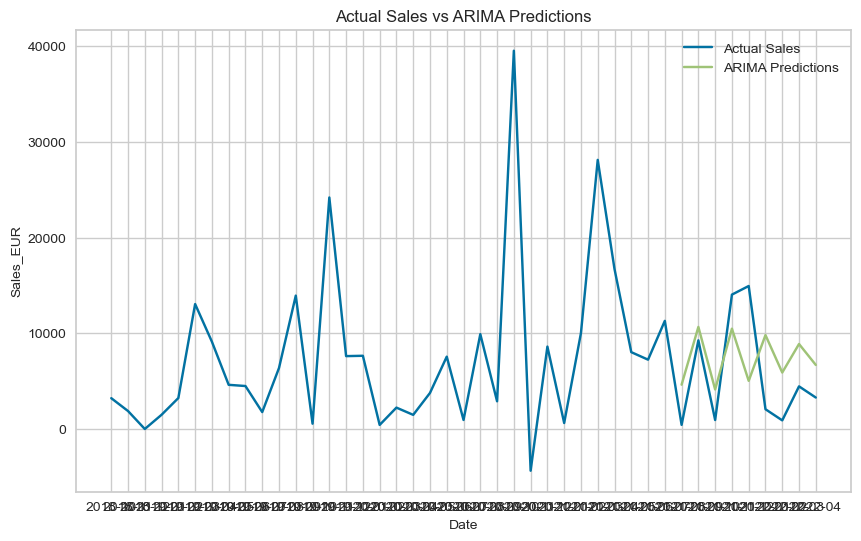

In [258]:
# GCK9

# Group your data and calculate sum of sales
sales_data = GCK9_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK9.index, predictions_arima_GCK9.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 11

In [259]:
GCK11_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 589
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

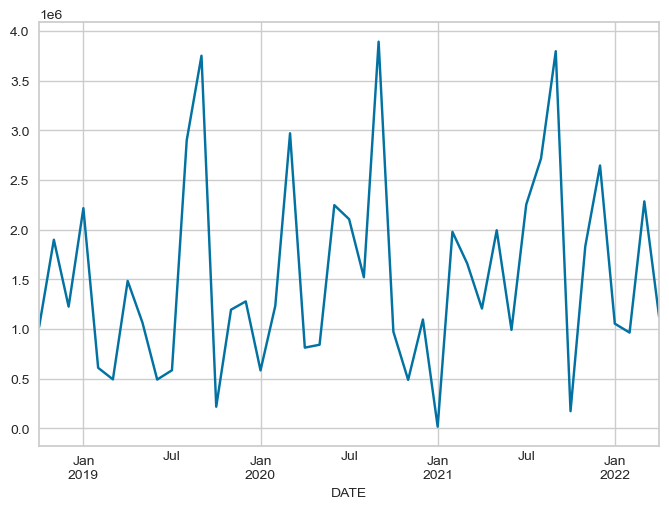

In [260]:
GCK11_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [261]:
GCK11_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [262]:
#Correlation Matrix
correlation = GCK11_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.3]['Sales_EUR']
print(correlation)

corr_feat_GCK11 = correlation.index.tolist()

corr_feat_GCK11

Sales_EUR      1.00
GER_Balance   -0.35
JAP_Balance   -0.53
US_Balance    -0.39
Name: Sales_EUR, dtype: float64


['Sales_EUR', 'GER_Balance', 'JAP_Balance', 'US_Balance']

In [263]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK11_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK11_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK11 = importance_df['Feature'].tolist()
dt_feat_GCK11

                                              Feature  Importance
52                                        JAP_Balance        0.39
55                                         US_Balance        0.16
3   Production Index Machinery & Electricals - France        0.15
12  Shipments Index Machinery & Electricals - Swit...        0.06
53                                        SWI_Balance        0.04
20                             World: Price of Energy        0.03
38  Production Index, Machinery and equipment n.e....        0.03
31      Producer Prices, Electrical equipment - China        0.03
5   Production Index Machinery & Electricals - Ger...        0.02
50                                        GER_Balance        0.02
22                  World: Price of Natural gas index        0.01
1    Production Index Machinery & Electricals - China        0.01
35  Production Index, Machinery and equipment n.e....        0.01
54                                         UK_Balance        0.01
9    Produ

['JAP_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France']

In [264]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK11_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK11_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK11 = importance_df['Feature'].tolist()
rf_feat_GCK11

                                              Feature  Importance
52                                        JAP_Balance        0.24
43  Production Index, Electrical equipment - Unite...        0.11
55                                         US_Balance        0.10
50                                        GER_Balance        0.03
27  Producer Prices, Electrical equipment - United...        0.02
25                          United States: EUR in LCU        0.02
1    Production Index Machinery & Electricals - China        0.02
2     Shipments Index Machinery & Electricals - China        0.02
38  Production Index, Machinery and equipment n.e....        0.02
22                  World: Price of Natural gas index        0.02
10    Shipments Index Machinery & Electricals - Japan        0.02
34  Production Index, Machinery and equipment n.e....        0.02
49                                        FRA_Balance        0.02
56                                        EUR_Balance        0.01
21        

['JAP_Balance',
 'Production Index, Electrical equipment - United Kingdom',
 'US_Balance']

In [265]:
#RFE

# Drop the 'Date' column
X = GCK11_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK11_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK11 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK11))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [30 55 47  1  1  6  7 21 40  3 16 12 11 50 43 18 45  9 10 28 33 46 39 37
 29 54 25 41 24 26 31 27 19 49 14 36 22  2 51 52 20 34 15 48 23  4 42 35
 56  1  5 53 17 13 32 38  8 44]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [266]:
#XGBoost

X = GCK11_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK11_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK11 = importance_df['Feature'].tolist()
xgb_feat_GCK11

                                              Feature  Importance
6   Shipments Index Machinery & Electricals - Germany        0.24
52                                        JAP_Balance        0.18
28      Producer Prices, Electrical equipment - Italy        0.08
34  Production Index, Machinery and equipment n.e....        0.08
44     Production Index, Electrical equipment - Italy        0.05
3   Production Index Machinery & Electricals - France        0.05
43  Production Index, Electrical equipment - Unite...        0.04
11  Production Index Machinery & Electricals - Swi...        0.04
19                        World: Price of Base Metals        0.03
38  Production Index, Machinery and equipment n.e....        0.03
5   Production Index Machinery & Electricals - Ger...        0.02
53                                        SWI_Balance        0.02
1    Production Index Machinery & Electricals - China        0.01
51                                        ITA_Balance        0.01
46    Prod

['Shipments Index Machinery & Electricals - Germany', 'JAP_Balance']

In [267]:
#Combinantion of the features selected
final_feat_GCK11 = dt_feat_GCK11
final_feat_GCK11.extend(rf_feat_GCK11)
final_feat_GCK11.extend(corr_feat_GCK11)
final_feat_GCK11.extend(rfe_feat_GCK11)
final_feat_GCK11.extend(xgb_feat_GCK11)

final_feat_GCK11

['JAP_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France',
 'JAP_Balance',
 'Production Index, Electrical equipment - United Kingdom',
 'US_Balance',
 'Sales_EUR',
 'GER_Balance',
 'JAP_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Shipments Index Machinery & Electricals - Germany',
 'JAP_Balance']

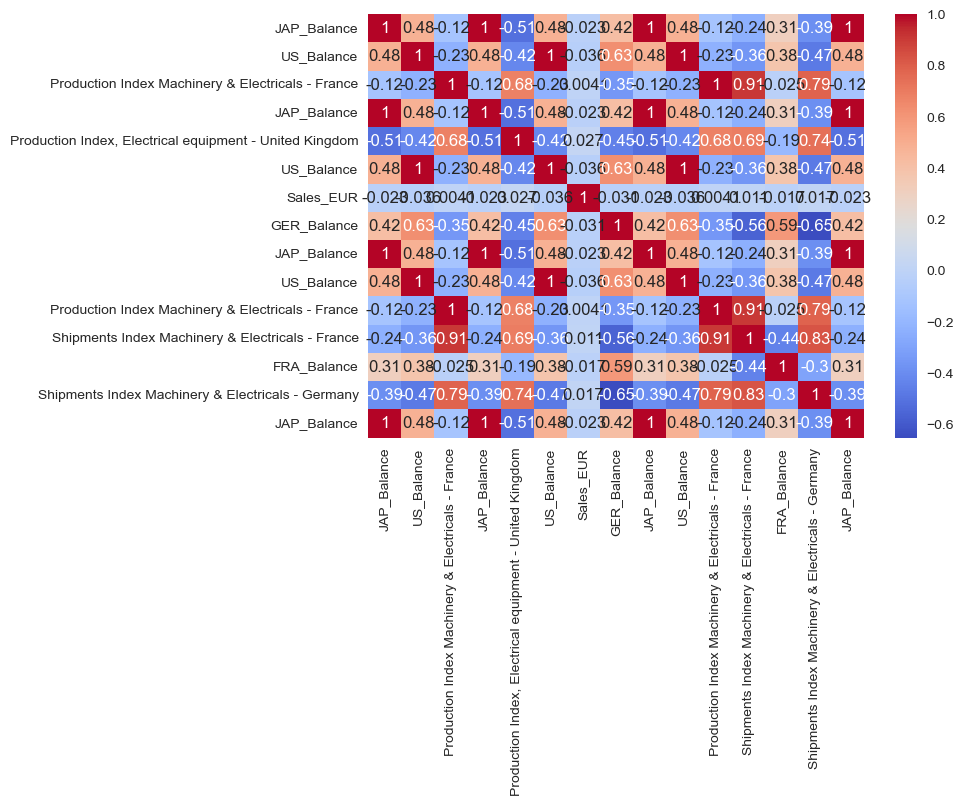

In [268]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK11].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [269]:
final_feat_GCK11.remove('Sales_EUR')
final_feat_GCK11.remove('JAP_Balance')
final_feat_GCK11.remove('JAP_Balance')
final_feat_GCK11.remove('JAP_Balance')
final_feat_GCK11.remove('Production Index Machinery & Electricals - France')
final_feat_GCK11.remove('US_Balance')
final_feat_GCK11.remove('Shipments Index Machinery & Electricals - Germany')
final_feat_GCK11

['Production Index, Electrical equipment - United Kingdom',
 'US_Balance',
 'GER_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'JAP_Balance']

In [270]:
# create a new dataframe with selected columns
pred_GCK11 = GCK11_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index Machinery & Electricals - Germany', 'GER_Balance', 'US_Balance', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'JAP_Balance']]
pred_GCK11.head()

DATE  Mapped_GCK  Sales_EUR  \
1   2018-10       11.00 1021303.50   
15  2018-11       11.00 1898844.80   
29  2018-12       11.00 1226122.00   
43  2019-01       11.00 2216391.74   
57  2019-02       11.00  610456.60   

    Production Index Machinery & Electricals - Germany  GER_Balance  \
1                                              124.23        -13.51   
15                                             127.40        -15.33   
29                                             120.52        -20.89   
43                                             104.78        -13.93   
57                                             109.60        -13.09   

    US_Balance  Shipments Index Machinery & Electricals - France  FRA_Balance  \
1       -15.91                                            122.45       -14.17   
15       -6.80                                            115.96       -16.32   
29      -17.02                                            115.13       -20.44   
43       -3.53                                            108.33       -18.18   
57       -6.92                                            108.94       -16.39   

    JAP_Balance  
1          0.42  
15        -0.67  
29        -1.52  
43        -0.79  
57        -0.53

In [271]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK11))
train, test = pred_GCK11[:train_size], pred_GCK11[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (1, 1, 0)  # ARIMA parameters (p, d, q)
model_arima_GCK11 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK11 = model_arima_GCK11.fit()

predictions_arima_GCK11 = model_fit_arima_GCK11.forecast(steps=len(test))
predictions_arima_GCK11

rmse_arima_GCK11 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK11))
print('Test RMSE: %.3f' % rmse_arima_GCK11)

Test RMSE: 1060880.652


In [272]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [273]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK11 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK11 = mean_squared_error(y_test, predictions_xgb_GCK11, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK11)

Test RMSE: 1235360.534


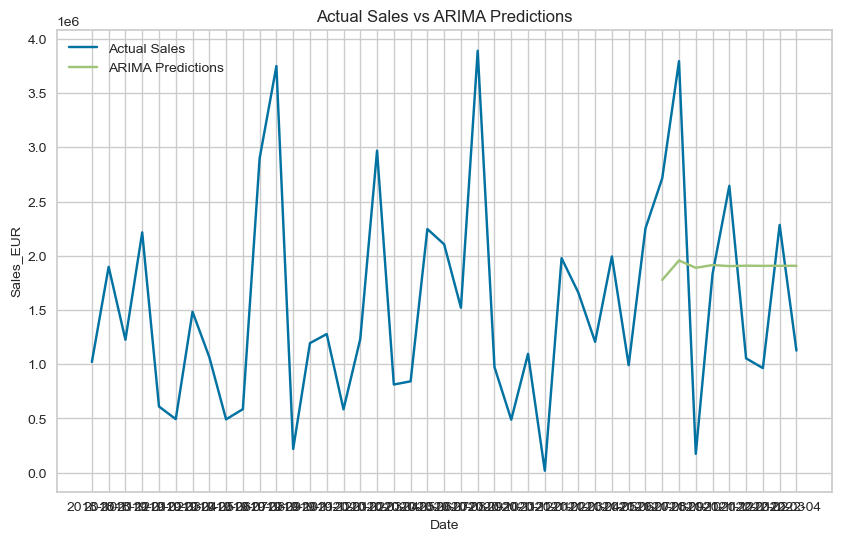

In [274]:
# GCK11

# Group your data and calculate sum of sales
sales_data = GCK11_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK11.index, predictions_arima_GCK11.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 12

In [275]:
GCK12_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 2 to 590
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

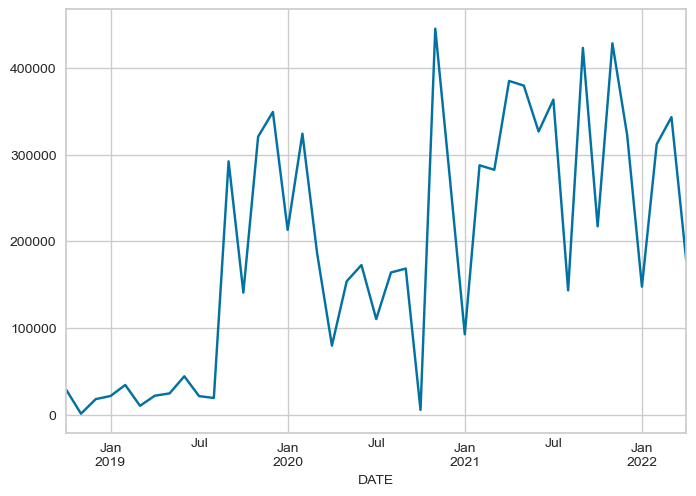

In [276]:
GCK12_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [277]:
GCK12_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [278]:
#Correlation Matrix
correlation = GCK12_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.6]['Sales_EUR']
print(correlation)

corr_feat_GCK12 = correlation.index.tolist()

corr_feat_GCK12

Sales_EUR                                                   1.00
Shipments Index Machinery & Electricals - United Kingdom   -0.65
Producer Prices, Electrical equipment - United Kingdom     -0.64
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Producer Prices, Electrical equipment - United Kingdom']

In [279]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK12_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK12_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK12 = importance_df['Feature'].tolist()
dt_feat_GCK12

                                              Feature  Importance
30    Producer Prices, Electrical equipment - Germany        0.44
39  Production Index, Machinery and equipment n.e....        0.18
25                          United States: EUR in LCU        0.18
40  Production Index, Electrical equipment - Unite...        0.06
6   Shipments Index Machinery & Electricals - Germany        0.06
13  Production Index Machinery & Electricals - Uni...        0.03
45     Production Index, Electrical equipment - Japan        0.02
52                                        JAP_Balance        0.01
46    Production Index, Electrical equipment - France        0.01
51                                        ITA_Balance        0.00
55                                         US_Balance        0.00
27  Producer Prices, Electrical equipment - United...        0.00
31      Producer Prices, Electrical equipment - China        0.00
12  Shipments Index Machinery & Electricals - Swit...        0.00
42  Produc

['Producer Prices, Electrical equipment - Germany',
 'Production Index, Machinery and equipment n.e.c. - Germany',
 'United States: EUR in LCU']

In [280]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK12_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK12_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK12 = importance_df['Feature'].tolist()
rf_feat_GCK12

                                              Feature  Importance
30    Producer Prices, Electrical equipment - Germany        0.24
56                                        EUR_Balance        0.12
55                                         US_Balance        0.08
50                                        GER_Balance        0.06
35  Production Index, Machinery and equipment n.e....        0.03
54                                         UK_Balance        0.02
2     Shipments Index Machinery & Electricals - China        0.02
38  Production Index, Machinery and equipment n.e....        0.02
39  Production Index, Machinery and equipment n.e....        0.02
29     Producer Prices, Electrical equipment - France        0.02
8     Shipments Index Machinery & Electricals - Italy        0.02
1    Production Index Machinery & Electricals - China        0.02
13  Production Index Machinery & Electricals - Uni...        0.02
40  Production Index, Electrical equipment - Unite...        0.02
14  Shipme

['Producer Prices, Electrical equipment - Germany', 'EUR_Balance']

In [281]:
#RFE

# Drop the 'Date' column
X = GCK12_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK12_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK12 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK12))

Num Features: 3
Selected Features: [False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False]
Feature Ranking: [30 41 52 54  4 49 48  9 28  1 39 16 13 53 35 31 34  7  6 33 43 25 46 38
 27 18 26 37 45 20 32 17 42 22 14 51 10  1  3 47 50 23 15 44 11  1  5 40
 56  2 24 29 55 12 19 36  8 21]
Selected Features: Index(['Production Index Machinery & Electricals - Japan',
       'Production Index, Machinery and equipment n.e.c. - Japan',
       'Production Index, Electrical equipment - Japan'],
      dtype='object')


In [282]:
#XGBoost

X = GCK12_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK12_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK12 = importance_df['Feature'].tolist()
xgb_feat_GCK12

                                              Feature  Importance
30    Producer Prices, Electrical equipment - Germany        0.46
56                                        EUR_Balance        0.25
5   Production Index Machinery & Electricals - Ger...        0.05
25                          United States: EUR in LCU        0.05
6   Shipments Index Machinery & Electricals - Germany        0.04
19                        World: Price of Base Metals        0.03
54                                         UK_Balance        0.03
43  Production Index, Electrical equipment - Unite...        0.03
11  Production Index Machinery & Electricals - Swi...        0.02
35  Production Index, Machinery and equipment n.e....        0.01
13  Production Index Machinery & Electricals - Uni...        0.01
7    Production Index Machinery & Electricals - Italy        0.00
45     Production Index, Electrical equipment - Japan        0.00
1    Production Index Machinery & Electricals - China        0.00
52        

['Producer Prices, Electrical equipment - Germany', 'EUR_Balance']

In [283]:
#Combinantion of the features selected
final_feat_GCK12 = dt_feat_GCK12
final_feat_GCK12.extend(corr_feat_GCK12)
final_feat_GCK12.extend(rfe_feat_GCK12)
final_feat_GCK12.extend(xgb_feat_GCK12)

final_feat_GCK12

['Producer Prices, Electrical equipment - Germany',
 'Production Index, Machinery and equipment n.e.c. - Germany',
 'United States: EUR in LCU',
 'Sales_EUR',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Producer Prices, Electrical equipment - United Kingdom',
 'Production Index Machinery & Electricals - Japan',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'Production Index, Electrical equipment - Japan',
 'Producer Prices, Electrical equipment - Germany',
 'EUR_Balance']

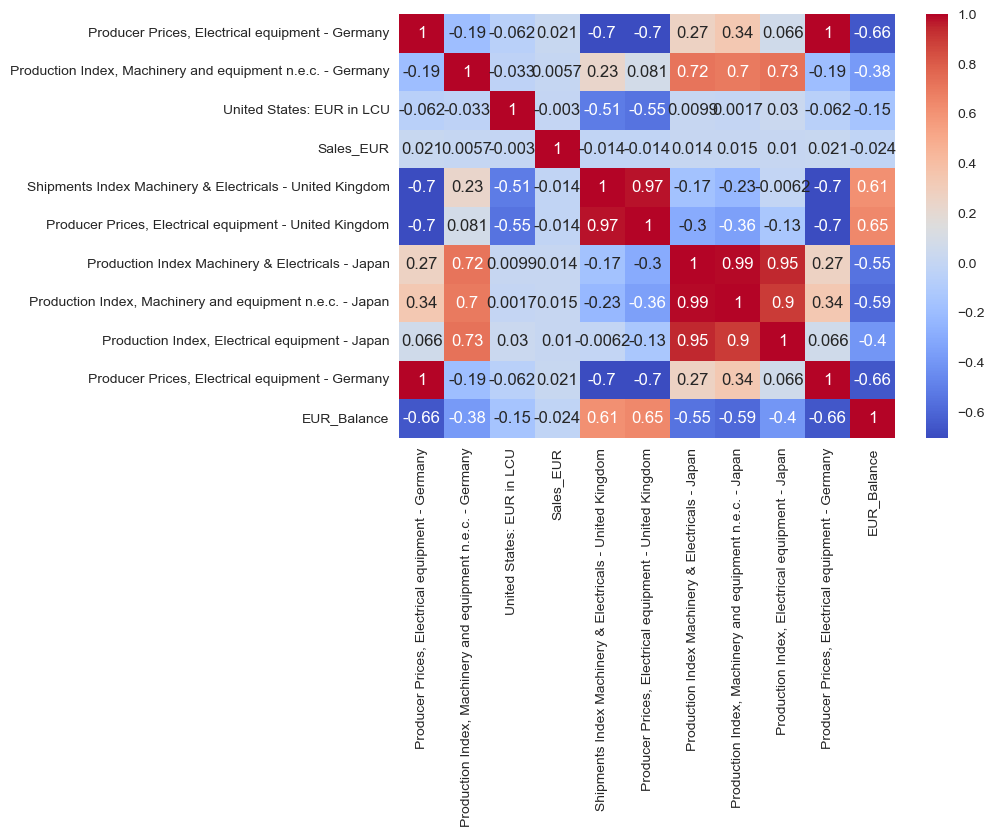

In [284]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK12].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [285]:
final_feat_GCK12.remove('Sales_EUR')
final_feat_GCK12.remove('Producer Prices, Electrical equipment - United Kingdom')
final_feat_GCK12.remove('Production Index, Machinery and equipment n.e.c. - Japan')
final_feat_GCK12.remove('Production Index Machinery & Electricals - Japan')
final_feat_GCK12.remove('Producer Prices, Electrical equipment - Germany')
final_feat_GCK12

['Production Index, Machinery and equipment n.e.c. - Germany',
 'United States: EUR in LCU',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Production Index, Electrical equipment - Japan',
 'Producer Prices, Electrical equipment - Germany',
 'EUR_Balance']

In [286]:
# create a new dataframe with selected columns
pred_GCK12 = GCK12_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index, Machinery and equipment n.e.c. - Germany', 'United States: EUR in LCU', 'Shipments Index Machinery & Electricals - United Kingdom', 'Production Index, Electrical equipment - Japan', 'Producer Prices, Electrical equipment - Germany', 'EUR_Balance']]
pred_GCK12.head()

DATE  Mapped_GCK  Sales_EUR  \
2   2018-10       12.00   28686.33   
16  2018-11       12.00    1070.00   
30  2018-12       12.00   17880.60   
44  2019-01       12.00   21484.00   
58  2019-02       12.00   34214.74   

    Production Index, Machinery and equipment n.e.c. - Germany  \
2                                              127.46            
16                                             132.99            
30                                             137.36            
44                                             104.43            
58                                             112.84            

    United States: EUR in LCU  \
2                        1.15   
16                       1.14   
30                       1.14   
44                       1.14   
58                       1.14   

    Shipments Index Machinery & Electricals - United Kingdom  \
2                                              112.32          
16                                             112.80          
30                                              94.50          
44                                              99.66          
58                                             100.59          

    Production Index, Electrical equipment - Japan  \
2                                           112.38   
16                                          111.91   
30                                          112.52   
44                                           95.96   
58                                          107.31   

    Producer Prices, Electrical equipment - Germany  EUR_Balance  
2                                            109.12        -6.60  
16                                           109.22        -9.86  
30                                           109.33       -17.40  
44                                           109.75        -6.64  
58                                           109.86        -7.28

In [287]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK12))
train, test = pred_GCK12[:train_size], pred_GCK12[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (2, 0, 1)  # ARIMA parameters (p, d, q)
model_arima_GCK12 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK12 = model_arima_GCK12.fit()

predictions_arima_GCK12 = model_fit_arima_GCK12.forecast(steps=len(test))
predictions_arima_GCK12

rmse_arima_GCK12 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK12))
print('Test RMSE: %.3f' % rmse_arima_GCK12)

Test RMSE: 107353.028


In [288]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [289]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK12 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK12 = mean_squared_error(y_test, predictions_xgb_GCK12, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK12)

Test RMSE: 162224.289


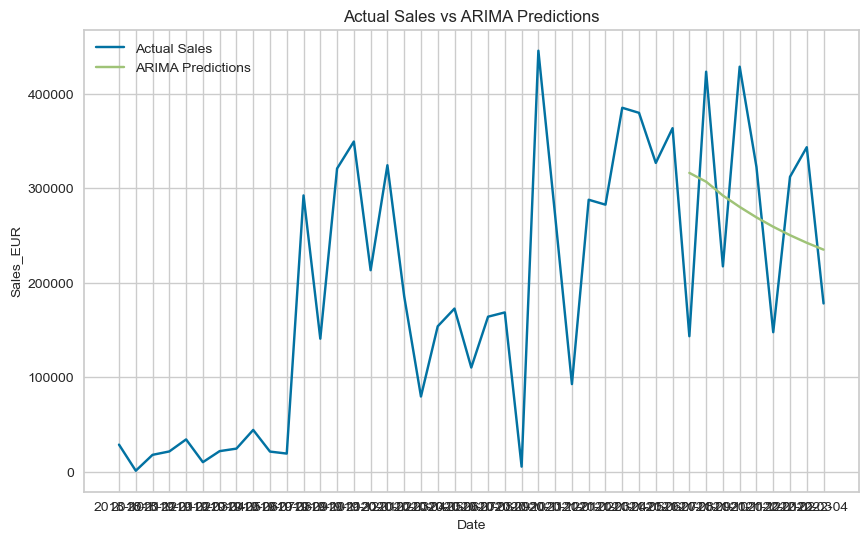

In [290]:
# GCK12

# Group your data and calculate sum of sales
sales_data = GCK12_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK12.index, predictions_arima_GCK12.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 13

In [291]:
GCK13_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 3 to 591
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

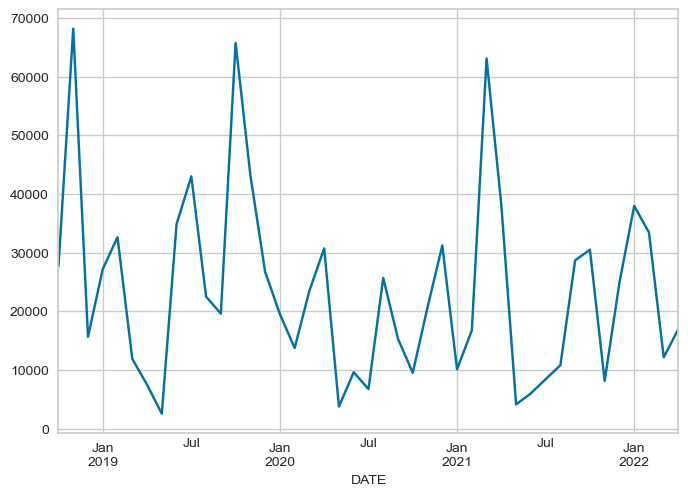

In [292]:
GCK13_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [293]:
GCK13_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [294]:
#Correlation Matrix
correlation = GCK13_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.27]['Sales_EUR']
print(correlation)

corr_feat_GCK13 = correlation.index.tolist()

corr_feat_GCK13

Sales_EUR                                                           1.00
Production Index Machinery & Electricals - Germany                  0.29
Production Index, Machinery and equipment n.e.c. - United Kingdom   0.28
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index Machinery & Electricals - Germany',
 'Production Index, Machinery and equipment n.e.c. - United Kingdom']

In [295]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK13_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK13_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK13 = importance_df['Feature'].tolist()
dt_feat_GCK13

                                              Feature  Importance
26  Producer Prices, Electrical equipment - United...        0.42
38  Production Index, Machinery and equipment n.e....        0.18
42  Production Index, Electrical equipment - Switz...        0.09
37  Production Index, Machinery and equipment n.e....        0.07
36  Production Index, Machinery and equipment n.e....        0.06
29     Producer Prices, Electrical equipment - France        0.04
49                                        FRA_Balance        0.03
10    Shipments Index Machinery & Electricals - Japan        0.03
11  Production Index Machinery & Electricals - Swi...        0.02
40  Production Index, Electrical equipment - Unite...        0.01
25                          United States: EUR in LCU        0.01
52                                        JAP_Balance        0.01
2     Shipments Index Machinery & Electricals - China        0.00
57                                    Average_Balance        0.00
15  Produc

['Producer Prices, Electrical equipment - United States',
 'Production Index, Machinery and equipment n.e.c. - France']

In [296]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK13_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK13_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK13 = importance_df['Feature'].tolist()
rf_feat_GCK13

                                              Feature  Importance
26  Producer Prices, Electrical equipment - United...        0.15
52                                        JAP_Balance        0.08
35  Production Index, Machinery and equipment n.e....        0.07
5   Production Index Machinery & Electricals - Ger...        0.06
34  Production Index, Machinery and equipment n.e....        0.06
42  Production Index, Electrical equipment - Switz...        0.06
49                                        FRA_Balance        0.03
46    Production Index, Electrical equipment - France        0.03
7    Production Index Machinery & Electricals - Italy        0.03
36  Production Index, Machinery and equipment n.e....        0.03
47   Production Index, Electrical equipment - Germany        0.02
6   Shipments Index Machinery & Electricals - Germany        0.02
11  Production Index Machinery & Electricals - Swi...        0.02
45     Production Index, Electrical equipment - Japan        0.02
14  Shipme

['Producer Prices, Electrical equipment - United States']

In [297]:
#RFE

# Drop the 'Date' column
X = GCK13_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK13_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK13 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK13))

Num Features: 3
Selected Features: [False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False]
Feature Ranking: [25 46 54  2 20  5  6 53 52  1 17 11 12 45 40 50 55  9  8 26 29 22 47 30
 27 18 28 41 23 39 24 35 34 37 14 31 38  1  3 49 33 36 15 51 32  1  4 21
 56 48  7 42 16 13 19 44 10 43]
Selected Features: Index(['Production Index Machinery & Electricals - Japan',
       'Production Index, Machinery and equipment n.e.c. - Japan',
       'Production Index, Electrical equipment - Japan'],
      dtype='object')


In [298]:
#XGBoost

X = GCK13_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK13_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK13 = importance_df['Feature'].tolist()
xgb_feat_GCK13

                                              Feature  Importance
32  Production Index, Machinery and equipment n.e....        0.18
26  Producer Prices, Electrical equipment - United...        0.16
16  Shipments Index Machinery & Electricals - Unit...        0.12
46    Production Index, Electrical equipment - France        0.08
37  Production Index, Machinery and equipment n.e....        0.06
10    Shipments Index Machinery & Electricals - Japan        0.05
5   Production Index Machinery & Electricals - Ger...        0.05
42  Production Index, Electrical equipment - Switz...        0.05
3   Production Index Machinery & Electricals - France        0.04
51                                        ITA_Balance        0.04
49                                        FRA_Balance        0.03
11  Production Index Machinery & Electricals - Swi...        0.03
6   Shipments Index Machinery & Electricals - Germany        0.02
15  Production Index Machinery & Electricals - Uni...        0.02
13  Produc

['Production Index, Machinery and equipment n.e.c. - United States:',
 'Producer Prices, Electrical equipment - United States',
 'Shipments Index Machinery & Electricals - United States']

In [299]:
#Combinantion of the features selected
final_feat_GCK13 = dt_feat_GCK13
final_feat_GCK13.extend(corr_feat_GCK13)
final_feat_GCK13.extend(rfe_feat_GCK13)
final_feat_GCK13.extend(xgb_feat_GCK13)

final_feat_GCK13

['Producer Prices, Electrical equipment - United States',
 'Production Index, Machinery and equipment n.e.c. - France',
 'Sales_EUR',
 'Production Index Machinery & Electricals - Germany',
 'Production Index, Machinery and equipment n.e.c. - United Kingdom',
 'Production Index Machinery & Electricals - Japan',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'Production Index, Electrical equipment - Japan',
 'Production Index, Machinery and equipment n.e.c. - United States:',
 'Producer Prices, Electrical equipment - United States',
 'Shipments Index Machinery & Electricals - United States']

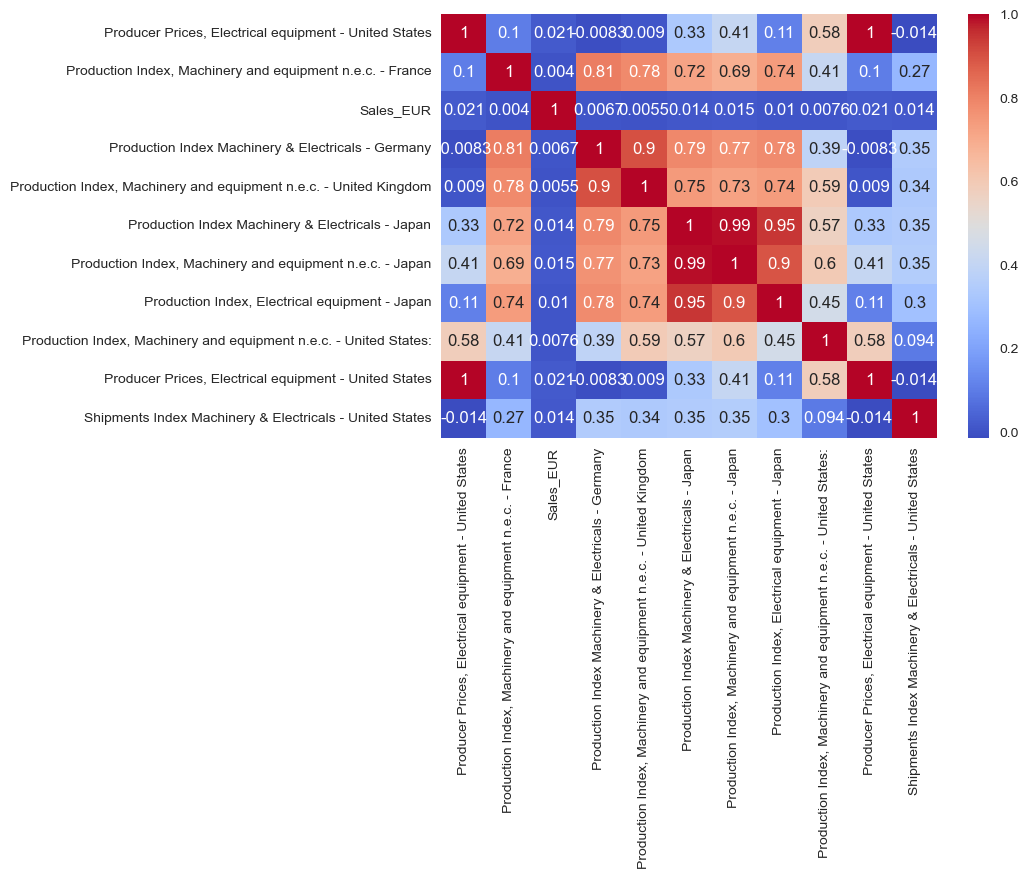

In [300]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK13].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [301]:
final_feat_GCK13.remove('Sales_EUR')
final_feat_GCK13.remove('Production Index, Machinery and equipment n.e.c. - Japan')
final_feat_GCK13.remove('Production Index Machinery & Electricals - Japan')
final_feat_GCK13.remove('Production Index, Electrical equipment - Japan')
final_feat_GCK13.remove('Producer Prices, Electrical equipment - United States')
final_feat_GCK13.remove('Production Index, Machinery and equipment n.e.c. - United Kingdom')
final_feat_GCK13

['Production Index, Machinery and equipment n.e.c. - France',
 'Production Index Machinery & Electricals - Germany',
 'Production Index, Machinery and equipment n.e.c. - United States:',
 'Producer Prices, Electrical equipment - United States',
 'Shipments Index Machinery & Electricals - United States']

In [302]:
# create a new dataframe with selected columns
pred_GCK13 = GCK13_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index, Electrical equipment - Switzerland', 'Production Index Machinery & Electricals - Germany', 'Production Index, Electrical equipment - Japan', 'Production Index, Machinery and equipment n.e.c. - United States:', 'Producer Prices, Electrical equipment - United States', 'Shipments Index Machinery & Electricals - United States']]
pred_GCK13.head()

DATE  Mapped_GCK  Sales_EUR  \
3   2018-10       13.00   27666.10   
17  2018-11       13.00   68180.00   
31  2018-12       13.00   15655.18   
45  2019-01       13.00   27198.29   
59  2019-02       13.00   32638.63   

    Production Index, Electrical equipment - Switzerland  \
3                                              112.97      
17                                             114.74      
31                                             116.50      
45                                             110.35      
59                                             104.21      

    Production Index Machinery & Electricals - Germany  \
3                                              124.23    
17                                             127.40    
31                                             120.52    
45                                             104.78    
59                                             109.60    

    Production Index, Electrical equipment - Japan  \
3                                           112.38   
17                                          111.91   
31                                          112.52   
45                                           95.96   
59                                          107.31   

    Production Index, Machinery and equipment n.e.c. - United States:  \
3                                              111.42                   
17                                             109.74                   
31                                             103.45                   
45                                             106.51                   
59                                             109.30                   

    Producer Prices, Electrical equipment - United States  \
3                                              110.70       
17                                             110.99       
31                                             111.16       
45                                             111.39       
59                                             111.56       

    Shipments Index Machinery & Electricals - United States  
3                                              127.81        
17                                             117.68        
31                                             123.28        
45                                             111.04        
59                                             116.74

In [303]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK13))
train, test = pred_GCK13[:train_size], pred_GCK13[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (4, 1, 3)  # ARIMA parameters (p, d, q)
model_arima_GCK13 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK13 = model_arima_GCK13.fit()

predictions_arima_GCK13 = model_fit_arima_GCK13.forecast(steps=len(test))
predictions_arima_GCK13

rmse_arima_GCK13 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK13))
print('Test RMSE: %.3f' % rmse_arima_GCK13)

Test RMSE: 9177.275


In [304]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [305]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  # Regressão, erro quadrático
    'eval_metric': 'rmse'  # Métrica de avaliação: erro quadrático médio
}

# Training the Model
num_rounds = 100  # Número de iterações (árvores) do modelo
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK13 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK13 = mean_squared_error(y_test, predictions_xgb_GCK13, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK13)

Test RMSE: 12454.497


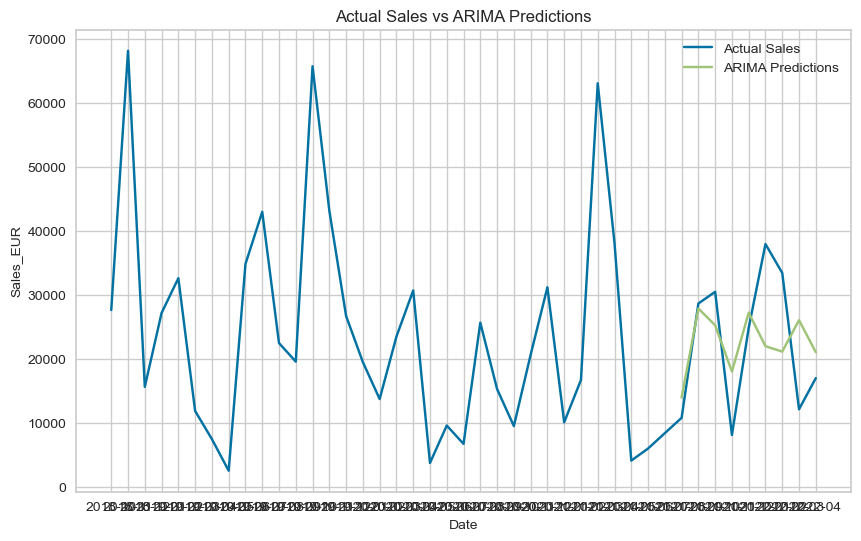

In [306]:
# GCK13

# Group your data and calculate sum of sales
sales_data = GCK13_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK13.index, predictions_arima_GCK13.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 14

In [307]:
GCK14_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 4 to 592
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

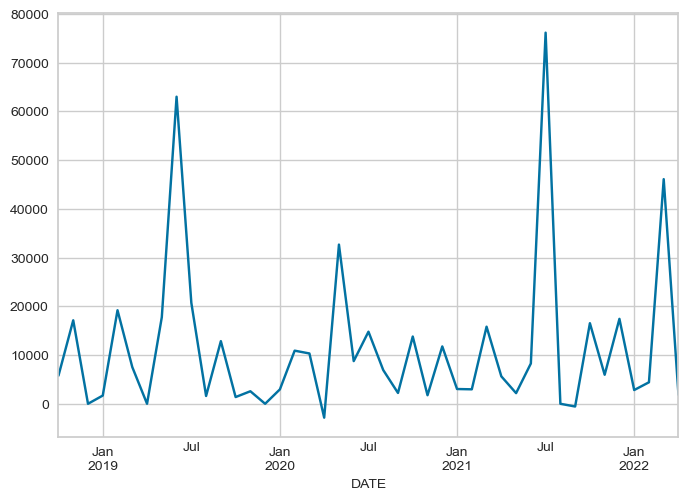

In [308]:
GCK14_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [309]:
GCK14_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [310]:
#Correlation Matrix
correlation = GCK14_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.3]['Sales_EUR']
print(correlation)

corr_feat_GCK14 = correlation.index.tolist()

corr_feat_GCK14

Sales_EUR                                                  1.00
Production Index Machinery & Electricals - Italy           0.32
Production Index, Machinery and equipment n.e.c. - Italy   0.33
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index Machinery & Electricals - Italy',
 'Production Index, Machinery and equipment n.e.c. - Italy']

In [311]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK14_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK14_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK14 = importance_df['Feature'].tolist()
dt_feat_GCK14

                                              Feature  Importance
49                                        FRA_Balance        0.46
26  Producer Prices, Electrical equipment - United...        0.26
31      Producer Prices, Electrical equipment - China        0.13
36  Production Index, Machinery and equipment n.e....        0.04
6   Shipments Index Machinery & Electricals - Germany        0.03
7    Production Index Machinery & Electricals - Italy        0.02
19                        World: Price of Base Metals        0.01
44     Production Index, Electrical equipment - Italy        0.01
4    Shipments Index Machinery & Electricals - France        0.01
22                  World: Price of Natural gas index        0.01
15  Production Index Machinery & Electricals - Uni...        0.00
35  Production Index, Machinery and equipment n.e....        0.00
43  Production Index, Electrical equipment - Unite...        0.00
52                                        JAP_Balance        0.00
11  Produc

['FRA_Balance',
 'Producer Prices, Electrical equipment - United States',
 'Producer Prices, Electrical equipment - China']

In [312]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK14_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK14_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK14 = importance_df['Feature'].tolist()
rf_feat_GCK14

                                              Feature  Importance
49                                        FRA_Balance        0.34
26  Producer Prices, Electrical equipment - United...        0.21
45     Production Index, Electrical equipment - Japan        0.04
36  Production Index, Machinery and equipment n.e....        0.04
40  Production Index, Electrical equipment - Unite...        0.03
16  Shipments Index Machinery & Electricals - Unit...        0.02
6   Shipments Index Machinery & Electricals - Germany        0.02
1    Production Index Machinery & Electricals - China        0.02
55                                         US_Balance        0.01
8     Shipments Index Machinery & Electricals - Italy        0.01
25                          United States: EUR in LCU        0.01
42  Production Index, Electrical equipment - Switz...        0.01
4    Shipments Index Machinery & Electricals - France        0.01
29     Producer Prices, Electrical equipment - France        0.01
47   Produ

['FRA_Balance', 'Producer Prices, Electrical equipment - United States']

In [313]:
#RFE

# Drop the 'Date' column
X = GCK14_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK14_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK14 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK14))

Num Features: 3
Selected Features: [False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False]
Feature Ranking: [37 35 36  5 53 51 52  2  4  1  1 18 16  9 55 21 44 13 11 28 42 30 46 43
 32 24 29 48 25 34 26 27 22 40 15  8 19 39  6 49 23 38 17 10 20 54  7 50
 56 33 45  3  1 14 47 41 12 31]
Selected Features: Index(['Production Index Machinery & Electricals - Japan',
       'Shipments Index Machinery & Electricals - Japan', 'JAP_Balance'],
      dtype='object')


In [314]:
#XGBoost

X = GCK14_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK14_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK14 = importance_df['Feature'].tolist()
xgb_feat_GCK14

                                              Feature  Importance
45     Production Index, Electrical equipment - Japan        0.39
5   Production Index Machinery & Electricals - Ger...        0.21
49                                        FRA_Balance        0.07
36  Production Index, Machinery and equipment n.e....        0.05
6   Shipments Index Machinery & Electricals - Germany        0.05
26  Producer Prices, Electrical equipment - United...        0.04
38  Production Index, Machinery and equipment n.e....        0.04
40  Production Index, Electrical equipment - Unite...        0.02
57                                    Average_Balance        0.02
24                             World: Price of Copper        0.01
1    Production Index Machinery & Electricals - China        0.01
9    Production Index Machinery & Electricals - Japan        0.01
41    Production Index, Electrical equipment - zWorld        0.01
11  Production Index Machinery & Electricals - Swi...        0.01
43  Produc

['Production Index, Electrical equipment - Japan',
 'Production Index Machinery & Electricals - Germany']

In [315]:
#Combinantion of the features selected
final_feat_GCK14 = dt_feat_GCK14
final_feat_GCK14.extend(corr_feat_GCK14)
final_feat_GCK14.extend(rfe_feat_GCK14)
final_feat_GCK14.extend(xgb_feat_GCK14)

final_feat_GCK14

['FRA_Balance',
 'Producer Prices, Electrical equipment - United States',
 'Producer Prices, Electrical equipment - China',
 'Sales_EUR',
 'Production Index Machinery & Electricals - Italy',
 'Production Index, Machinery and equipment n.e.c. - Italy',
 'Production Index Machinery & Electricals - Japan',
 'Shipments Index Machinery & Electricals - Japan',
 'JAP_Balance',
 'Production Index, Electrical equipment - Japan',
 'Production Index Machinery & Electricals - Germany']

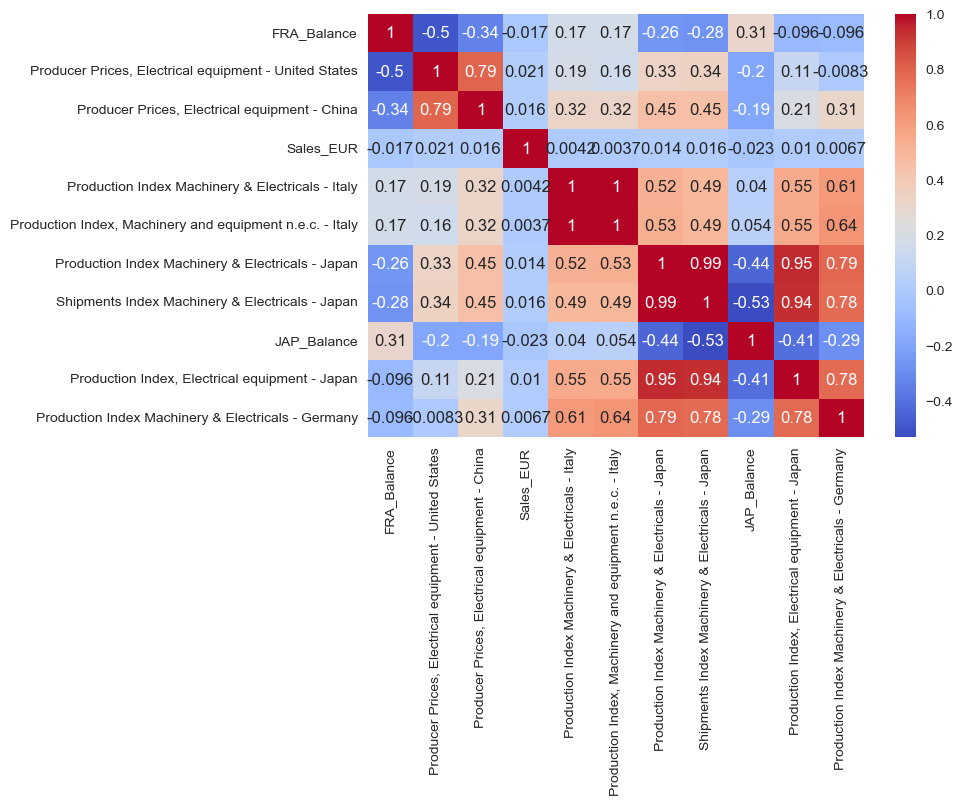

In [316]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK14].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [317]:
final_feat_GCK14.remove('Sales_EUR')
final_feat_GCK14.remove('Production Index, Machinery and equipment n.e.c. - Italy')
final_feat_GCK14.remove('Production Index Machinery & Electricals - Japan')
final_feat_GCK14.remove('Production Index, Electrical equipment - Japan')
final_feat_GCK14.remove('Production Index Machinery & Electricals - Germany')
final_feat_GCK14

['FRA_Balance',
 'Producer Prices, Electrical equipment - United States',
 'Producer Prices, Electrical equipment - China',
 'Production Index Machinery & Electricals - Italy',
 'Shipments Index Machinery & Electricals - Japan',
 'JAP_Balance']

In [318]:
# create a new dataframe with selected columns
pred_GCK14 = GCK14_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index, Machinery and equipment n.e.c. - Italy', 'Production Index Machinery & Electricals - Japan', 'Production Index, Electrical equipment - Japan', 'Producer Prices, Electrical equipment - China' ]]
pred_GCK14.head()

DATE  Mapped_GCK  Sales_EUR  \
4   2018-10       14.00    5770.00   
18  2018-11       14.00   17130.00   
32  2018-12       14.00       0.00   
46  2019-01       14.00    1686.40   
60  2019-02       14.00   19196.30   

    Production Index, Machinery and equipment n.e.c. - Italy  \
4                                              129.39          
18                                             117.99          
32                                              99.19          
46                                             106.99          
60                                             113.79          

    Production Index Machinery & Electricals - Japan  \
4                                             125.21   
18                                            122.62   
32                                            122.99   
46                                            105.51   
60                                            114.47   

    Production Index, Electrical equipment - Japan  \
4                                           112.38   
18                                          111.91   
32                                          112.52   
46                                           95.96   
60                                          107.31   

    Producer Prices, Electrical equipment - China  
4                                           96.32  
18                                          95.37  
32                                          94.99  
46                                          94.95  
60                                          94.71

In [319]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK14))
train, test = pred_GCK14[:train_size], pred_GCK14[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (2, 1, 3)  # ARIMA parameters (p, d, q)
model_arima_GCK14 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK14 = model_arima_GCK14.fit()

predictions_arima_GCK14 = model_fit_arima_GCK14.forecast(steps=len(test))
predictions_arima_GCK14

rmse_arima_GCK14 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK14))
print('Test RMSE: %.3f' % rmse_arima_GCK14)

Test RMSE: 12963.222


In [320]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [321]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK14 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK14 = mean_squared_error(y_test, predictions_xgb_GCK14, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK14)

Test RMSE: 20584.781


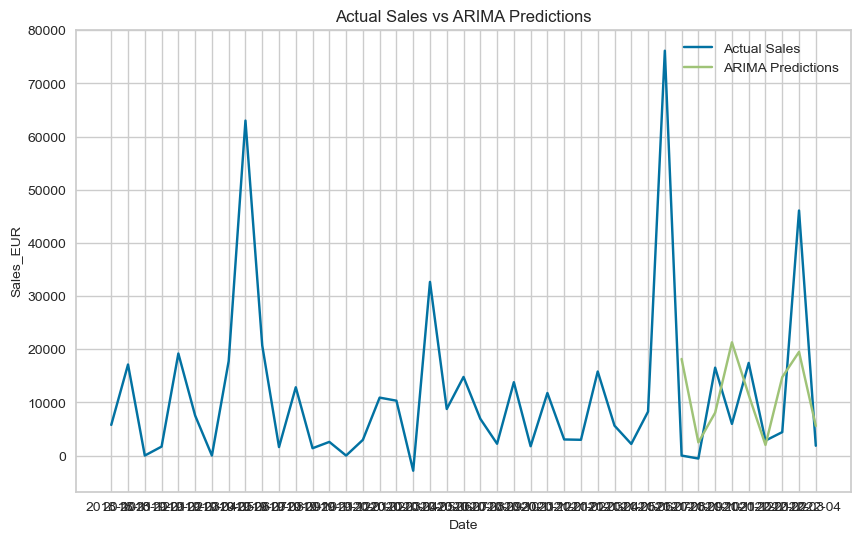

In [322]:
# GCK14

# Group your data and calculate sum of sales
sales_data = GCK14_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK14.index, predictions_arima_GCK14.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 16

In [323]:
GCK16_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 5 to 593
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

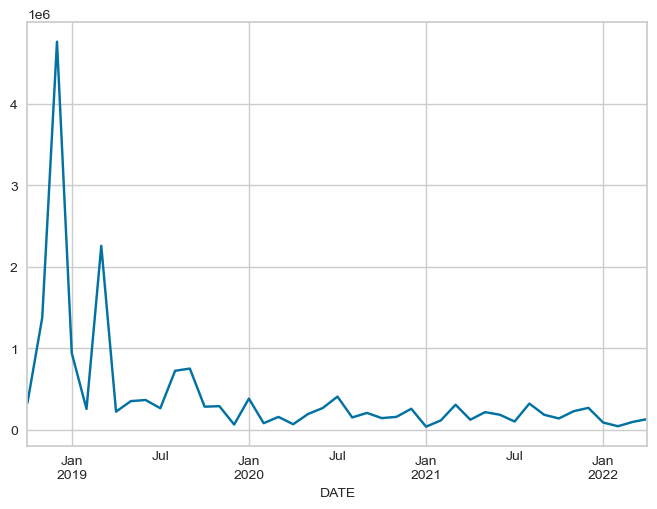

In [324]:
GCK16_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [325]:
GCK16_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [326]:
#Correlation Matrix
correlation = GCK16_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.35]['Sales_EUR']
print(correlation)

corr_feat_GCK16 = correlation.index.tolist()

corr_feat_GCK16

Sales_EUR                                                    1.00
Production Index, Machinery and equipment n.e.c. - Germany   0.43
SWI_Balance                                                  0.38
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index, Machinery and equipment n.e.c. - Germany',
 'SWI_Balance']

In [327]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK16_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK16_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK16 = importance_df['Feature'].tolist()
dt_feat_GCK16

                                              Feature  Importance
11  Production Index Machinery & Electricals - Swi...        0.75
14  Shipments Index Machinery & Electricals - Unit...        0.18
30    Producer Prices, Electrical equipment - Germany        0.02
21                 World: Price of Metals  & Minerals        0.02
50                                        GER_Balance        0.02
52                                        JAP_Balance        0.00
42  Production Index, Electrical equipment - Switz...        0.00
27  Producer Prices, Electrical equipment - United...        0.00
54                                         UK_Balance        0.00
0                                               Month        0.00
26  Producer Prices, Electrical equipment - United...        0.00
35  Production Index, Machinery and equipment n.e....        0.00
25                          United States: EUR in LCU        0.00
33  Production Index, Machinery and equipment n.e....        0.00
44     Pro

['Production Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - United Kingdom']

In [328]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK16_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK16_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK16 = importance_df['Feature'].tolist()
rf_feat_GCK16

                                              Feature  Importance
42  Production Index, Electrical equipment - Switz...        0.13
53                                        SWI_Balance        0.13
39  Production Index, Machinery and equipment n.e....        0.12
34  Production Index, Machinery and equipment n.e....        0.12
14  Shipments Index Machinery & Electricals - Unit...        0.11
11  Production Index Machinery & Electricals - Swi...        0.06
30    Producer Prices, Electrical equipment - Germany        0.05
35  Production Index, Machinery and equipment n.e....        0.04
52                                        JAP_Balance        0.04
54                                         UK_Balance        0.03
26  Producer Prices, Electrical equipment - United...        0.02
12  Shipments Index Machinery & Electricals - Swit...        0.02
43  Production Index, Electrical equipment - Unite...        0.02
0                                               Month        0.01
10    Ship

['Production Index, Electrical equipment - Switzerland',
 'SWI_Balance',
 'Production Index, Machinery and equipment n.e.c. - Germany',
 'Production Index, Machinery and equipment n.e.c. - Switzerland',
 'Shipments Index Machinery & Electricals - United Kingdom']

In [329]:
#RFE

# Drop the 'Date' column
X = GCK16_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK16_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK16 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK16))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [38 55 54  1  1  8  9  5  6  2 18 23 20 11 47 26 42 16 14 53 44 49 48 45
 50 33 39 46 43 34 51 35 27 36 21 12 24  3 31 29 28 37 22 13 25  4 32 30
 56  1 10  7 17 19 52 41 15 40]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [330]:
#XGBoost

X = GCK16_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK16_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK16 = importance_df['Feature'].tolist()
xgb_feat_GCK16

                                              Feature  Importance
11  Production Index Machinery & Electricals - Swi...        0.45
14  Shipments Index Machinery & Electricals - Unit...        0.19
30    Producer Prices, Electrical equipment - Germany        0.15
20                             World: Price of Energy        0.12
0                                               Month        0.02
27  Producer Prices, Electrical equipment - United...        0.01
26  Producer Prices, Electrical equipment - United...        0.01
22                  World: Price of Natural gas index        0.01
8     Shipments Index Machinery & Electricals - Italy        0.01
52                                        JAP_Balance        0.01
51                                        ITA_Balance        0.01
37  Production Index, Machinery and equipment n.e....        0.00
13  Production Index Machinery & Electricals - Uni...        0.00
23                 World: Price of Crude oil, average        0.00
28      Pr

['Production Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Producer Prices, Electrical equipment - Germany',
 'World: Price of Energy']

In [331]:
#Combinantion of the features selected
final_feat_GCK16 = dt_feat_GCK16
final_feat_GCK16.extend(corr_feat_GCK16)
final_feat_GCK16.extend(rfe_feat_GCK16)
final_feat_GCK16.extend(xgb_feat_GCK16)

final_feat_GCK16

['Production Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Sales_EUR',
 'Production Index, Machinery and equipment n.e.c. - Germany',
 'SWI_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Producer Prices, Electrical equipment - Germany',
 'World: Price of Energy']

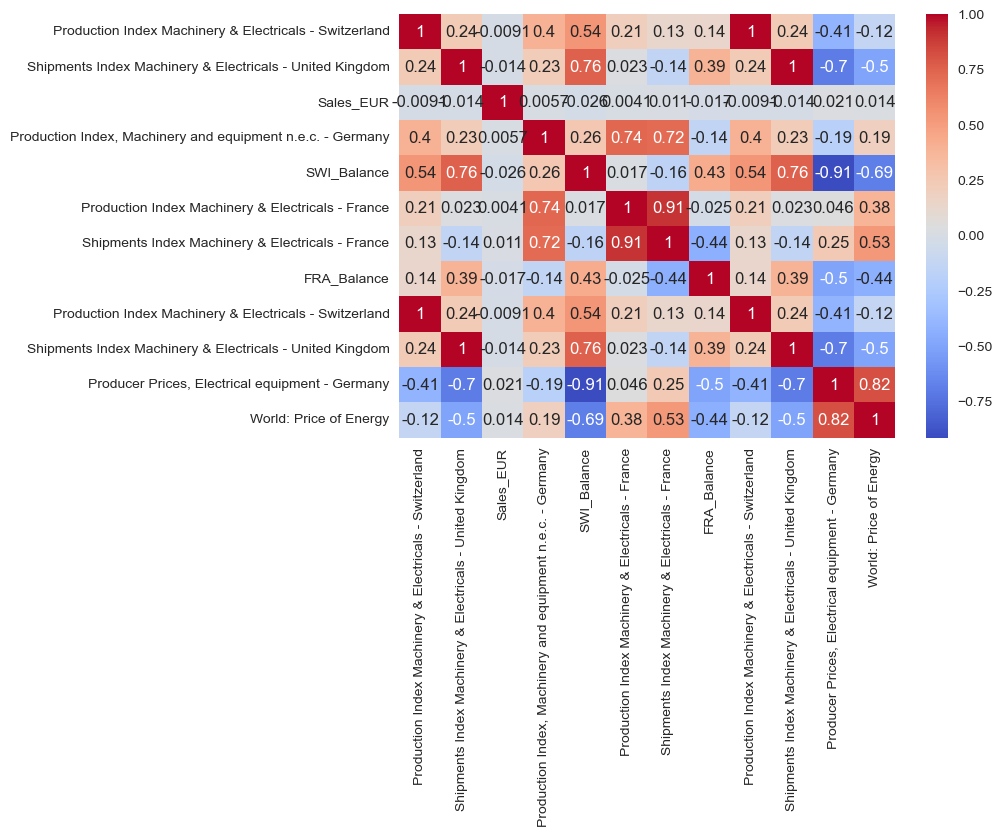

In [332]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK16].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [333]:
final_feat_GCK16.remove('Sales_EUR')
final_feat_GCK16.remove('SWI_Balance')
final_feat_GCK16.remove('Shipments Index Machinery & Electricals - United Kingdom')
final_feat_GCK16.remove('Production Index Machinery & Electricals - France')
final_feat_GCK16.remove('Producer Prices, Electrical equipment - Germany')
final_feat_GCK16

['Production Index Machinery & Electricals - Switzerland',
 'Production Index, Machinery and equipment n.e.c. - Germany',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Production Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'World: Price of Energy']

In [334]:
# create a new dataframe with selected columns
pred_GCK16 = GCK16_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index, Machinery and equipment n.e.c. - Germany', 'SWI_Balance', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'Production Index Machinery & Electricals - Switzerland', 'Shipments Index Machinery & Electricals - United Kingdom', 'World: Price of Energy']]
pred_GCK16.head()

DATE  Mapped_GCK  Sales_EUR  \
5   2018-10       16.00  333196.87   
19  2018-11       16.00 1377694.32   
33  2018-12       16.00 4762524.66   
47  2019-01       16.00  942957.19   
61  2019-02       16.00  257765.04   

    Production Index, Machinery and equipment n.e.c. - Germany  SWI_Balance  \
5                                              127.46                  4.48   
19                                             132.99                  4.59   
33                                             137.36                  4.69   
47                                             104.43                  4.46   
61                                             112.84                  4.23   

    Shipments Index Machinery & Electricals - France  FRA_Balance  \
5                                             122.45       -14.17   
19                                            115.96       -16.32   
33                                            115.13       -20.44   
47                                            108.33       -18.18   
61                                            108.94       -16.39   

    Production Index Machinery & Electricals - Switzerland  \
5                                              109.08        
19                                             112.24        
33                                             115.41        
47                                             109.62        
61                                             103.84        

    Shipments Index Machinery & Electricals - United Kingdom  \
5                                              112.32          
19                                             112.80          
33                                              94.50          
47                                              99.66          
61                                             100.59          

    World: Price of Energy  
5                   100.22  
19                   84.44  
33                   74.90  
47                   76.20  
61                   80.09

In [335]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK16))
train, test = pred_GCK16[:train_size], pred_GCK16[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (2, 1, 1)  # ARIMA parameters (p, d, q)
model_arima_GCK16 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK16 = model_arima_GCK16.fit()

predictions_arima_GCK16 = model_fit_arima_GCK16.forecast(steps=len(test))
predictions_arima_GCK16

rmse_arima_GCK16 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK16))
print('Test RMSE: %.3f' % rmse_arima_GCK16)

Test RMSE: 79452.559


In [336]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [337]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK16 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK16 = mean_squared_error(y_test, predictions_xgb_GCK16, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK16)

Test RMSE: 169275.484


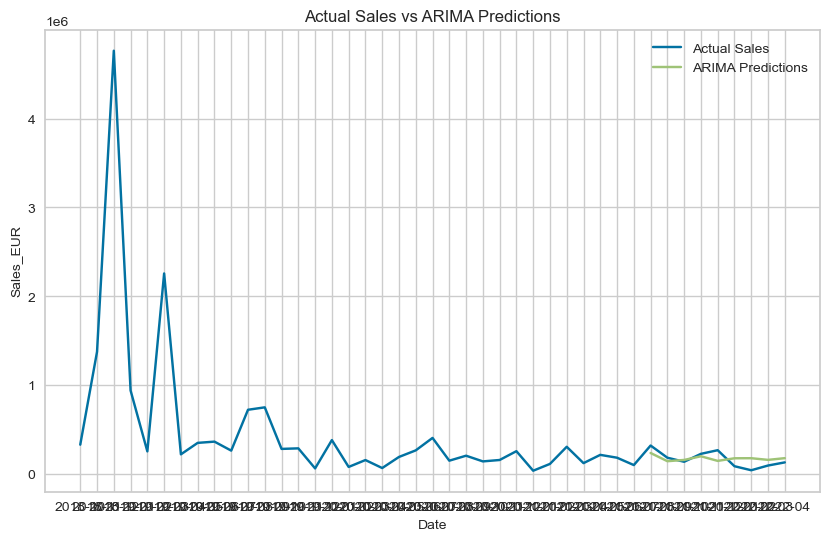

In [338]:
# GCK16

# Group your data and calculate sum of sales
sales_data = GCK16_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK16.index, predictions_arima_GCK16.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 20

In [339]:
GCK20_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 6 to 594
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

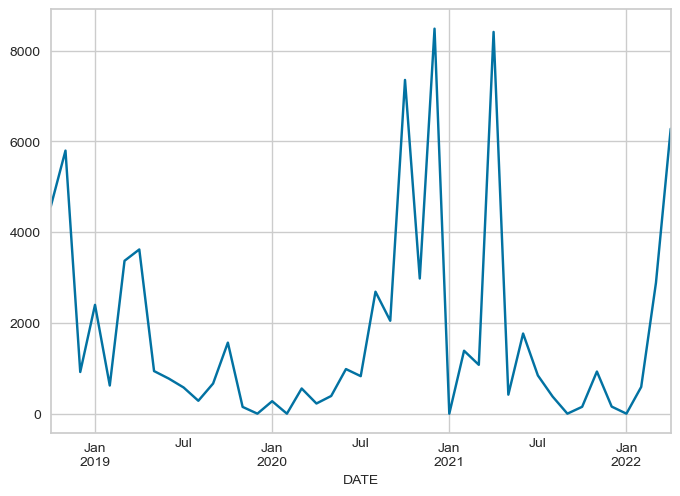

In [340]:
GCK20_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [341]:
GCK20_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [342]:
#Correlation Matrix
correlation = GCK20_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.27]['Sales_EUR']
print(correlation)

corr_feat_GCK20 = correlation.index.tolist()

corr_feat_GCK20

Sales_EUR                                                         1.00
Shipments Index Machinery & Electricals - Switzerland            -0.28
Production Index, Machinery and equipment n.e.c. - Switzerland   -0.28
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Shipments Index Machinery & Electricals - Switzerland',
 'Production Index, Machinery and equipment n.e.c. - Switzerland']

In [343]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK20_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK20_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK20 = importance_df['Feature'].tolist()
dt_feat_GCK20

                                              Feature  Importance
28      Producer Prices, Electrical equipment - Italy        0.24
37  Production Index, Machinery and equipment n.e....        0.24
4    Shipments Index Machinery & Electricals - France        0.20
14  Shipments Index Machinery & Electricals - Unit...        0.15
17  Production Index Machinery & Electricals - Europe        0.06
1    Production Index Machinery & Electricals - China        0.02
39  Production Index, Machinery and equipment n.e....        0.02
55                                         US_Balance        0.02
30    Producer Prices, Electrical equipment - Germany        0.01
9    Production Index Machinery & Electricals - Japan        0.01
57                                    Average_Balance        0.01
44     Production Index, Electrical equipment - Italy        0.01
45     Production Index, Electrical equipment - Japan        0.00
54                                         UK_Balance        0.00
25        

['Producer Prices, Electrical equipment - Italy',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'Shipments Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - United Kingdom']

In [344]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK20_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK20_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK20 = importance_df['Feature'].tolist()
rf_feat_GCK20

                                              Feature  Importance
25                          United States: EUR in LCU        0.10
46    Production Index, Electrical equipment - France        0.09
52                                        JAP_Balance        0.06
15  Production Index Machinery & Electricals - Uni...        0.06
57                                    Average_Balance        0.05
41    Production Index, Electrical equipment - zWorld        0.05
55                                         US_Balance        0.04
56                                        EUR_Balance        0.03
32  Production Index, Machinery and equipment n.e....        0.03
43  Production Index, Electrical equipment - Unite...        0.03
4    Shipments Index Machinery & Electricals - France        0.03
53                                        SWI_Balance        0.02
14  Shipments Index Machinery & Electricals - Unit...        0.02
38  Production Index, Machinery and equipment n.e....        0.02
34  Produc

['United States: EUR in LCU']

In [345]:
#RFE

# Drop the 'Date' column
X = GCK20_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK20_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK20 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK20))

Num Features: 3
Selected Features: [False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False]
Feature Ranking: [34 49 55  3  4  9 10  7  5  1  1 18 16 36 43 21 44 12 11 38 41 39 52 37
 48 28 46 42 32 29 30 33 22 40 15 50 19 47 24 26 23 51 17 54 20 53 25 27
 56  2  8  6  1 14 35 45 13 31]
Selected Features: Index(['Production Index Machinery & Electricals - Japan',
       'Shipments Index Machinery & Electricals - Japan', 'JAP_Balance'],
      dtype='object')


In [346]:
#XGBoost

X = GCK20_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK20_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK20 = importance_df['Feature'].tolist()
xgb_feat_GCK20

                                              Feature  Importance
37  Production Index, Machinery and equipment n.e....        0.53
28      Producer Prices, Electrical equipment - Italy        0.26
14  Shipments Index Machinery & Electricals - Unit...        0.07
4    Shipments Index Machinery & Electricals - France        0.03
50                                        GER_Balance        0.02
55                                         US_Balance        0.01
25                          United States: EUR in LCU        0.01
43  Production Index, Electrical equipment - Unite...        0.01
11  Production Index Machinery & Electricals - Swi...        0.01
45     Production Index, Electrical equipment - Japan        0.01
9    Production Index Machinery & Electricals - Japan        0.01
1    Production Index Machinery & Electricals - China        0.00
27  Producer Prices, Electrical equipment - United...        0.00
36  Production Index, Machinery and equipment n.e....        0.00
15  Produc

['Production Index, Machinery and equipment n.e.c. - Japan',
 'Producer Prices, Electrical equipment - Italy']

In [347]:
#Combinantion of the features selected
final_feat_GCK20 = dt_feat_GCK20
final_feat_GCK20.extend(corr_feat_GCK20)
final_feat_GCK20.extend(rfe_feat_GCK20)
final_feat_GCK20.extend(xgb_feat_GCK20)

final_feat_GCK20

['Producer Prices, Electrical equipment - Italy',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'Shipments Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Sales_EUR',
 'Shipments Index Machinery & Electricals - Switzerland',
 'Production Index, Machinery and equipment n.e.c. - Switzerland',
 'Production Index Machinery & Electricals - Japan',
 'Shipments Index Machinery & Electricals - Japan',
 'JAP_Balance',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'Producer Prices, Electrical equipment - Italy']

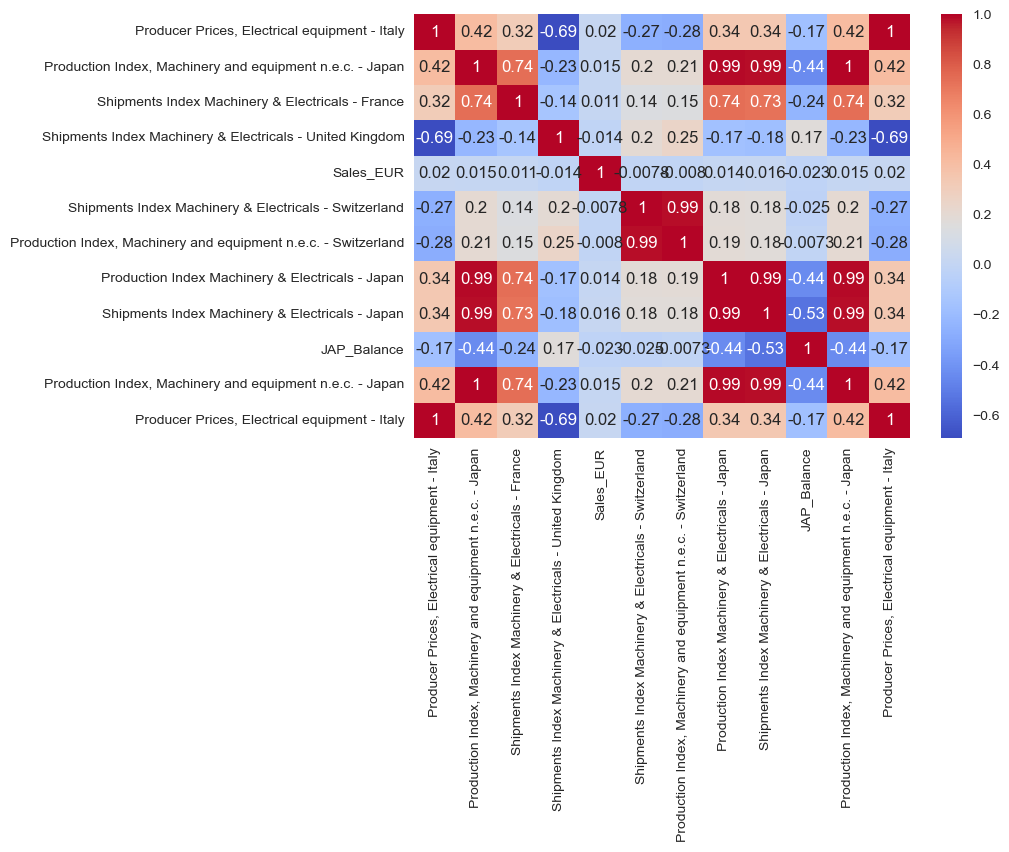

In [348]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK20].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [349]:
final_feat_GCK20.remove('Sales_EUR')
final_feat_GCK20.remove('Production Index, Machinery and equipment n.e.c. - Switzerland')
final_feat_GCK20.remove('Production Index Machinery & Electricals - Japan')
final_feat_GCK20.remove('Production Index, Machinery and equipment n.e.c. - Japan')
final_feat_GCK20.remove('Production Index, Machinery and equipment n.e.c. - Japan')
final_feat_GCK20.remove('Producer Prices, Electrical equipment - Italy')
final_feat_GCK20

['Shipments Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - United Kingdom',
 'Shipments Index Machinery & Electricals - Switzerland',
 'Shipments Index Machinery & Electricals - Japan',
 'JAP_Balance',
 'Producer Prices, Electrical equipment - Italy']

In [350]:
# create a new dataframe with selected columns
pred_GCK20 = GCK20_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Shipments Index Machinery & Electricals - France', 'Shipments Index Machinery & Electricals - United Kingdom', 'Shipments Index Machinery & Electricals - Switzerland', 'Shipments Index Machinery & Electricals - Japan', 'JAP_Balance', 'Producer Prices, Electrical equipment - Italy']]
pred_GCK20.head()

DATE  Mapped_GCK  Sales_EUR  \
6   2018-10       20.00    4563.14   
20  2018-11       20.00    5798.14   
34  2018-12       20.00     918.65   
48  2019-01       20.00    2398.04   
62  2019-02       20.00     620.66   

    Shipments Index Machinery & Electricals - France  \
6                                             122.45   
20                                            115.96   
34                                            115.13   
48                                            108.33   
62                                            108.94   

    Shipments Index Machinery & Electricals - United Kingdom  \
6                                              112.32          
20                                             112.80          
34                                              94.50          
48                                              99.66          
62                                             100.59          

    Shipments Index Machinery & Electricals - Switzerland  \
6                                              104.59       
20                                             107.66       
34                                             110.72       
48                                             105.16       
62                                              99.61       

    Shipments Index Machinery & Electricals - Japan  JAP_Balance  \
6                                            124.79         0.42   
20                                           123.29        -0.67   
34                                           124.51        -1.52   
48                                           106.30        -0.79   
62                                           115.00        -0.53   

    Producer Prices, Electrical equipment - Italy  
6                                          105.30  
20                                         105.30  
34                                         105.30  
48                                         105.51  
62                                         105.30

In [351]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK20))
train, test = pred_GCK20[:train_size], pred_GCK20[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (1, 2, 0)  # ARIMA parameters (p, d, q)
model_arima_GCK20 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK20 = model_arima_GCK20.fit()

predictions_arima_GCK20 = model_fit_arima_GCK20.forecast(steps=len(test))
predictions_arima_GCK20

rmse_arima_GCK20 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK20))
print('Test RMSE: %.3f' % rmse_arima_GCK20)

Test RMSE: 1891.819


In [352]:
## grid search

#import itertools

## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)

## Perform grid search
#best_rmse = float('inf')
#best_order = None

#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [353]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK20 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK20 = mean_squared_error(y_test, predictions_xgb_GCK20, squared=False) 
print('Test RMSE: %.3f' % rmse_xgb_GCK20)

Test RMSE: 2550.981


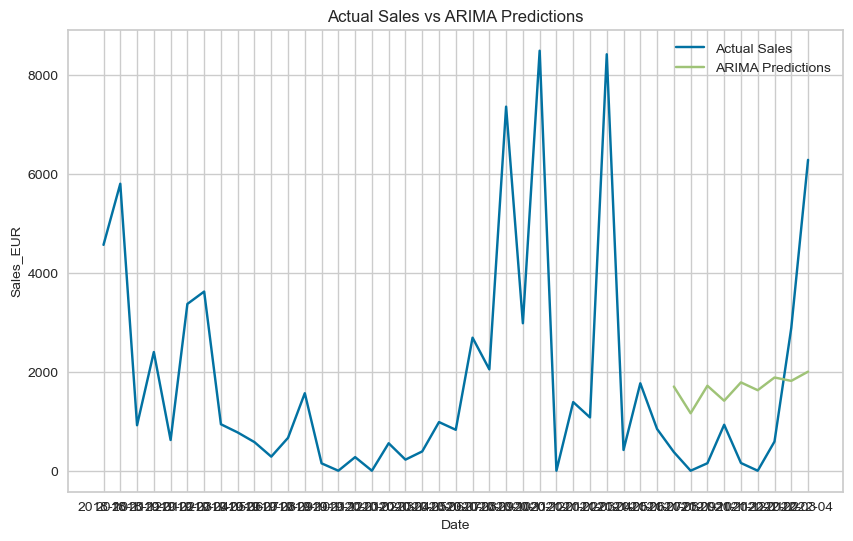

In [354]:
# GCK20

# Group your data and calculate sum of sales
sales_data = GCK20_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK20.index, predictions_arima_GCK20.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

# GCK 36

In [355]:
GCK36_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 8 to 596
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

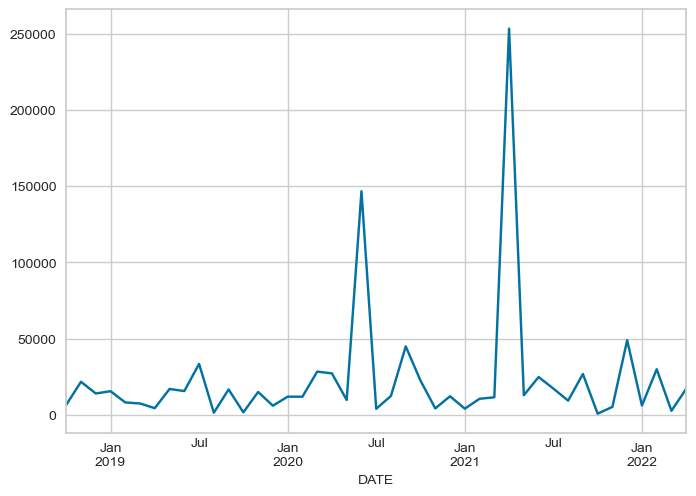

In [356]:
GCK36_df.groupby('DATE')['Sales_EUR'].sum().plot()

In [357]:
GCK36_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

In [358]:
#Correlation Matrix
correlation = GCK36_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.15]['Sales_EUR']
print(correlation)

corr_feat_GCK36 = correlation.index.tolist()

corr_feat_GCK36

Sales_EUR                                           1.00
Production Index Machinery & Electricals - China    0.21
Shipments Index Machinery & Electricals - China     0.21
Producer Prices, Electrical equipment - China      -0.15
Name: Sales_EUR, dtype: float64


['Sales_EUR',
 'Production Index Machinery & Electricals - China',
 'Shipments Index Machinery & Electricals - China',
 'Producer Prices, Electrical equipment - China']

In [359]:
# DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK36_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK36_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK36 = importance_df['Feature'].tolist()
dt_feat_GCK36

                                              Feature  Importance
22                  World: Price of Natural gas index        0.78
15  Production Index Machinery & Electricals - Uni...        0.15
6   Shipments Index Machinery & Electricals - Germany        0.02
20                             World: Price of Energy        0.01
14  Shipments Index Machinery & Electricals - Unit...        0.01
49                                        FRA_Balance        0.01
24                             World: Price of Copper        0.00
10    Shipments Index Machinery & Electricals - Japan        0.00
57                                    Average_Balance        0.00
47   Production Index, Electrical equipment - Germany        0.00
46    Production Index, Electrical equipment - France        0.00
9    Production Index Machinery & Electricals - Japan        0.00
11  Production Index Machinery & Electricals - Swi...        0.00
45     Production Index, Electrical equipment - Japan        0.00
25        

['World: Price of Natural gas index',
 'Production Index Machinery & Electricals - United States']

In [360]:
# RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK36_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK36_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK36 = importance_df['Feature'].tolist()
rf_feat_GCK36

                                              Feature  Importance
22                  World: Price of Natural gas index        0.17
15  Production Index Machinery & Electricals - Uni...        0.07
11  Production Index Machinery & Electricals - Swi...        0.07
32  Production Index, Machinery and equipment n.e....        0.05
12  Shipments Index Machinery & Electricals - Swit...        0.05
25                          United States: EUR in LCU        0.04
52                                        JAP_Balance        0.04
34  Production Index, Machinery and equipment n.e....        0.04
1    Production Index Machinery & Electricals - China        0.04
2     Shipments Index Machinery & Electricals - China        0.03
10    Shipments Index Machinery & Electricals - Japan        0.02
45     Production Index, Electrical equipment - Japan        0.02
27  Producer Prices, Electrical equipment - United...        0.02
26  Producer Prices, Electrical equipment - United...        0.02
51        

['World: Price of Natural gas index']

In [361]:
#RFE

# Drop the 'Date' column
X = GCK36_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK36_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK36 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK36))

Num Features: 3
Selected Features: [False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [31 43 53  1  1 45 24 30 38 52 27  5  6 49 39 48 16  4  2 20 36 19 37 35
 46  8 12 40 10  9 28 11 17 44 25 33 23 51 22 14 32 42 55 41 29 26 50 54
 56  1 18 47 34  7 21 15  3 13]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


In [362]:
#XGBoost

X = GCK36_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK36_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK36 = importance_df['Feature'].tolist()
xgb_feat_GCK36

                                              Feature  Importance
12  Shipments Index Machinery & Electricals - Swit...        0.40
25                          United States: EUR in LCU        0.28
53                                        SWI_Balance        0.25
49                                        FRA_Balance        0.02
4    Shipments Index Machinery & Electricals - France        0.01
1    Production Index Machinery & Electricals - China        0.01
22                  World: Price of Natural gas index        0.01
42  Production Index, Electrical equipment - Switz...        0.00
15  Production Index Machinery & Electricals - Uni...        0.00
16  Shipments Index Machinery & Electricals - Unit...        0.00
45     Production Index, Electrical equipment - Japan        0.00
11  Production Index Machinery & Electricals - Swi...        0.00
39  Production Index, Machinery and equipment n.e....        0.00
5   Production Index Machinery & Electricals - Ger...        0.00
20        

['Shipments Index Machinery & Electricals - Switzerland',
 'United States: EUR in LCU',
 'SWI_Balance']

In [363]:
#Combinantion of the features selected
final_feat_GCK36 = dt_feat_GCK36
final_feat_GCK36.extend(corr_feat_GCK36)
final_feat_GCK36.extend(rfe_feat_GCK36)
final_feat_GCK36.extend(xgb_feat_GCK36)

final_feat_GCK36

['World: Price of Natural gas index',
 'Production Index Machinery & Electricals - United States',
 'Sales_EUR',
 'Production Index Machinery & Electricals - China',
 'Shipments Index Machinery & Electricals - China',
 'Producer Prices, Electrical equipment - China',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Shipments Index Machinery & Electricals - Switzerland',
 'United States: EUR in LCU',
 'SWI_Balance']

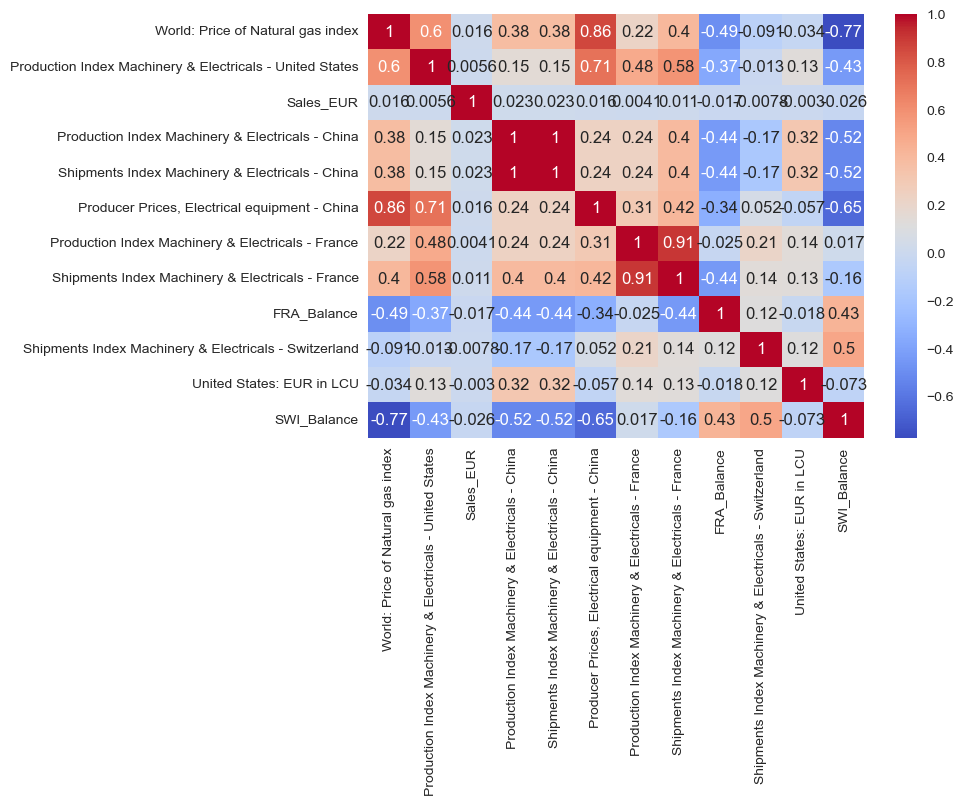

In [364]:
#Check their correlation and drop the less important correlated ones

correlation = final_dataset[final_feat_GCK36].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [365]:
final_feat_GCK36.remove('Sales_EUR')
final_feat_GCK36.remove('Production Index Machinery & Electricals - China')
final_feat_GCK36.remove('Production Index Machinery & Electricals - France')
final_feat_GCK36.remove('World: Price of Natural gas index') 
final_feat_GCK36

['Production Index Machinery & Electricals - United States',
 'Shipments Index Machinery & Electricals - China',
 'Producer Prices, Electrical equipment - China',
 'Shipments Index Machinery & Electricals - France',
 'FRA_Balance',
 'Shipments Index Machinery & Electricals - Switzerland',
 'United States: EUR in LCU',
 'SWI_Balance']

In [366]:
# create a new dataframe with selected columns
pred_GCK36 = GCK36_df[['DATE', 'Mapped_GCK', 'Sales_EUR', 'JAP_Balance', 'Production Index Machinery & Electricals - United States', 'Producer Prices, Electrical equipment - China', 'Shipments Index Machinery & Electricals - China', 'Shipments Index Machinery & Electricals - France', 'FRA_Balance', 'Shipments Index Machinery & Electricals - Switzerland', 'United States: EUR in LCU', 'SWI_Balance']]
pred_GCK36.head()

DATE  Mapped_GCK  Sales_EUR  JAP_Balance  \
8   2018-10       36.00    6474.60         0.42   
22  2018-11       36.00   21617.61        -0.67   
36  2018-12       36.00   13924.52        -1.52   
50  2019-01       36.00   15444.39        -0.79   
64  2019-02       36.00    8051.15        -0.53   

    Production Index Machinery & Electricals - United States  \
8                                              111.90          
22                                             110.88          
36                                             106.26          
50                                             107.51          
64                                             109.82          

    Producer Prices, Electrical equipment - China  \
8                                           96.32   
22                                          95.37   
36                                          94.99   
50                                          94.95   
64                                          94.71   

    Shipments Index Machinery & Electricals - China  \
8                                            211.96   
22                                           220.52   
36                                           241.85   
50                                           175.67   
64                                           175.67   

    Shipments Index Machinery & Electricals - France  FRA_Balance  \
8                                             122.45       -14.17   
22                                            115.96       -16.32   
36                                            115.13       -20.44   
50                                            108.33       -18.18   
64                                            108.94       -16.39   

    Shipments Index Machinery & Electricals - Switzerland  \
8                                              104.59       
22                                             107.66       
36                                             110.72       
50                                             105.16       
64                                              99.61       

    United States: EUR in LCU  SWI_Balance  
8                        1.15         4.48  
22                       1.14         4.59  
36                       1.14         4.69  
50                       1.14         4.46  
64                       1.14         4.23

In [367]:
# ARIMA model

# pred_GCKx -> train/test
train_size = int(0.8 * len(pred_GCK36))
train, test = pred_GCK36[:train_size], pred_GCK36[train_size:]

# Fit ARIMA model - (ARIMA - Auto Regressive Integrated Moving Average)
order = (0, 1, 0)  # ARIMA parameters (p, d, q)
model_arima_GCK36 = ARIMA(train['Sales_EUR'], order=order)
model_fit_arima_GCK36 = model_arima_GCK36.fit()

predictions_arima_GCK36 = model_fit_arima_GCK36.forecast(steps=len(test))
predictions_arima_GCK36

rmse_arima_GCK36 = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions_arima_GCK36))
print('Test RMSE: %.3f' % rmse_arima_GCK36)

Test RMSE: 15198.773


In [368]:
## grid search
#
#import itertools
#
## Define ranges for p, d, and q
#p_range = range(0, 10)
#d_range = range(0, 3)
#q_range = range(0, 3)
#
## Perform grid search
#best_rmse = float('inf')
#best_order = None
#
#for order in itertools.product(p_range, d_range, q_range):
#    try:
#        # Fit ARIMA model
#        model = ARIMA(train['Sales_EUR'], order=order)
#        model_fit = model.fit()
#
#        # Make predictions
#        predictions = model_fit.forecast(steps=len(test))
#
#        # Calculate RMSE
#        rmse = np.sqrt(mean_squared_error(test['Sales_EUR'], predictions))
#
#        # Update best parameters if RMSE improves
#        if rmse < best_rmse:
#            best_rmse = rmse
#            best_order = order
#    except:
#        continue
#
#print('Best RMSE:', best_rmse)
#print('Best order:', best_order)

In [369]:
# XGB

import xgboost as xgb

from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix Objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Defining Model Parameters
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}

# Training the Model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

# Making Predictions
predictions_xgb_GCK36 = model.predict(dtest)

# Calculating RMSE
rmse_xgb_GCK36 = mean_squared_error(y_test, predictions_xgb_GCK36, squared=False)  
print('Test RMSE: %.3f' % rmse_xgb_GCK36)

Test RMSE: 46863.321


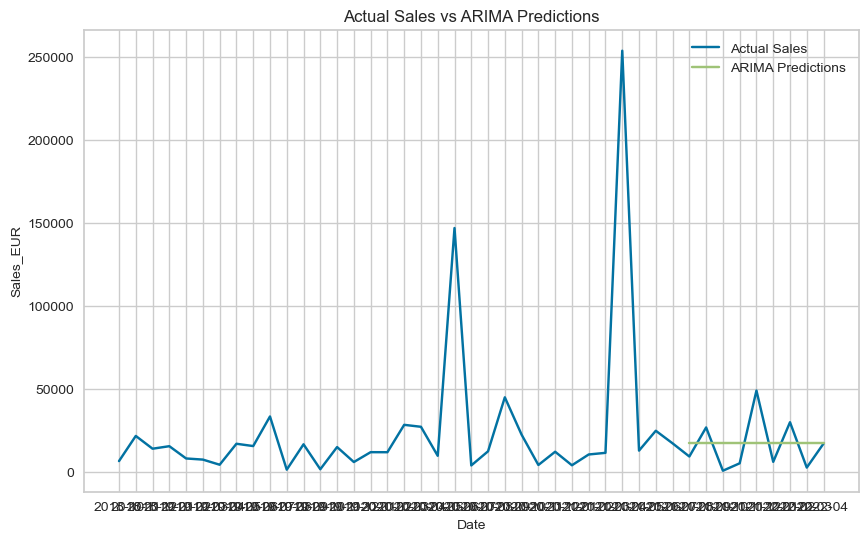

In [370]:
# GCK36

# Group your data and calculate sum of sales
sales_data = GCK36_df.groupby('DATE')['Sales_EUR'].sum()

# Convert PeriodIndex to string representation of dates
sales_data.index = sales_data.index.astype(str)

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot actual sales data
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')

# Plot ARIMA predictions
plt.plot(predictions_arima_GCK36.index, predictions_arima_GCK36.values, label='ARIMA Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales_EUR')
plt.title('Actual Sales vs ARIMA Predictions')

# Add legend
plt.legend()
# Show the plot
plt.show()

### Total RMSE values

In [371]:
# ARIMA
rmse_arima_values = (rmse_arima_GCK1, rmse_arima_GCK3, rmse_arima_GCK4, rmse_arima_GCK5, rmse_arima_GCK6, rmse_arima_GCK8, rmse_arima_GCK9, rmse_arima_GCK11, rmse_arima_GCK12, rmse_arima_GCK13, rmse_arima_GCK14, rmse_arima_GCK16, rmse_arima_GCK20, rmse_arima_GCK36)
sum_rmse_arima = sum(rmse_arima_values)
print("Total rmse arima: ", sum_rmse_arima)

Total rmse arima:  11161235.307906928


In [372]:
# XGBOOST
rmse_xgb_values = (rmse_xgb_GCK1, rmse_xgb_GCK3, rmse_xgb_GCK4, rmse_xgb_GCK5, rmse_xgb_GCK6, rmse_xgb_GCK8, rmse_xgb_GCK9, rmse_xgb_GCK11, rmse_xgb_GCK12, rmse_xgb_GCK13, rmse_xgb_GCK14, rmse_xgb_GCK16, rmse_xgb_GCK20, rmse_xgb_GCK36)
sum_rmse_xgb = sum(rmse_xgb_values)
print("Total rmse xgboost: ", sum_rmse_xgb)

Total rmse xgboost:  14450659.850150261


## Predictions test set template

In [373]:
test_df.head()

Month Year Mapped_GCK  Sales_EUR
0 2022-05-01         #3        NaN
1 2022-06-01         #3        NaN
2 2022-07-01         #3        NaN
3 2022-08-01         #3        NaN
4 2022-09-01         #3        NaN

In [374]:
test_df['Month Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 140 entries, 0 to 139
Series name: Month Year
Non-Null Count  Dtype         
--------------  -----         
140 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB


In [375]:
test_df['Month Year'] = test_df['Month Year'].dt.to_period('M')

In [376]:
test_df.head()

Month Year Mapped_GCK  Sales_EUR
0    2022-05         #3        NaN
1    2022-06         #3        NaN
2    2022-07         #3        NaN
3    2022-08         #3        NaN
4    2022-09         #3        NaN

In [377]:
test_df.tail()

Month Year Mapped_GCK  Sales_EUR
135    2022-10         #1        NaN
136    2022-11         #1        NaN
137    2022-12         #1        NaN
138    2023-01         #1        NaN
139    2023-02         #1        NaN

In [378]:
# test_df divided by Mapped_GCK 
groups = test_df.groupby('Mapped_GCK')
divided_df = {}
for name_group, group in groups:
    divided_df[name_group] = group

test_df_GCK1 = divided_df['#1']
test_df_GCK3 = divided_df['#3']
test_df_GCK4 = divided_df['#4']
test_df_GCK5 = divided_df['#5']
test_df_GCK6 = divided_df['#6']
test_df_GCK8 = divided_df['#8']
test_df_GCK9 = divided_df['#9']
test_df_GCK11 = divided_df['#11']
test_df_GCK12 = divided_df['#12']
test_df_GCK13 = divided_df['#13']
test_df_GCK14 = divided_df['#14']
test_df_GCK16 = divided_df['#16']
test_df_GCK20 = divided_df['#20']
test_df_GCK36 = divided_df['#36']

test_df_GCK36

Month Year Mapped_GCK  Sales_EUR
120    2022-05        #36        NaN
121    2022-06        #36        NaN
122    2022-07        #36        NaN
123    2022-08        #36        NaN
124    2022-09        #36        NaN
125    2022-10        #36        NaN
126    2022-11        #36        NaN
127    2022-12        #36        NaN
128    2023-01        #36        NaN
129    2023-02        #36        NaN

### Predictions for each group

In [379]:
# GCK1 
train, test = pred_GCK1, test_df_GCK1 

final_predictions_GCK1 = model_fit_arima_GCK1.forecast(steps=len(test_df_GCK1))
final_predictions_GCK1

test_df_GCK1['Sales_EUR'] = final_predictions_GCK1.values
test_df_GCK1

Month Year Mapped_GCK   Sales_EUR
130    2022-05         #1 36464422.54
131    2022-06         #1 38578216.32
132    2022-07         #1 38184943.63
133    2022-08         #1 37769132.72
134    2022-09         #1 36588283.18
135    2022-10         #1 36839158.30
136    2022-11         #1 37553238.90
137    2022-12         #1 38258098.76
138    2023-01         #1 37927588.94
139    2023-02         #1 37198823.36

In [380]:
# GCK3
train, test = pred_GCK3, test_df_GCK3

final_predictions_GCK3 = model_fit_arima_GCK3.forecast(steps=len(test_df_GCK3))
final_predictions_GCK3

test_df_GCK3['Sales_EUR'] = final_predictions_GCK3.values
test_df_GCK3

Month Year Mapped_GCK   Sales_EUR
0    2022-05         #3 13476017.81
1    2022-06         #3 13406887.86
2    2022-07         #3 13141219.50
3    2022-08         #3 13894592.16
4    2022-09         #3 13942008.69
5    2022-10         #3 14051286.47
6    2022-11         #3 14169202.45
7    2022-12         #3 14286887.54
8    2023-01         #3 14551142.86
9    2023-02         #3 14680966.56

In [381]:
# GCK4
train, test = pred_GCK4, test_df_GCK4
final_predictions_GCK4 = model_fit_arima_GCK4.forecast(steps=len(test_df_GCK4))
 
final_predictions_GCK4
test_df_GCK4['Sales_EUR'] = final_predictions_GCK4.values
 
test_df_GCK4

Month Year Mapped_GCK  Sales_EUR
10    2022-05         #4  381125.57
11    2022-06         #4  381657.09
12    2022-07         #4  381657.09
13    2022-08         #4  381657.09
14    2022-09         #4  381657.09
15    2022-10         #4  381657.09
16    2022-11         #4  381657.09
17    2022-12         #4  381657.09
18    2023-01         #4  381657.09
19    2023-02         #4  381657.09

In [382]:
# GCK5
train, test = pred_GCK5, test_df_GCK5
final_predictions_GCK5 = model_fit_arima_GCK5.forecast(steps=len(test_df_GCK5))
 
final_predictions_GCK5
test_df_GCK5['Sales_EUR'] = final_predictions_GCK5.values
 
test_df_GCK5

Month Year Mapped_GCK   Sales_EUR
20    2022-05         #5 12369488.33
21    2022-06         #5 10221937.76
22    2022-07         #5  8534722.31
23    2022-08         #5 12158306.28
24    2022-09         #5 10733959.76
25    2022-10         #5 10233004.58
26    2022-11         #5 11416040.96
27    2022-12         #5 11567609.71
28    2023-01         #5  9868488.88
29    2023-02         #5 12948501.86

In [383]:
# GCK6
train, test = pred_GCK6, test_df_GCK6
final_predictions_GCK6 = model_fit_arima_GCK6.forecast(steps=len(test_df_GCK6))
 
final_predictions_GCK6
test_df_GCK6['Sales_EUR'] = final_predictions_GCK6.values
 
test_df_GCK6

Month Year Mapped_GCK  Sales_EUR
30    2022-05         #6  442316.14
31    2022-06         #6  436499.87
32    2022-07         #6  391014.17
33    2022-08         #6  376260.35
34    2022-09         #6  337698.56
35    2022-10         #6  317580.79
36    2022-11         #6  283174.45
37    2022-12         #6  259837.46
38    2023-01         #6  227925.05
39    2023-02         #6  202656.01

In [384]:
# GCK8
train, test = pred_GCK8, test_df_GCK8
final_predictions_GCK8 = model_fit_arima_GCK8.forecast(steps=len(test_df_GCK8))
 
final_predictions_GCK8
test_df_GCK8['Sales_EUR'] = final_predictions_GCK8.values
 
test_df_GCK8

Month Year Mapped_GCK  Sales_EUR
40    2022-05         #8 1257304.98
41    2022-06         #8 1310506.09
42    2022-07         #8 1172745.49
43    2022-08         #8 1120979.59
44    2022-09         #8 1415873.51
45    2022-10         #8 1400899.86
46    2022-11         #8 1463636.78
47    2022-12         #8 1462922.49
48    2023-01         #8 1394455.38
49    2023-02         #8 1464231.92

In [385]:
# GCK9
train, test = pred_GCK9, test_df_GCK9
final_predictions_GCK9 = model_fit_arima_GCK9.forecast(steps=len(test_df_GCK9))
 
final_predictions_GCK9
test_df_GCK9['Sales_EUR'] = final_predictions_GCK9.values
 
test_df_GCK9

Month Year Mapped_GCK  Sales_EUR
50    2022-05         #9    4628.42
51    2022-06         #9   10660.97
52    2022-07         #9    4128.18
53    2022-08         #9   10479.66
54    2022-09         #9    5029.05
55    2022-10         #9    9809.71
56    2022-11         #9    5897.34
57    2022-12         #9    8877.96
58    2023-01         #9    6690.10
59    2023-02         #9    8134.49

In [386]:
# GCK11
train, test = pred_GCK11, test_df_GCK11
final_predictions_GCK11 = model_fit_arima_GCK11.forecast(steps=len(test_df_GCK11))
 
final_predictions_GCK11
test_df_GCK11['Sales_EUR'] = final_predictions_GCK11.values
 
test_df_GCK11

Month Year Mapped_GCK  Sales_EUR
60    2022-05        #11 1777715.61
61    2022-06        #11 1956886.01
62    2022-07        #11 1889354.56
63    2022-08        #11 1914807.97
64    2022-09        #11 1905214.27
65    2022-10        #11 1908830.25
66    2022-11        #11 1907467.35
67    2022-12        #11 1907981.04
68    2023-01        #11 1907787.42
69    2023-02        #11 1907860.40

In [387]:
# GCK12
train, test = pred_GCK12, test_df_GCK12
final_predictions_GCK12 = model_fit_arima_GCK12.forecast(steps=len(test_df_GCK12))
 
final_predictions_GCK12
test_df_GCK12['Sales_EUR'] = final_predictions_GCK12.values
 
test_df_GCK12

Month Year Mapped_GCK  Sales_EUR
70    2022-05        #12  316339.13
71    2022-06        #12  307009.28
72    2022-07        #12  292330.30
73    2022-08        #12  280294.95
74    2022-09        #12  269234.06
75    2022-10        #12  259315.70
76    2022-11        #12  250376.25
77    2022-12        #12  242327.72
78    2023-01        #12  235079.69
79    2023-02        #12  228552.86

In [388]:
# GCK13
train, test = pred_GCK13, test_df_GCK13
final_predictions_GCK13 = model_fit_arima_GCK13.forecast(steps=len(test_df_GCK13))
 
final_predictions_GCK13
test_df_GCK13['Sales_EUR'] = final_predictions_GCK13.values
 
test_df_GCK13

Month Year Mapped_GCK  Sales_EUR
80    2022-05        #13   13978.99
81    2022-06        #13   27900.31
82    2022-07        #13   25281.08
83    2022-08        #13   18049.01
84    2022-09        #13   27245.12
85    2022-10        #13   22008.37
86    2022-11        #13   21167.47
87    2022-12        #13   26080.73
88    2023-01        #13   21068.63
89    2023-02        #13   23130.38

In [389]:
# GCK14
train, test = pred_GCK14, test_df_GCK14
final_predictions_GCK14 = model_fit_arima_GCK14.forecast(steps=len(test_df_GCK14))
 
final_predictions_GCK14
test_df_GCK14['Sales_EUR'] = final_predictions_GCK14.values
 
test_df_GCK14

Month Year Mapped_GCK  Sales_EUR
90    2022-05        #14   18174.32
91    2022-06        #14    2479.51
92    2022-07        #14    8064.48
93    2022-08        #14   21311.95
94    2022-09        #14   11413.76
95    2022-10        #14    1996.06
96    2022-11        #14   14753.97
97    2022-12        #14   19502.27
98    2023-01        #14    5573.17
99    2023-02        #14    5730.10

In [390]:
# GCK 16
train, test = pred_GCK16, test_df_GCK16
final_predictions_GCK16 = model_fit_arima_GCK16.forecast(steps=len(test_df_GCK16))
 
final_predictions_GCK16
test_df_GCK16['Sales_EUR'] = final_predictions_GCK16.values
 
test_df_GCK16

Month Year Mapped_GCK  Sales_EUR
100    2022-05        #16  239589.41
101    2022-06        #16  147443.84
102    2022-07        #16  161592.91
103    2022-08        #16  202877.53
104    2022-09        #16  150880.54
105    2022-10        #16  180353.07
106    2022-11        #16  181073.25
107    2022-12        #16  162357.13
108    2023-01        #16  181582.09
109    2023-02        #16  172788.59

In [391]:
# GCK20
train, test = pred_GCK20, test_df_GCK20
final_predictions_GCK20 = model_fit_arima_GCK20.forecast(steps=len(test_df_GCK20))
 
final_predictions_GCK20
test_df_GCK20['Sales_EUR'] = final_predictions_GCK20.values
 
test_df_GCK20

Month Year Mapped_GCK  Sales_EUR
110    2022-05        #20    1700.24
111    2022-06        #20    1160.89
112    2022-07        #20    1716.81
113    2022-08        #20    1413.82
114    2022-09        #20    1784.39
115    2022-10        #20    1626.75
116    2022-11        #20    1883.33
117    2022-12        #20    1815.08
118    2023-01        #20    2001.56
119    2023-02        #20    1988.28

In [392]:
# GCK36
train, test = pred_GCK36, test_df_GCK36
final_predictions_GCK36 = model_fit_arima_GCK36.forecast(steps=len(test_df_GCK36))
 
final_predictions_GCK36
test_df_GCK36['Sales_EUR'] = final_predictions_GCK36.values
 
test_df_GCK36

Month Year Mapped_GCK  Sales_EUR
120    2022-05        #36   17159.27
121    2022-06        #36   17159.27
122    2022-07        #36   17159.27
123    2022-08        #36   17159.27
124    2022-09        #36   17159.27
125    2022-10        #36   17159.27
126    2022-11        #36   17159.27
127    2022-12        #36   17159.27
128    2023-01        #36   17159.27
129    2023-02        #36   17159.27

In [393]:
# All product groups in one df again 
dfs_test = [test_df_GCK1, test_df_GCK3, test_df_GCK4, test_df_GCK5, test_df_GCK6, test_df_GCK8, test_df_GCK9, test_df_GCK11, test_df_GCK12, test_df_GCK13, test_df_GCK14, test_df_GCK16, test_df_GCK20, test_df_GCK36] 
df_test_final = pd.concat(dfs_test, ignore_index=True)
df_test_final.head()

Month Year Mapped_GCK   Sales_EUR
0    2022-05         #1 36464422.54
1    2022-06         #1 38578216.32
2    2022-07         #1 38184943.63
3    2022-08         #1 37769132.72
4    2022-09         #1 36588283.18

In [394]:
# Download to a csv file
df_test_final.to_csv('df_test_final.csv', index=False)

In [ ]:
#test_df['Month Year'] = test_df['Month Year'].str.replace('2023-01', 'Jan 23')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2023-02', 'Feb 23')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-05', 'Mai 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-06', 'Jun 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-07', 'Jul 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-08', 'Aug 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-09', 'Sep 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-10', 'Okt 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-11', 'Nov 22')
#test_df['Month Year'] = test_df['Month Year'].str.replace('2022-12', 'Dez 22')

In [395]:
#6 #13 #14 #16

In [396]:
# https://www.advancinganalytics.co.uk/blog/2021/06/22/10-incredibly-useful-time-series-forecasting-algorithms

In [397]:
# :>